In [1]:
import pickle
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
import keras

2023-02-09 12:44:30.284920: I tensorflow/stream_executor/platform/default/dso_loader.cc:49] Successfully opened dynamic library libcudart.so.10.1


In [2]:
def rmse(y_true, y_pred):
    return np.sqrt(np.nanmean((y_true - y_pred)**2))

# Open dict with collocated SAR data

In [86]:
data_dir = "/lustre/storeB/project/IT/geout/machine-ocean/data_raw/sentinel/"

In [87]:
with open(data_dir + 'collocated_dict_5e_4_filtered.pickle', 'rb') as handle:
        d = pickle.load(handle)

In [88]:
df = pd.concat(d.values(), ignore_index=True)
df

CE        CN          IR           Lv          P10         Pair  \
0    0.131507  0.306354  344.480002  2476.816541  1005.776480  1006.983499   
1    0.169644  0.076862  301.660002  2477.280367  1011.450370  1012.675998   
2    0.025622 -0.383063  274.325002  2476.904365  1020.987403  1022.212997   
3   -0.202953 -0.490062  309.255003  2476.669098  1013.606853  1014.807996   
4   -0.026441 -0.730744  320.615001  2475.218603  1018.266915  1019.488495   
..        ...       ...         ...          ...          ...          ...   
699  0.078067 -0.018678  257.135000  2491.579194   994.525701   995.769507   
700  0.078067 -0.018678  238.530001  2491.798855   999.285638  1000.545505   
701  0.078067 -0.018678  266.660001  2491.502372  1002.762277  1004.015002   
702  0.078067 -0.018678  307.060001  2491.494117   963.167535   964.349008   
703  0.078067 -0.018678  267.574999  2491.964731   999.145041  1000.397998   

          Q10      Qair         RH       RH10  ...        lon  \
0    5.750744  5.858569  73.541799  72.235029  ... -124.30400   
1    5.016032  5.128066  77.170098  76.182660  ... -124.30400   
2    4.964464  5.199127  66.090098  63.038793  ... -124.30400   
3    4.241058  4.533348  44.618498  40.755557  ... -124.30400   
4    7.084940  7.120605  91.120398  91.004979  ... -124.30400   
..        ...       ...        ...        ...  ...        ...   
699  2.913308  2.980954  77.774753  76.929502  ...  -39.47378   
700  2.513606  2.630492  80.575903  79.902359  ...  -39.47378   
701  2.848601  2.917305  75.022252  74.087723  ...  -39.47378   
702  5.345668  5.334279  94.738453  94.818847  ...  -39.47378   
703  2.850011  2.943405  81.332702  79.900122  ...  -39.47378   

              datetime_rounded  valid_flag    s0_norm         s0        inc  \
0   2018-04-11 14:40:00.006847        True  -8.857191 -11.019015  32.142569   
1   2018-04-12 14:40:00.001144        True  -7.177506 -15.423333  42.147321   
2   2018-04-23 15:39:59.998687        True -11.449438 -16.211901  32.153383   
3   2018-04-24 14:40:00.013496        True  -7.653141 -16.376326  42.149543   
4   2018-05-05 14:39:59.974088        True -14.319081 -21.946009  32.146711   
..                         ...         ...        ...        ...        ...   
699 2020-01-16 20:40:59.979485        True  -8.338825 -16.502153  40.544463   
700 2020-01-17 09:40:59.991874        True  -7.312949 -14.598001  40.734670   
701 2020-01-17 20:40:59.964680        True -10.154485 -14.697978  33.539960   
702 2020-01-18 19:40:59.973605        True  -9.742783  -7.668073  25.541892   
703 2020-01-22 09:41:00.009255        True  -6.935894  -8.420489  33.745750   

             az     s0_max     s0_min    s0_std  
0    280.917511  -3.407569 -18.507483  3.135543  
1    279.718414 -11.055086 -22.181368  2.292532  
2    280.917114 -12.045700 -23.566877  2.385771  
3    279.718231 -12.447901 -21.803293  1.810427  
4    280.917053 -16.065042 -30.661396  2.337219  
..          ...        ...        ...       ...  
699  439.776978 -10.435963 -22.476633  2.759897  
700  280.223206 -11.118234 -18.844684  1.789975  
701  438.030548  -7.642271 -22.065740  2.721998  
702  436.037079  -6.539728  -8.258305  0.666653  
703  281.968994  -3.198978 -15.702275  2.569657  

[704 rows x 61 columns]

In [89]:
df = df.dropna(subset=['UWr', 'rhoair'])
df

CE        CN          IR           Lv          P10         Pair  \
0    0.131507  0.306354  344.480002  2476.816541  1005.776480  1006.983499   
1    0.169644  0.076862  301.660002  2477.280367  1011.450370  1012.675998   
2    0.025622 -0.383063  274.325002  2476.904365  1020.987403  1022.212997   
3   -0.202953 -0.490062  309.255003  2476.669098  1013.606853  1014.807996   
4   -0.026441 -0.730744  320.615001  2475.218603  1018.266915  1019.488495   
..        ...       ...         ...          ...          ...          ...   
699  0.078067 -0.018678  257.135000  2491.579194   994.525701   995.769507   
700  0.078067 -0.018678  238.530001  2491.798855   999.285638  1000.545505   
701  0.078067 -0.018678  266.660001  2491.502372  1002.762277  1004.015002   
702  0.078067 -0.018678  307.060001  2491.494117   963.167535   964.349008   
703  0.078067 -0.018678  267.574999  2491.964731   999.145041  1000.397998   

          Q10      Qair         RH       RH10  ...        lon  \
0    5.750744  5.858569  73.541799  72.235029  ... -124.30400   
1    5.016032  5.128066  77.170098  76.182660  ... -124.30400   
2    4.964464  5.199127  66.090098  63.038793  ... -124.30400   
3    4.241058  4.533348  44.618498  40.755557  ... -124.30400   
4    7.084940  7.120605  91.120398  91.004979  ... -124.30400   
..        ...       ...        ...        ...  ...        ...   
699  2.913308  2.980954  77.774753  76.929502  ...  -39.47378   
700  2.513606  2.630492  80.575903  79.902359  ...  -39.47378   
701  2.848601  2.917305  75.022252  74.087723  ...  -39.47378   
702  5.345668  5.334279  94.738453  94.818847  ...  -39.47378   
703  2.850011  2.943405  81.332702  79.900122  ...  -39.47378   

              datetime_rounded  valid_flag    s0_norm         s0        inc  \
0   2018-04-11 14:40:00.006847        True  -8.857191 -11.019015  32.142569   
1   2018-04-12 14:40:00.001144        True  -7.177506 -15.423333  42.147321   
2   2018-04-23 15:39:59.998687        True -11.449438 -16.211901  32.153383   
3   2018-04-24 14:40:00.013496        True  -7.653141 -16.376326  42.149543   
4   2018-05-05 14:39:59.974088        True -14.319081 -21.946009  32.146711   
..                         ...         ...        ...        ...        ...   
699 2020-01-16 20:40:59.979485        True  -8.338825 -16.502153  40.544463   
700 2020-01-17 09:40:59.991874        True  -7.312949 -14.598001  40.734670   
701 2020-01-17 20:40:59.964680        True -10.154485 -14.697978  33.539960   
702 2020-01-18 19:40:59.973605        True  -9.742783  -7.668073  25.541892   
703 2020-01-22 09:41:00.009255        True  -6.935894  -8.420489  33.745750   

             az     s0_max     s0_min    s0_std  
0    280.917511  -3.407569 -18.507483  3.135543  
1    279.718414 -11.055086 -22.181368  2.292532  
2    280.917114 -12.045700 -23.566877  2.385771  
3    279.718231 -12.447901 -21.803293  1.810427  
4    280.917053 -16.065042 -30.661396  2.337219  
..          ...        ...        ...       ...  
699  439.776978 -10.435963 -22.476633  2.759897  
700  280.223206 -11.118234 -18.844684  1.789975  
701  438.030548  -7.642271 -22.065740  2.721998  
702  436.037079  -6.539728  -8.258305  0.666653  
703  281.968994  -3.198978 -15.702275  2.569657  

[704 rows x 61 columns]

In [90]:
df = df.sample(frac = 1, random_state=77)
df     

CE        CN          IR           Lv          P10         Pair  \
220  0.009946 -0.040725  264.934996  2489.370001  1008.948328  1010.186499   
169  0.009946 -0.040725  285.240002  2487.648741   989.129913   990.356494   
467 -0.012150 -0.032903  299.134995  2492.192596   986.760593   988.003998   
151  0.009946 -0.040725  267.125000  2482.912605   999.380767  1000.608502   
695  0.078067 -0.018678  200.395002  2491.594571   981.967245   983.215997   
..        ...       ...         ...          ...          ...          ...   
664  0.078067 -0.018678  314.095000  2488.357908  1013.895597  1015.140491   
293  0.204208  0.309676  357.755000  2472.791984  1019.938983  1021.156003   
235  0.009946 -0.040725  332.744994  2485.356095  1014.039205  1015.279495   
596  0.186452 -0.008249  341.659998  2476.285928  1009.552431  1010.770496   
607  0.078067 -0.018678  265.334999  2477.638898  1005.112120  1006.328513   

          Q10      Qair         RH       RH10  ...        lon  \
220  3.946427  4.002904  73.941650  73.009200  ...  -39.47378   
169  3.362671  3.442538  75.944200  75.005484  ...  -39.47378   
467  2.829278  2.958264  88.869802  88.421500  ...  -39.47378   
151  4.063120  4.146924  77.592650  76.769095  ...  -39.47378   
695  1.454178  1.629868  57.684702  55.009866  ...  -39.47378   
..        ...       ...        ...        ...  ...        ...   
664  4.997221  5.011699  95.035802  95.130113  ...  -39.47378   
293  7.760184  7.797871  90.978201  90.743201  ... -124.30400   
235  4.878869  4.916551  86.465400  86.165723  ...  -39.47378   
596  6.073958  6.131158  83.787452  83.382360  ...  -39.47378   
607  5.607646  5.662455  81.207702  80.792976  ...  -39.47378   

              datetime_rounded  valid_flag    s0_norm         s0        inc  \
220 2017-06-01 20:41:59.982861        True  -8.473507 -11.348112  33.555539   
169 2016-11-14 19:41:59.993074        True  -8.274988 -16.357272  40.522289   
467 2021-03-24 20:42:00.008108        True  -7.194283  -8.784147  33.548429   
151 2016-10-16 09:41:59.995863        True  -7.900857 -15.764841  40.723102   
695 2020-01-11 09:40:59.966326        True  -5.525506 -11.010427  40.718319   
..                         ...         ...        ...        ...        ...   
664 2019-11-29 20:40:59.988548        True  -8.598221 -17.007820  40.527548   
293 2016-12-20 13:39:59.975308        True  -9.489844 -16.336338  37.364239   
235 2017-06-25 19:39:02.591532        True -10.061389 -14.515991  33.545377   
596 2019-08-21 20:40:59.992953        True  -9.238397  -6.664412  25.548476   
607 2019-09-08 20:40:59.996665        True  -9.680034  -7.547244  25.547907   

             az     s0_max     s0_min    s0_std  
220  437.892670  -9.048957 -13.505619  1.625872  
169  439.776215 -14.982781 -17.512438  0.948284  
467  437.894196  -7.503172 -10.759739  1.166080  
151  280.224854 -11.969157 -22.702945  2.302839  
695  280.225769  -7.621449 -14.643066  1.741130  
..          ...        ...        ...       ...  
664  440.174164 -14.248742 -19.819621  2.193463  
293  439.766144 -11.070109 -23.010149  2.422662  
235  437.893524 -13.440401 -16.211117  0.865476  
596  436.039337  -5.874245  -7.551517  0.589291  
607  436.038910  -6.678483  -9.142586  0.925636  

[704 rows x 61 columns]

In [91]:
c = df['stress']
y = - df['UWr'] * df['rhoair']

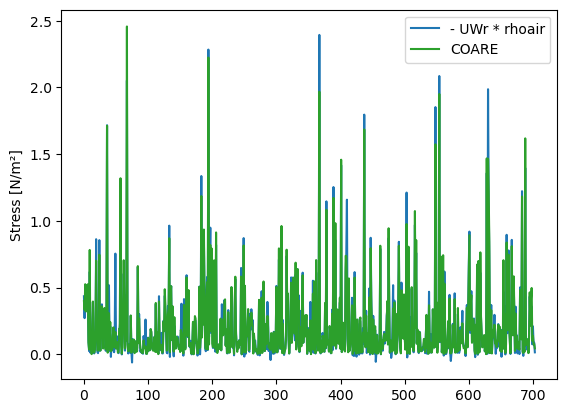

In [92]:
plt.plot(y.values, label='- UWr * rhoair')
plt.plot(c.values, label='COARE', color='C2')
plt.ylabel('Stress [N/m²]')       
plt.legend()

In [93]:
df = df[( (df['UWr'] >= -2) & (df['UWr'] <= 2) )]               

In [94]:
700*0.8

560.0

In [95]:
split_idx = 560

# S0, inc, az

# Prepare features and labels

In [96]:
predictor_variables = ['s0', 'inc', 'az']

In [97]:
x = df[predictor_variables]
x

s0        inc          az
220 -11.348112  33.555539  437.892670
169 -16.357272  40.522289  439.776215
467  -8.784147  33.548429  437.894196
151 -15.764841  40.723102  280.224854
695 -11.010427  40.718319  280.225769
..         ...        ...         ...
664 -17.007820  40.527548  440.174164
293 -16.336338  37.364239  439.766144
235 -14.515991  33.545377  437.893524
596  -6.664412  25.548476  436.039337
607  -7.547244  25.547907  436.038910

[704 rows x 3 columns]

In [98]:
y = - df['UWr'] * df['rhoair']
y

220    0.434718
169    0.270790
467    0.492172
151    0.332047
695    0.518476
         ...   
664    0.074651
293    0.209381
235    0.073328
596    0.086927
607    0.014381
Length: 704, dtype: float64

NaNs: 

2018-12-04 11:10:59.993607         NaN

2018-12-16 23:11:59.981755         NaN

# COARE

In [99]:
c = df['stress']

In [100]:
x_train = x[:split_idx]
x_test = x[split_idx:]

In [101]:
y_train = y[:split_idx]
y_test = y[split_idx:]

In [102]:
c_train = c[:split_idx]
c_test = c[split_idx:]

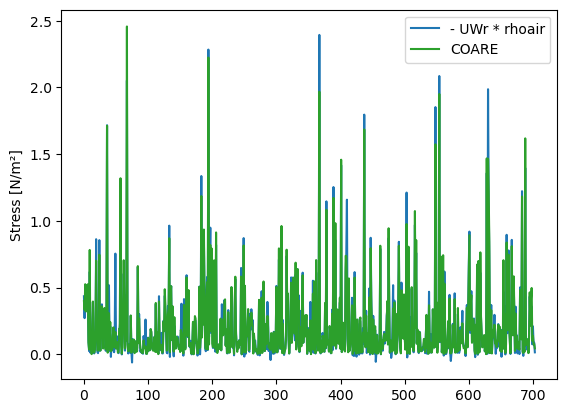

In [103]:

plt.plot(y.values, label='- UWr * rhoair')
plt.plot(c.values, label='COARE', color='C2')
plt.ylabel('Stress [N/m²]')       
plt.legend()

# ML setup

In [31]:
OUT_STEPS = 1
num_features = 1
batch_size =32
epochs=500

metric = 'mean_absolute_error'

In [32]:
try:
    del history
    del multi_dense_model
except:
    print('Variables do not exist')

Variables do not exist


# First experiment - Linear regression

In [33]:
multi_dense_model = tf.keras.Sequential([
    #tf.keras.layers.Dense(32, activation='relu'),
    #tf.keras.layers.BatchNormalization(),
    #tf.keras.layers.Dropout(rate=0.3),
    #tf.keras.layers.Dense(16, activation='relu'),
    #tf.keras.layers.BatchNormalization(),
    #tf.keras.layers.Dropout(rate=0.4),
    tf.keras.layers.Dense(1)    
])

callbacks = [
    keras.callbacks.ModelCheckpoint(
        "best_model.h5", save_best_only=True, monitor="val_loss"
    ),
    keras.callbacks.ReduceLROnPlateau(
        monitor="val_loss", factor=0.5, patience=20, min_lr=0.0001
    ),
    keras.callbacks.EarlyStopping(monitor="val_loss", patience=50, verbose=1),
]

multi_dense_model.compile(
    optimizer=tf.optimizers.Adam(),
    loss=tf.losses.MeanSquaredError(),
    metrics=[tf.metrics.MeanAbsoluteError()],
)


history = multi_dense_model.fit(
    x_train,
    y_train,
    batch_size=batch_size,
    epochs=epochs,
    callbacks=callbacks,
    validation_split=0.3,
    verbose=1,
)

2023-02-07 12:27:37.423674: I tensorflow/compiler/jit/xla_cpu_device.cc:41] Not creating XLA devices, tf_xla_enable_xla_devices not set
2023-02-07 12:27:37.424693: W tensorflow/stream_executor/platform/default/dso_loader.cc:60] Could not load dynamic library 'libcuda.so.1'; dlerror: libcuda.so.1: cannot open shared object file: No such file or directory
2023-02-07 12:27:37.424709: W tensorflow/stream_executor/cuda/cuda_driver.cc:326] failed call to cuInit: UNKNOWN ERROR (303)
2023-02-07 12:27:37.424730: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:156] kernel driver does not appear to be running on this host (c6525-5l5jvp3-bn-compute): /proc/driver/nvidia/version does not exist
2023-02-07 12:27:37.424931: I tensorflow/core/platform/cpu_feature_guard.cc:142] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE4.1 SSE4.2 AVX AVX2 FMA
To enable them in other operations, 

Epoch 1/500
13/13 [==============================] - 1s 56ms/step - loss: 196929.8627 - mean_absolute_error: 434.5337 - val_loss: 179250.6406 - val_mean_absolute_error: 413.4882
Epoch 2/500
13/13 [==============================] - 0s 2ms/step - loss: 195802.4453 - mean_absolute_error: 433.5212 - val_loss: 174721.2031 - val_mean_absolute_error: 408.1902
Epoch 3/500
13/13 [==============================] - 0s 2ms/step - loss: 183587.5357 - mean_absolute_error: 419.1566 - val_loss: 170281.9219 - val_mean_absolute_error: 402.9305
Epoch 4/500
13/13 [==============================] - 0s 2ms/step - loss: 182049.5893 - mean_absolute_error: 417.5724 - val_loss: 165896.9688 - val_mean_absolute_error: 397.6673
Epoch 5/500
13/13 [==============================] - 0s 2ms/step - loss: 177350.2165 - mean_absolute_error: 412.1100 - val_loss: 161591.6719 - val_mean_absolute_error: 392.4316
Epoch 6/500
13/13 [==============================] - 0s 2ms/step - loss: 174937.9911 - mean_absolute_error: 409.51

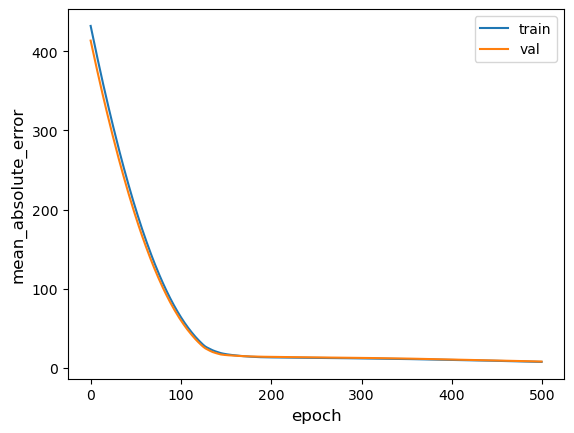

5/5 [==============================] - 0s 520us/step - loss: 82.0567 - mean_absolute_error: 7.8148
Test accuracy 7.814791202545166
Test loss 82.05667114257812


In [34]:
metric = 'mean_absolute_error'
plt.figure()
plt.plot(history.history[metric])
plt.plot(history.history["val_" + metric])
#plt.title("model " + metric + "\n Dense 32 + dense 16 + batch normalization + dropout 0.3")
plt.ylabel(metric, fontsize="large")
plt.xlabel("epoch", fontsize="large")
plt.legend(["train", "val"], loc="best")
plt.show()
plt.close()

#model = keras.models.load_model("best_model.h5")

test_loss, test_acc = multi_dense_model.evaluate(x_test, y_test)

print("Test accuracy", test_acc)
print("Test loss", test_loss)

In [35]:
y_test_pred = multi_dense_model.predict(x_test)

In [36]:
np.mean(y_test)

0.21862490743242802

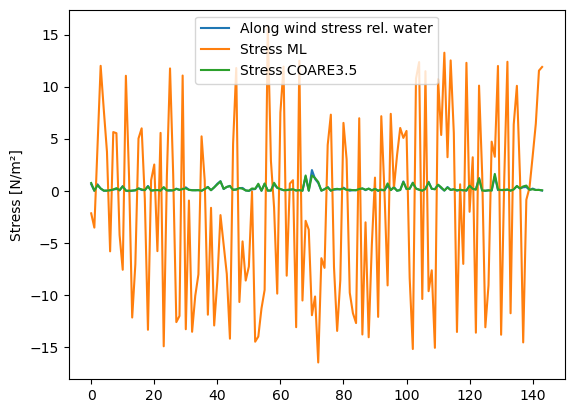

In [37]:
plt.plot(y_test.values, label='Along wind stress rel. water')
plt.plot(y_test_pred, label='Stress ML')
plt.plot(c_test.values, label='Stress COARE3.5')
plt.ylabel('Stress [N/m²]')
plt.legend()

In [38]:
rmse(y_test.values, y_test_pred)

9.01524264302965

In [39]:
rmse(y_test.values, c_test)

0.06549902869322344

# Other experiments

In [40]:
OUT_STEPS = 1
num_features = 1
batch_size =32
epochs=500

metric = 'mean_absolute_error'

In [41]:
try:
    del history
    del multi_dense_model
except:
    print('Variables do not exist')

In [42]:
multi_dense_model = tf.keras.Sequential([
    #tf.keras.layers.Dense(32, activation='relu'),
    #tf.keras.layers.BatchNormalization(),
    #tf.keras.layers.Dropout(rate=0.3),
    tf.keras.layers.Dense(4, activation='relu'),
    tf.keras.layers.BatchNormalization(),
    #tf.keras.layers.Dropout(rate=0.4),
    tf.keras.layers.Dense(1)    
])

callbacks = [
    keras.callbacks.ModelCheckpoint(
        "best_model.h5", save_best_only=True, monitor="val_loss"
    ),
    keras.callbacks.ReduceLROnPlateau(
        monitor="val_loss", factor=0.5, patience=20, min_lr=0.0001
    ),
    keras.callbacks.EarlyStopping(monitor="val_loss", patience=50, verbose=1),
]

multi_dense_model.compile(
    optimizer=tf.optimizers.Adam(),
    loss=tf.losses.MeanSquaredError(),
    metrics=[tf.metrics.MeanAbsoluteError()],
)


history = multi_dense_model.fit(
    x_train,
    y_train,
    batch_size=batch_size,
    epochs=epochs,
    callbacks=callbacks,
    validation_split=0.3,
    verbose=1,
)

Epoch 1/500
13/13 [==============================] - 0s 9ms/step - loss: 0.2397 - mean_absolute_error: 0.3676 - val_loss: 5.1574 - val_mean_absolute_error: 2.0828
Epoch 2/500
13/13 [==============================] - 0s 2ms/step - loss: 0.2122 - mean_absolute_error: 0.3423 - val_loss: 2.4061 - val_mean_absolute_error: 1.3863
Epoch 3/500
13/13 [==============================] - 0s 2ms/step - loss: 0.1430 - mean_absolute_error: 0.2995 - val_loss: 1.4260 - val_mean_absolute_error: 1.0500
Epoch 4/500
13/13 [==============================] - 0s 2ms/step - loss: 0.1662 - mean_absolute_error: 0.3064 - val_loss: 0.9598 - val_mean_absolute_error: 0.8555
Epoch 5/500
13/13 [==============================] - 0s 2ms/step - loss: 0.1462 - mean_absolute_error: 0.2929 - val_loss: 0.6906 - val_mean_absolute_error: 0.7225
Epoch 6/500
13/13 [==============================] - 0s 2ms/step - loss: 0.1478 - mean_absolute_error: 0.2740 - val_loss: 0.5295 - val_mean_absolute_error: 0.6306
Epoch 7/500
13/13 [===

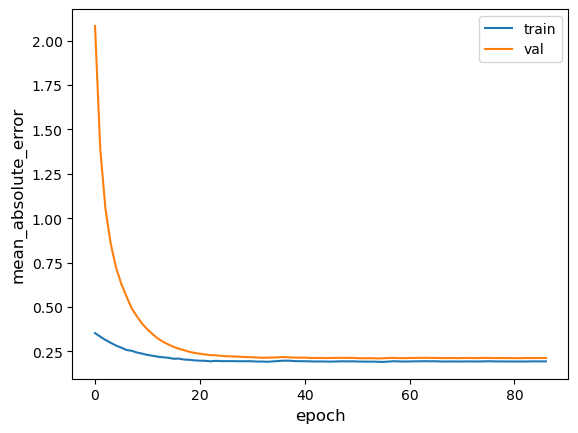

5/5 [==============================] - 0s 561us/step - loss: 0.0977 - mean_absolute_error: 0.2065
Test accuracy 0.20653022825717926
Test loss 0.09771323204040527


In [43]:
metric = 'mean_absolute_error'
plt.figure()
plt.plot(history.history[metric])
plt.plot(history.history["val_" + metric])
#plt.title("model " + metric + "\n Dense 32 + dense 16 + batch normalization + dropout 0.3")
plt.ylabel(metric, fontsize="large")
plt.xlabel("epoch", fontsize="large")
plt.legend(["train", "val"], loc="best")
plt.show()
plt.close()

#model = keras.models.load_model("best_model.h5")

test_loss, test_acc = multi_dense_model.evaluate(x_test, y_test)

print("Test accuracy", test_acc)
print("Test loss", test_loss)

In [44]:
y_test_pred = multi_dense_model.predict(x_test)

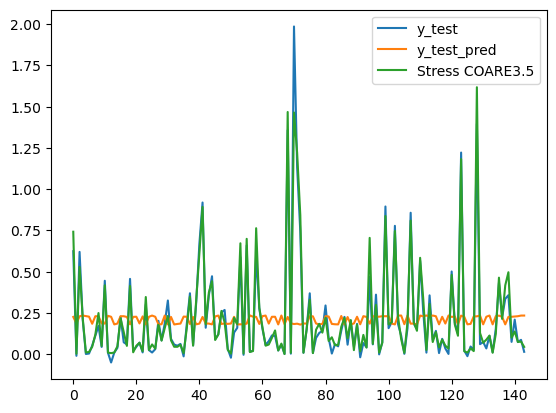

In [45]:
plt.plot(y_test.values, label='y_test')
plt.plot(y_test_pred, label='y_test_pred')
plt.plot(c_test.values, label='Stress COARE3.5')
plt.legend()

In [46]:
rmse(y_test.values, y_test_pred)

0.31130590178073253

In [47]:
OUT_STEPS = 1
num_features = 1
batch_size =32
epochs=500

metric = 'mean_absolute_error'

In [48]:
try:
    del history
    del multi_dense_model
except:
    print('Variables do not exist')

In [49]:
multi_dense_model = tf.keras.Sequential([
    #tf.keras.layers.Dense(32, activation='relu'),
    #tf.keras.layers.BatchNormalization(),
    #tf.keras.layers.Dropout(rate=0.3),
    tf.keras.layers.Dense(4, activation='relu'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dropout(rate=0.2),
    tf.keras.layers.Dense(1)    
])

callbacks = [
    keras.callbacks.ModelCheckpoint(
        "best_model.h5", save_best_only=True, monitor="val_loss"
    ),
    keras.callbacks.ReduceLROnPlateau(
        monitor="val_loss", factor=0.5, patience=20, min_lr=0.0001
    ),
    keras.callbacks.EarlyStopping(monitor="val_loss", patience=50, verbose=1),
]

multi_dense_model.compile(
    optimizer=tf.optimizers.Adam(),
    loss=tf.losses.MeanSquaredError(),
    metrics=[tf.metrics.MeanAbsoluteError()],
)


history = multi_dense_model.fit(
    x_train,
    y_train,
    batch_size=batch_size,
    epochs=epochs,
    callbacks=callbacks,
    validation_split=0.3,
    verbose=1,
)

Epoch 1/500
13/13 [==============================] - 0s 9ms/step - loss: 0.6844 - mean_absolute_error: 0.7456 - val_loss: 70.2858 - val_mean_absolute_error: 8.1988
Epoch 2/500
13/13 [==============================] - 0s 2ms/step - loss: 0.7160 - mean_absolute_error: 0.7403 - val_loss: 23.2793 - val_mean_absolute_error: 4.6800
Epoch 3/500
13/13 [==============================] - 0s 2ms/step - loss: 0.5140 - mean_absolute_error: 0.6419 - val_loss: 10.6680 - val_mean_absolute_error: 3.1272
Epoch 4/500
13/13 [==============================] - 0s 2ms/step - loss: 0.4378 - mean_absolute_error: 0.5815 - val_loss: 5.7261 - val_mean_absolute_error: 2.2742
Epoch 5/500
13/13 [==============================] - 0s 2ms/step - loss: 0.4362 - mean_absolute_error: 0.5648 - val_loss: 3.1056 - val_mean_absolute_error: 1.6390
Epoch 6/500
13/13 [==============================] - 0s 2ms/step - loss: 0.3867 - mean_absolute_error: 0.5253 - val_loss: 1.7972 - val_mean_absolute_error: 1.2182
Epoch 7/500
13/13 [

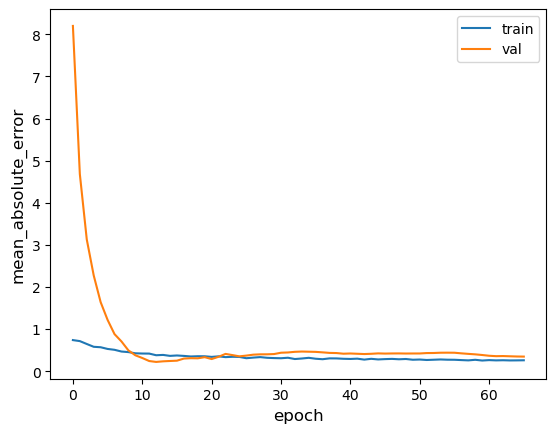

5/5 [==============================] - 0s 580us/step - loss: 0.1476 - mean_absolute_error: 0.3419
Test accuracy 0.3419467806816101
Test loss 0.1476219892501831


In [50]:
metric = 'mean_absolute_error'
plt.figure()
plt.plot(history.history[metric])
plt.plot(history.history["val_" + metric])
#plt.title("model " + metric + "\n Dense 32 + dense 16 + batch normalization + dropout 0.3")
plt.ylabel(metric, fontsize="large")
plt.xlabel("epoch", fontsize="large")
plt.legend(["train", "val"], loc="best")
plt.show()
plt.close()

#model = keras.models.load_model("best_model.h5")

test_loss, test_acc = multi_dense_model.evaluate(x_test, y_test)

print("Test accuracy", test_acc)
print("Test loss", test_loss)

In [51]:
y_test_pred = multi_dense_model.predict(x_test)

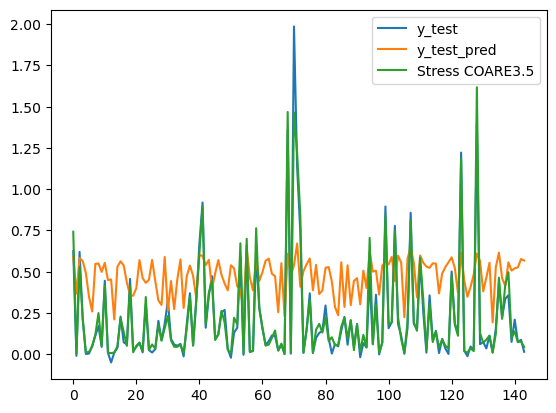

In [52]:
plt.plot(y_test.values, label='y_test')
plt.plot(y_test_pred, label='y_test_pred')
plt.plot(c_test.values, label='Stress COARE3.5')
plt.legend()

In [53]:
rmse(y_test.values, y_test_pred)

0.4160891645521145

In [54]:
OUT_STEPS = 1
num_features = 1
batch_size =32
epochs=500

metric = 'mean_absolute_error'

In [55]:
try:
    del history
    del multi_dense_model
except:
    print('Variables do not exist')

In [56]:
multi_dense_model = tf.keras.Sequential([
    #tf.keras.layers.Dense(32, activation='relu'),
    #tf.keras.layers.BatchNormalization(),
    #tf.keras.layers.Dropout(rate=0.3),
    tf.keras.layers.Dense(4, activation='relu'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dropout(rate=0.1),
    tf.keras.layers.Dense(1)    
])

callbacks = [
    keras.callbacks.ModelCheckpoint(
        "best_model.h5", save_best_only=True, monitor="val_loss"
    ),
    keras.callbacks.ReduceLROnPlateau(
        monitor="val_loss", factor=0.5, patience=20, min_lr=0.0001
    ),
    keras.callbacks.EarlyStopping(monitor="val_loss", patience=50, verbose=1),
]

multi_dense_model.compile(
    optimizer=tf.optimizers.Adam(),
    loss=tf.losses.MeanSquaredError(),
    metrics=[tf.metrics.MeanAbsoluteError()],
)


history = multi_dense_model.fit(
    x_train,
    y_train,
    batch_size=batch_size,
    epochs=epochs,
    callbacks=callbacks,
    validation_split=0.3,
    verbose=1,
)

Epoch 1/500
13/13 [==============================] - 0s 9ms/step - loss: 0.5150 - mean_absolute_error: 0.6301 - val_loss: 43.9825 - val_mean_absolute_error: 6.4201
Epoch 2/500
13/13 [==============================] - 0s 2ms/step - loss: 0.4338 - mean_absolute_error: 0.5873 - val_loss: 16.9425 - val_mean_absolute_error: 3.9417
Epoch 3/500
13/13 [==============================] - 0s 2ms/step - loss: 0.4045 - mean_absolute_error: 0.5458 - val_loss: 8.9281 - val_mean_absolute_error: 2.8223
Epoch 4/500
13/13 [==============================] - 0s 2ms/step - loss: 0.3461 - mean_absolute_error: 0.5159 - val_loss: 5.2368 - val_mean_absolute_error: 2.1221
Epoch 5/500
13/13 [==============================] - 0s 2ms/step - loss: 0.3491 - mean_absolute_error: 0.5001 - val_loss: 3.2863 - val_mean_absolute_error: 1.6414
Epoch 6/500
13/13 [==============================] - 0s 2ms/step - loss: 0.2862 - mean_absolute_error: 0.4448 - val_loss: 2.1422 - val_mean_absolute_error: 1.2839
Epoch 7/500
13/13 [=

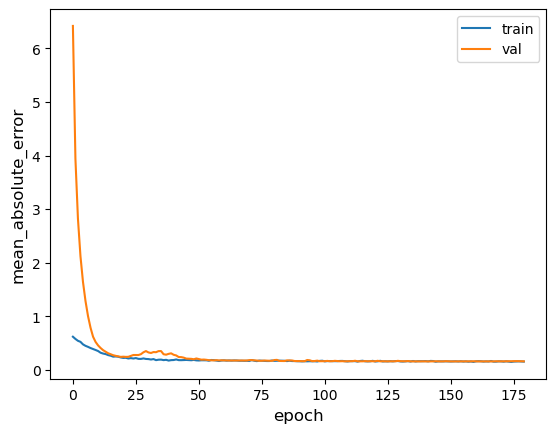

5/5 [==============================] - 0s 584us/step - loss: 0.0585 - mean_absolute_error: 0.1524
Test accuracy 0.1523732841014862
Test loss 0.05851777270436287


In [57]:
metric = 'mean_absolute_error'
plt.figure()
plt.plot(history.history[metric])
plt.plot(history.history["val_" + metric])
#plt.title("model " + metric + "\n Dense 32 + dense 16 + batch normalization + dropout 0.3")
plt.ylabel(metric, fontsize="large")
plt.xlabel("epoch", fontsize="large")
plt.legend(["train", "val"], loc="best")
plt.show()
plt.close()

#model = keras.models.load_model("best_model.h5")

test_loss, test_acc = multi_dense_model.evaluate(x_test, y_test)

print("Test accuracy", test_acc)
print("Test loss", test_loss)

In [58]:
y_test_pred = multi_dense_model.predict(x_test)

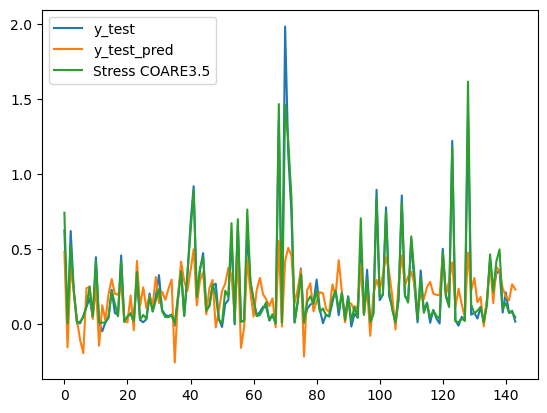

In [59]:
plt.plot(y_test.values, label='y_test')
plt.plot(y_test_pred, label='y_test_pred')
plt.plot(c_test.values, label='Stress COARE3.5')
plt.legend()

In [60]:
rmse(y_test.values, y_test_pred)

0.34798230462675056

## Correlation

In [65]:
y_test_pred.shape

(144, 1)

In [66]:
np.corrcoef(y_test.values, y_test_pred[:, 0])

array([[1.        , 0.64456886],
       [0.64456886, 1.        ]])

In [67]:
np.corrcoef(y_test.values, c_test.values)

array([[1.        , 0.97774818],
       [0.97774818, 1.        ]])

In [68]:
OUT_STEPS = 1
num_features = 1
batch_size =16
epochs=500

metric = 'mean_absolute_error'

In [69]:
try:
    del history
    del multi_dense_model
except:
    print('Variables do not exist')

In [70]:
multi_dense_model = tf.keras.Sequential([
    #tf.keras.layers.Dense(32, activation='relu'),
    #tf.keras.layers.BatchNormalization(),
    #tf.keras.layers.Dropout(rate=0.3),
    tf.keras.layers.Dense(4, activation='relu'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dropout(rate=0.1),
    tf.keras.layers.Dense(1)    
])

callbacks = [
    keras.callbacks.ModelCheckpoint(
        "best_model.h5", save_best_only=True, monitor="val_loss"
    ),
    keras.callbacks.ReduceLROnPlateau(
        monitor="val_loss", factor=0.5, patience=20, min_lr=0.0001
    ),
    keras.callbacks.EarlyStopping(monitor="val_loss", patience=50, verbose=1),
]

multi_dense_model.compile(
    optimizer=tf.optimizers.Adam(),
    loss=tf.losses.MeanSquaredError(),
    metrics=[tf.metrics.MeanAbsoluteError()],
)


history = multi_dense_model.fit(
    x_train,
    y_train,
    batch_size=batch_size,
    epochs=epochs,
    callbacks=callbacks,
    validation_split=0.3,
    verbose=1,
)

Epoch 1/500
25/25 [==============================] - 0s 5ms/step - loss: 0.1918 - mean_absolute_error: 0.3164 - val_loss: 2.7876 - val_mean_absolute_error: 1.5754
Epoch 2/500
25/25 [==============================] - 0s 1ms/step - loss: 0.1242 - mean_absolute_error: 0.2525 - val_loss: 0.6425 - val_mean_absolute_error: 0.7243
Epoch 3/500
25/25 [==============================] - 0s 2ms/step - loss: 0.1267 - mean_absolute_error: 0.2336 - val_loss: 0.2526 - val_mean_absolute_error: 0.4421
Epoch 4/500
25/25 [==============================] - 0s 1ms/step - loss: 0.1477 - mean_absolute_error: 0.2281 - val_loss: 0.1547 - val_mean_absolute_error: 0.3228
Epoch 5/500
25/25 [==============================] - 0s 1ms/step - loss: 0.0892 - mean_absolute_error: 0.1917 - val_loss: 0.1249 - val_mean_absolute_error: 0.2620
Epoch 6/500
25/25 [==============================] - 0s 1ms/step - loss: 0.0909 - mean_absolute_error: 0.1855 - val_loss: 0.1169 - val_mean_absolute_error: 0.2342
Epoch 7/500
25/25 [===

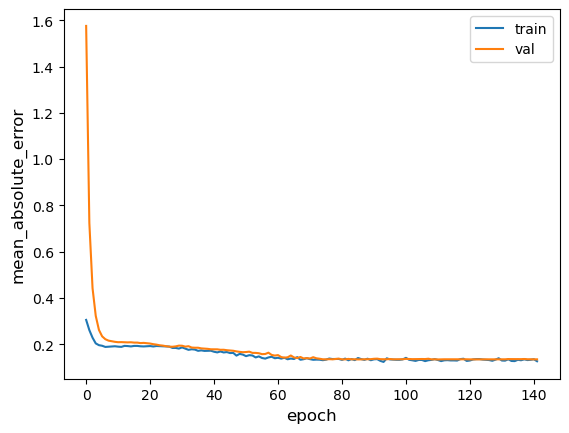

5/5 [==============================] - 0s 1ms/step - loss: 0.0448 - mean_absolute_error: 0.1317
Test accuracy 0.13167457282543182
Test loss 0.044750768691301346


In [71]:
metric = 'mean_absolute_error'
plt.figure()
plt.plot(history.history[metric])
plt.plot(history.history["val_" + metric])
#plt.title("model " + metric + "\n Dense 32 + dense 16 + batch normalization + dropout 0.3")
plt.ylabel(metric, fontsize="large")
plt.xlabel("epoch", fontsize="large")
plt.legend(["train", "val"], loc="best")
plt.show()
plt.close()

#model = keras.models.load_model("best_model.h5")

test_loss, test_acc = multi_dense_model.evaluate(x_test, y_test)

print("Test accuracy", test_acc)
print("Test loss", test_loss)

In [72]:
y_test_pred = multi_dense_model.predict(x_test)

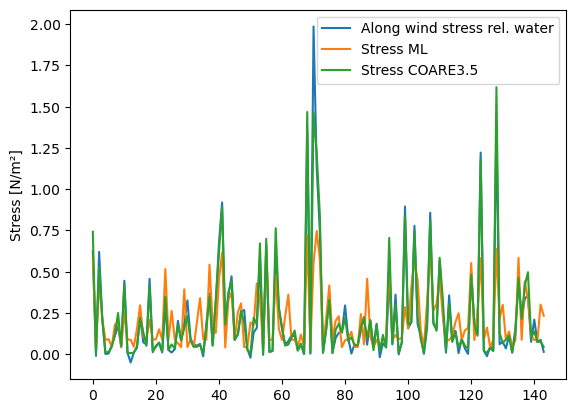

In [73]:
plt.plot(y_test.values, label='Along wind stress rel. water')
plt.plot(y_test_pred, label='Stress ML')
plt.plot(c_test.values, label='Stress COARE3.5')
plt.ylabel('Stress [N/m²]')
plt.legend()

In [74]:
rmse(y_test.values, y_test_pred)

0.358392038970993

In [75]:
rmse(y_test.values, c_test.values)

0.06549902869322344

In [76]:
np.corrcoef(y_test.values, y_test_pred[:, 0])

array([[1.       , 0.7524536],
       [0.7524536, 1.       ]])

In [77]:
np.corrcoef(y_test.values, c_test.values)

array([[1.        , 0.97774818],
       [0.97774818, 1.        ]])

In [115]:
OUT_STEPS = 1
num_features = 1
batch_size =16
epochs=500

metric = 'mean_absolute_error'

In [116]:
try:
    del history
    del multi_dense_model
except:
    print('Variables do not exist')

In [117]:
multi_dense_model = tf.keras.Sequential([
    #tf.keras.layers.Dense(32, activation='relu'),
    #tf.keras.layers.BatchNormalization(),
    #tf.keras.layers.Dropout(rate=0.3),
    tf.keras.layers.Dense(8, activation='relu'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dropout(rate=0.1),
    tf.keras.layers.Dense(1)    
])

callbacks = [
    keras.callbacks.ModelCheckpoint(
        "best_model.h5", save_best_only=True, monitor="val_loss"
    ),
    keras.callbacks.ReduceLROnPlateau(
        monitor="val_loss", factor=0.5, patience=20, min_lr=0.0001
    ),
    keras.callbacks.EarlyStopping(monitor="val_loss", patience=50, verbose=1),
]

multi_dense_model.compile(
    optimizer=tf.optimizers.Adam(),
    loss=tf.losses.MeanSquaredError(),
    metrics=[tf.metrics.MeanAbsoluteError()],
)


history = multi_dense_model.fit(
    x_train,
    y_train,
    batch_size=batch_size,
    epochs=epochs,
    callbacks=callbacks,
    validation_split=0.3,
    verbose=1,
)

Epoch 1/500
25/25 [==============================] - 0s 5ms/step - loss: 0.4676 - mean_absolute_error: 0.5565 - val_loss: 20.4541 - val_mean_absolute_error: 4.3777
Epoch 2/500
25/25 [==============================] - 0s 2ms/step - loss: 0.3818 - mean_absolute_error: 0.5005 - val_loss: 4.4369 - val_mean_absolute_error: 1.9692
Epoch 3/500
25/25 [==============================] - 0s 1ms/step - loss: 0.2887 - mean_absolute_error: 0.4189 - val_loss: 0.8718 - val_mean_absolute_error: 0.8148
Epoch 4/500
25/25 [==============================] - 0s 1ms/step - loss: 0.1957 - mean_absolute_error: 0.3331 - val_loss: 0.2224 - val_mean_absolute_error: 0.3789
Epoch 5/500
25/25 [==============================] - 0s 1ms/step - loss: 0.1447 - mean_absolute_error: 0.2699 - val_loss: 0.1793 - val_mean_absolute_error: 0.3328
Epoch 6/500
25/25 [==============================] - 0s 1ms/step - loss: 0.1404 - mean_absolute_error: 0.2863 - val_loss: 0.1813 - val_mean_absolute_error: 0.3110
Epoch 7/500
25/25 [==

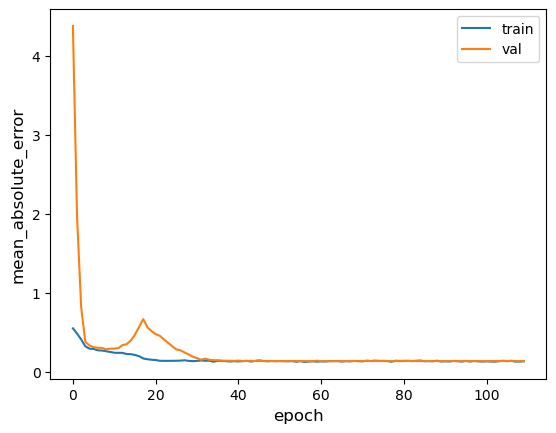

5/5 [==============================] - 0s 481us/step - loss: 0.0452 - mean_absolute_error: 0.1339
Test accuracy 0.1339360773563385
Test loss 0.045180972665548325


In [118]:
metric = 'mean_absolute_error'
plt.figure()
plt.plot(history.history[metric])
plt.plot(history.history["val_" + metric])
#plt.title("model " + metric + "\n Dense 32 + dense 16 + batch normalization + dropout 0.3")
plt.ylabel(metric, fontsize="large")
plt.xlabel("epoch", fontsize="large")
plt.legend(["train", "val"], loc="best")
plt.show()
plt.close()

#model = keras.models.load_model("best_model.h5")

test_loss, test_acc = multi_dense_model.evaluate(x_test, y_test)

print("Test accuracy", test_acc)
print("Test loss", test_loss)

In [119]:
y_test_pred = multi_dense_model.predict(x_test)

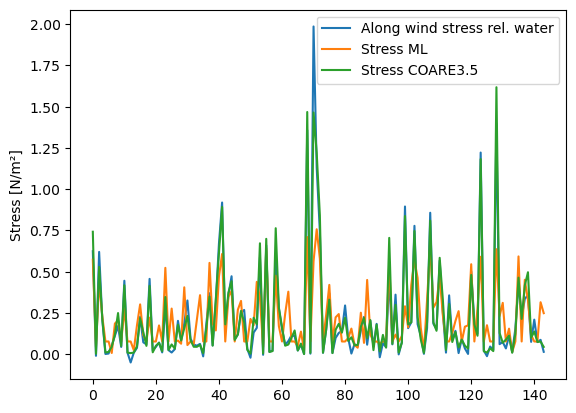

In [120]:
plt.plot(y_test.values, label='Along wind stress rel. water')
plt.plot(y_test_pred, label='Stress ML')
plt.plot(c_test.values, label='Stress COARE3.5')
plt.ylabel('Stress [N/m²]')
plt.legend()

In [121]:
rmse(y_test.values, y_test_pred)

0.35943131026066466

In [122]:
rmse(y_test.values, c_test.values)

0.06549902869322344

In [123]:
np.corrcoef(y_test.values, y_test_pred[:, 0])

array([[1.        , 0.74618865],
       [0.74618865, 1.        ]])

In [124]:
np.corrcoef(y_test.values, c_test.values)

array([[1.        , 0.97774818],
       [0.97774818, 1.        ]])

In [125]:
OUT_STEPS = 1
num_features = 1
batch_size =16
epochs=500

metric = 'mean_absolute_error'

In [126]:
try:
    del history
    del multi_dense_model
except:
    print('Variables do not exist')

In [127]:
multi_dense_model = tf.keras.Sequential([
    #tf.keras.layers.Dense(32, activation='relu'),
    #tf.keras.layers.BatchNormalization(),
    #tf.keras.layers.Dropout(rate=0.3),
    tf.keras.layers.Dense(16, activation='relu'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dropout(rate=0.1),
    tf.keras.layers.Dense(1)    
])

callbacks = [
    keras.callbacks.ModelCheckpoint(
        "best_model.h5", save_best_only=True, monitor="val_loss"
    ),
    keras.callbacks.ReduceLROnPlateau(
        monitor="val_loss", factor=0.5, patience=20, min_lr=0.0001
    ),
    keras.callbacks.EarlyStopping(monitor="val_loss", patience=50, verbose=1),
]

multi_dense_model.compile(
    optimizer=tf.optimizers.Adam(),
    loss=tf.losses.MeanSquaredError(),
    metrics=[tf.metrics.MeanAbsoluteError()],
)


history = multi_dense_model.fit(
    x_train,
    y_train,
    batch_size=batch_size,
    epochs=epochs,
    callbacks=callbacks,
    validation_split=0.3,
    verbose=1,
)

Epoch 1/500
25/25 [==============================] - 0s 5ms/step - loss: 1.0995 - mean_absolute_error: 0.9573 - val_loss: 56.5157 - val_mean_absolute_error: 7.3201
Epoch 2/500
25/25 [==============================] - 0s 2ms/step - loss: 0.7086 - mean_absolute_error: 0.7053 - val_loss: 10.9983 - val_mean_absolute_error: 3.1646
Epoch 3/500
25/25 [==============================] - 0s 2ms/step - loss: 0.4312 - mean_absolute_error: 0.5388 - val_loss: 2.4220 - val_mean_absolute_error: 1.4082
Epoch 4/500
25/25 [==============================] - 0s 4ms/step - loss: 0.3873 - mean_absolute_error: 0.4553 - val_loss: 0.5483 - val_mean_absolute_error: 0.5647
Epoch 5/500
25/25 [==============================] - 0s 1ms/step - loss: 0.2152 - mean_absolute_error: 0.3505 - val_loss: 0.1883 - val_mean_absolute_error: 0.2854
Epoch 6/500
25/25 [==============================] - 0s 1ms/step - loss: 0.1762 - mean_absolute_error: 0.3195 - val_loss: 0.1662 - val_mean_absolute_error: 0.3183
Epoch 7/500
25/25 [=

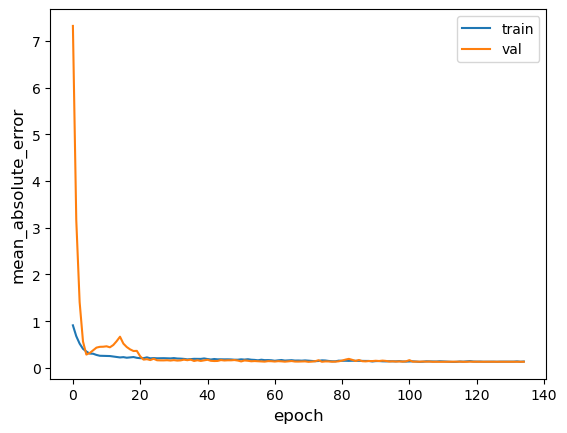

5/5 [==============================] - 0s 474us/step - loss: 0.0424 - mean_absolute_error: 0.1234
Test accuracy 0.12341240048408508
Test loss 0.042394403368234634


In [128]:
metric = 'mean_absolute_error'
plt.figure()
plt.plot(history.history[metric])
plt.plot(history.history["val_" + metric])
#plt.title("model " + metric + "\n Dense 32 + dense 16 + batch normalization + dropout 0.3")
plt.ylabel(metric, fontsize="large")
plt.xlabel("epoch", fontsize="large")
plt.legend(["train", "val"], loc="best")
plt.show()
plt.close()

#model = keras.models.load_model("best_model.h5")

test_loss, test_acc = multi_dense_model.evaluate(x_test, y_test)

print("Test accuracy", test_acc)
print("Test loss", test_loss)

In [129]:
y_test_pred = multi_dense_model.predict(x_test)

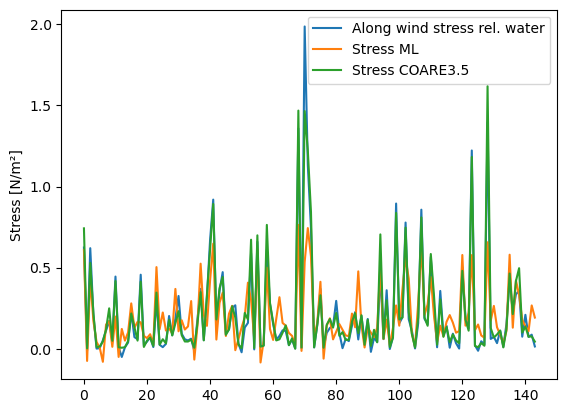

In [130]:
plt.plot(y_test.values, label='Along wind stress rel. water')
plt.plot(y_test_pred, label='Stress ML')
plt.plot(c_test.values, label='Stress COARE3.5')
plt.ylabel('Stress [N/m²]')
plt.legend()

In [131]:
rmse(y_test.values, y_test_pred)

0.3603936981873101

In [132]:
rmse(y_test.values, c_test.values)

0.06549902869322344

In [133]:
np.corrcoef(y_test.values, y_test_pred[:, 0])

array([[1.       , 0.7723692],
       [0.7723692, 1.       ]])

In [134]:
np.corrcoef(y_test.values, c_test.values)

array([[1.        , 0.97774818],
       [0.97774818, 1.        ]])

In [135]:
OUT_STEPS = 1
num_features = 1
batch_size =16
epochs=500

metric = 'mean_absolute_error'

In [136]:
try:
    del history
    del multi_dense_model
except:
    print('Variables do not exist')

In [137]:
multi_dense_model = tf.keras.Sequential([
    #tf.keras.layers.Dense(32, activation='relu'),
    #tf.keras.layers.BatchNormalization(),
    #tf.keras.layers.Dropout(rate=0.3),
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dropout(rate=0.1),
    tf.keras.layers.Dense(1)    
])

callbacks = [
    keras.callbacks.ModelCheckpoint(
        "best_model.h5", save_best_only=True, monitor="val_loss"
    ),
    keras.callbacks.ReduceLROnPlateau(
        monitor="val_loss", factor=0.5, patience=20, min_lr=0.0001
    ),
    keras.callbacks.EarlyStopping(monitor="val_loss", patience=50, verbose=1),
]

multi_dense_model.compile(
    optimizer=tf.optimizers.Adam(),
    loss=tf.losses.MeanSquaredError(),
    metrics=[tf.metrics.MeanAbsoluteError()],
)


history = multi_dense_model.fit(
    x_train,
    y_train,
    batch_size=batch_size,
    epochs=epochs,
    callbacks=callbacks,
    validation_split=0.3,
    verbose=1,
)

Epoch 1/500
25/25 [==============================] - 0s 5ms/step - loss: 0.3282 - mean_absolute_error: 0.4320 - val_loss: 0.5906 - val_mean_absolute_error: 0.5819
Epoch 2/500
25/25 [==============================] - 0s 2ms/step - loss: 0.2052 - mean_absolute_error: 0.3335 - val_loss: 0.2402 - val_mean_absolute_error: 0.4521
Epoch 3/500
25/25 [==============================] - 0s 2ms/step - loss: 0.1479 - mean_absolute_error: 0.2828 - val_loss: 0.2034 - val_mean_absolute_error: 0.4150
Epoch 4/500
25/25 [==============================] - 0s 2ms/step - loss: 0.1572 - mean_absolute_error: 0.3017 - val_loss: 0.3241 - val_mean_absolute_error: 0.5315
Epoch 5/500
25/25 [==============================] - 0s 1ms/step - loss: 0.1673 - mean_absolute_error: 0.3091 - val_loss: 0.2747 - val_mean_absolute_error: 0.4819
Epoch 6/500
25/25 [==============================] - 0s 1ms/step - loss: 0.1696 - mean_absolute_error: 0.2937 - val_loss: 0.1395 - val_mean_absolute_error: 0.3315
Epoch 7/500
25/25 [===

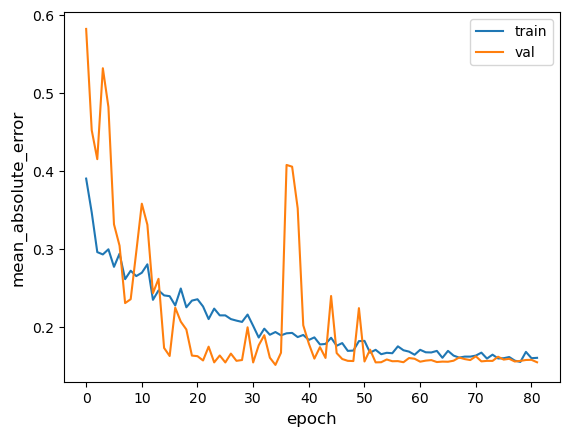

5/5 [==============================] - 0s 578us/step - loss: 0.0590 - mean_absolute_error: 0.1517
Test accuracy 0.1516655683517456
Test loss 0.05897935852408409


In [138]:
metric = 'mean_absolute_error'
plt.figure()
plt.plot(history.history[metric])
plt.plot(history.history["val_" + metric])
#plt.title("model " + metric + "\n Dense 32 + dense 16 + batch normalization + dropout 0.3")
plt.ylabel(metric, fontsize="large")
plt.xlabel("epoch", fontsize="large")
plt.legend(["train", "val"], loc="best")
plt.show()
plt.close()

#model = keras.models.load_model("best_model.h5")

test_loss, test_acc = multi_dense_model.evaluate(x_test, y_test)

print("Test accuracy", test_acc)
print("Test loss", test_loss)

In [139]:
y_test_pred = multi_dense_model.predict(x_test)

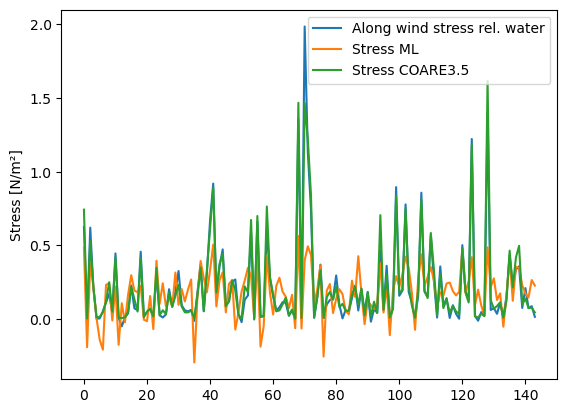

In [140]:
plt.plot(y_test.values, label='Along wind stress rel. water')
plt.plot(y_test_pred, label='Stress ML')
plt.plot(c_test.values, label='Stress COARE3.5')
plt.ylabel('Stress [N/m²]')
plt.legend()

In [141]:
rmse(y_test.values, y_test_pred)

0.3533048366869346

In [142]:
rmse(y_test.values, c_test.values)

0.06549902869322344

In [143]:
np.corrcoef(y_test.values, y_test_pred[:, 0])

array([[1.       , 0.6449126],
       [0.6449126, 1.       ]])

In [144]:
np.corrcoef(y_test.values, c_test.values)

array([[1.        , 0.97774818],
       [0.97774818, 1.        ]])

In [145]:
OUT_STEPS = 1
num_features = 1
batch_size =16
epochs=500

metric = 'mean_absolute_error'

In [146]:
try:
    del history
    del multi_dense_model
except:
    print('Variables do not exist')

In [147]:
multi_dense_model = tf.keras.Sequential([
    #tf.keras.layers.Dense(32, activation='relu'),
    #tf.keras.layers.BatchNormalization(),
    #tf.keras.layers.Dropout(rate=0.3),
    tf.keras.layers.Dense(16, activation='relu'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dropout(rate=0.1),
    tf.keras.layers.Dense(8, activation='relu'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dropout(rate=0.1),
    tf.keras.layers.Dense(1)    
])

callbacks = [
    keras.callbacks.ModelCheckpoint(
        "best_model.h5", save_best_only=True, monitor="val_loss"
    ),
    keras.callbacks.ReduceLROnPlateau(
        monitor="val_loss", factor=0.5, patience=20, min_lr=0.0001
    ),
    keras.callbacks.EarlyStopping(monitor="val_loss", patience=50, verbose=1),
]

multi_dense_model.compile(
    optimizer=tf.optimizers.Adam(),
    loss=tf.losses.MeanSquaredError(),
    metrics=[tf.metrics.MeanAbsoluteError()],
)


history = multi_dense_model.fit(
    x_train,
    y_train,
    batch_size=batch_size,
    epochs=epochs,
    callbacks=callbacks,
    validation_split=0.3,
    verbose=1,
)

Epoch 1/500
25/25 [==============================] - 1s 5ms/step - loss: 3.7553 - mean_absolute_error: 1.6667 - val_loss: 30.7018 - val_mean_absolute_error: 5.3610
Epoch 2/500
25/25 [==============================] - 0s 2ms/step - loss: 2.4137 - mean_absolute_error: 1.2498 - val_loss: 3.9991 - val_mean_absolute_error: 1.8930
Epoch 3/500
25/25 [==============================] - 0s 2ms/step - loss: 1.2670 - mean_absolute_error: 0.8846 - val_loss: 0.6042 - val_mean_absolute_error: 0.7102
Epoch 4/500
25/25 [==============================] - 0s 2ms/step - loss: 0.8173 - mean_absolute_error: 0.7068 - val_loss: 0.4036 - val_mean_absolute_error: 0.5419
Epoch 5/500
25/25 [==============================] - 0s 2ms/step - loss: 0.5371 - mean_absolute_error: 0.5672 - val_loss: 1.0913 - val_mean_absolute_error: 0.7847
Epoch 6/500
25/25 [==============================] - 0s 2ms/step - loss: 0.5566 - mean_absolute_error: 0.5848 - val_loss: 1.3857 - val_mean_absolute_error: 0.8381
Epoch 7/500
25/25 [==

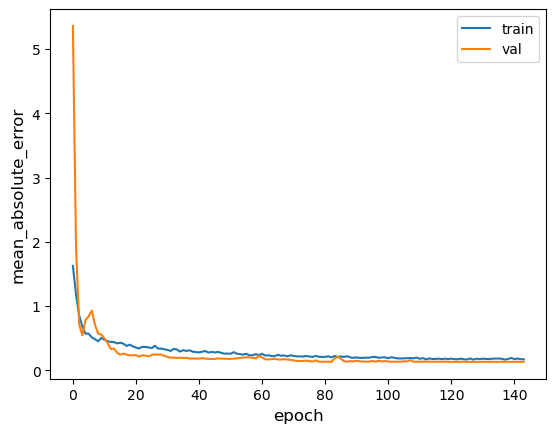

5/5 [==============================] - 0s 628us/step - loss: 0.0477 - mean_absolute_error: 0.1235
Test accuracy 0.12345651537179947
Test loss 0.04767743498086929


In [148]:
metric = 'mean_absolute_error'
plt.figure()
plt.plot(history.history[metric])
plt.plot(history.history["val_" + metric])
#plt.title("model " + metric + "\n Dense 32 + dense 16 + batch normalization + dropout 0.3")
plt.ylabel(metric, fontsize="large")
plt.xlabel("epoch", fontsize="large")
plt.legend(["train", "val"], loc="best")
plt.show()
plt.close()

#model = keras.models.load_model("best_model.h5")

test_loss, test_acc = multi_dense_model.evaluate(x_test, y_test)

print("Test accuracy", test_acc)
print("Test loss", test_loss)

In [149]:
y_test_pred = multi_dense_model.predict(x_test)

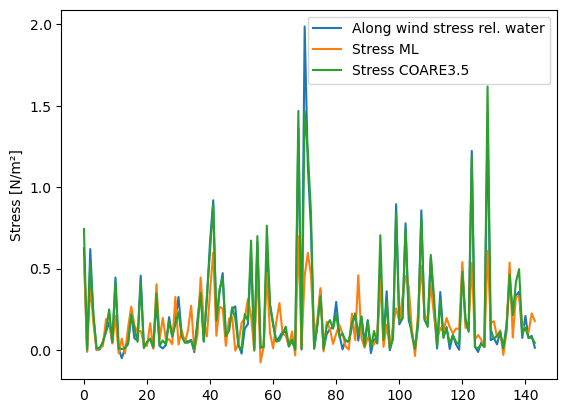

In [150]:
plt.plot(y_test.values, label='Along wind stress rel. water')
plt.plot(y_test_pred, label='Stress ML')
plt.plot(c_test.values, label='Stress COARE3.5')
plt.ylabel('Stress [N/m²]')
plt.legend()

In [151]:
rmse(y_test.values, y_test_pred)

0.35384231500902735

In [152]:
rmse(y_test.values, c_test.values)

0.06549902869322344

In [153]:
np.corrcoef(y_test.values, y_test_pred[:, 0])

array([[1.        , 0.76241448],
       [0.76241448, 1.        ]])

In [154]:
np.corrcoef(y_test.values, c_test.values)

array([[1.        , 0.97774818],
       [0.97774818, 1.        ]])

In [155]:
OUT_STEPS = 1
num_features = 1
batch_size =16
epochs=500

metric = 'mean_absolute_error'

In [156]:
try:
    del history
    del multi_dense_model
except:
    print('Variables do not exist')

In [157]:
multi_dense_model = tf.keras.Sequential([
    #tf.keras.layers.Dense(32, activation='relu'),
    #tf.keras.layers.BatchNormalization(),
    #tf.keras.layers.Dropout(rate=0.3),
    tf.keras.layers.Dense(16, activation='relu'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dropout(rate=0.1),
    tf.keras.layers.Dense(8, activation='relu'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dropout(rate=0.1),
    tf.keras.layers.Dense(4, activation='relu'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dropout(rate=0.1),
    tf.keras.layers.Dense(1)    
])

callbacks = [
    keras.callbacks.ModelCheckpoint(
        "best_model.h5", save_best_only=True, monitor="val_loss"
    ),
    keras.callbacks.ReduceLROnPlateau(
        monitor="val_loss", factor=0.5, patience=20, min_lr=0.0001
    ),
    keras.callbacks.EarlyStopping(monitor="val_loss", patience=50, verbose=1),
]

multi_dense_model.compile(
    optimizer=tf.optimizers.Adam(),
    loss=tf.losses.MeanSquaredError(),
    metrics=[tf.metrics.MeanAbsoluteError()],
)


history = multi_dense_model.fit(
    x_train,
    y_train,
    batch_size=batch_size,
    epochs=epochs,
    callbacks=callbacks,
    validation_split=0.3,
    verbose=1,
)

Epoch 1/500
25/25 [==============================] - 1s 6ms/step - loss: 3.8126 - mean_absolute_error: 1.5582 - val_loss: 17.6740 - val_mean_absolute_error: 4.1194
Epoch 2/500
25/25 [==============================] - 0s 2ms/step - loss: 1.9627 - mean_absolute_error: 1.1612 - val_loss: 10.4841 - val_mean_absolute_error: 3.1238
Epoch 3/500
25/25 [==============================] - 0s 2ms/step - loss: 1.4824 - mean_absolute_error: 0.9570 - val_loss: 6.6002 - val_mean_absolute_error: 2.4354
Epoch 4/500
25/25 [==============================] - 0s 2ms/step - loss: 1.0289 - mean_absolute_error: 0.8019 - val_loss: 3.2615 - val_mean_absolute_error: 1.6158
Epoch 5/500
25/25 [==============================] - 0s 2ms/step - loss: 0.7407 - mean_absolute_error: 0.6803 - val_loss: 1.8449 - val_mean_absolute_error: 1.0846
Epoch 6/500
25/25 [==============================] - 0s 2ms/step - loss: 0.6941 - mean_absolute_error: 0.6492 - val_loss: 1.1745 - val_mean_absolute_error: 0.8117
Epoch 7/500
25/25 [=

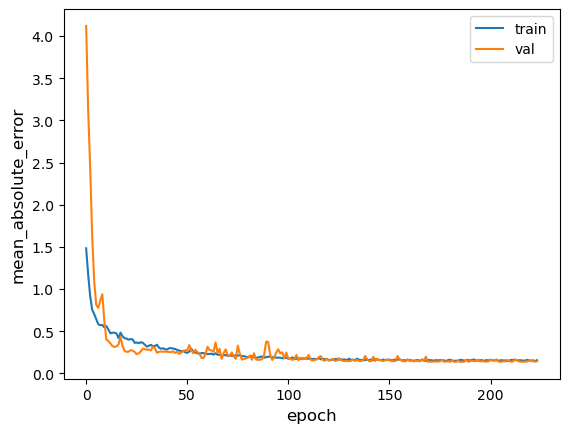

5/5 [==============================] - 0s 625us/step - loss: 0.0544 - mean_absolute_error: 0.1460
Test accuracy 0.14598014950752258
Test loss 0.054375287145376205


In [158]:
metric = 'mean_absolute_error'
plt.figure()
plt.plot(history.history[metric])
plt.plot(history.history["val_" + metric])
#plt.title("model " + metric + "\n Dense 32 + dense 16 + batch normalization + dropout 0.3")
plt.ylabel(metric, fontsize="large")
plt.xlabel("epoch", fontsize="large")
plt.legend(["train", "val"], loc="best")
plt.show()
plt.close()

#model = keras.models.load_model("best_model.h5")

test_loss, test_acc = multi_dense_model.evaluate(x_test, y_test)

print("Test accuracy", test_acc)
print("Test loss", test_loss)

In [159]:
y_test_pred = multi_dense_model.predict(x_test)

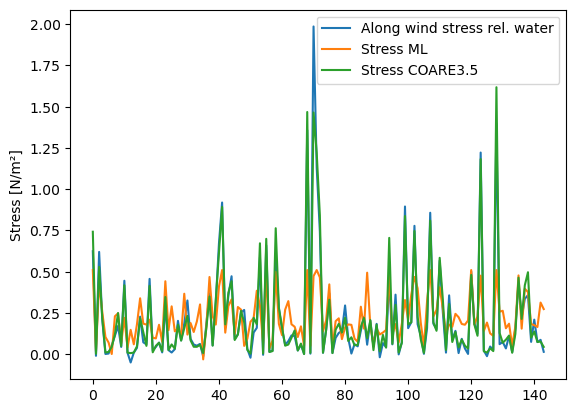

In [160]:
plt.plot(y_test.values, label='Along wind stress rel. water')
plt.plot(y_test_pred, label='Stress ML')
plt.plot(c_test.values, label='Stress COARE3.5')
plt.ylabel('Stress [N/m²]')
plt.legend()

In [161]:
rmse(y_test.values, y_test_pred)

0.3390321897655428

In [162]:
rmse(y_test.values, c_test.values)

0.06549902869322344

In [163]:
np.corrcoef(y_test.values, y_test_pred[:, 0])

array([[1.        , 0.71489269],
       [0.71489269, 1.        ]])

In [164]:
np.corrcoef(y_test.values, c_test.values)

array([[1.        , 0.97774818],
       [0.97774818, 1.        ]])

In [78]:
OUT_STEPS = 1
num_features = 1
batch_size =32
epochs=500

metric = 'mean_absolute_error'

In [79]:
try:
    del history
    del multi_dense_model
except:
    print('Variables do not exist')

In [ ]:
multi_dense_model = tf.keras.Sequential([
    #tf.keras.layers.Dense(32, activation='relu'),
    #tf.keras.layers.BatchNormalization(),
    #tf.keras.layers.Dropout(rate=0.3),
    tf.keras.layers.Dense(8, activation='relu'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dropout(rate=0.1),
    tf.keras.layers.Dense(1)    
])

callbacks = [
    keras.callbacks.ModelCheckpoint(
        "best_model.h5", save_best_only=True, monitor="val_loss"
    ),
    keras.callbacks.ReduceLROnPlateau(
        monitor="val_loss", factor=0.5, patience=20, min_lr=0.0001
    ),
    keras.callbacks.EarlyStopping(monitor="val_loss", patience=50, verbose=1),
]

multi_dense_model.compile(
    optimizer=tf.optimizers.Adam(),
    loss=tf.losses.MeanSquaredError(),
    metrics=[tf.metrics.MeanAbsoluteError()],
)


history = multi_dense_model.fit(
    x_train,
    y_train,
    batch_size=batch_size,
    epochs=epochs,
    callbacks=callbacks,
    validation_split=0.3,
    verbose=1,
)

Epoch 1/500
13/13 [==============================] - 0s 9ms/step - loss: 0.6649 - mean_absolute_error: 0.6962 - val_loss: 111.9158 - val_mean_absolute_error: 10.4204
Epoch 2/500
13/13 [==============================] - 0s 2ms/step - loss: 0.5089 - mean_absolute_error: 0.6255 - val_loss: 43.5081 - val_mean_absolute_error: 6.4649
Epoch 3/500
13/13 [==============================] - 0s 2ms/step - loss: 0.4814 - mean_absolute_error: 0.5921 - val_loss: 21.5802 - val_mean_absolute_error: 4.5210
Epoch 4/500
13/13 [==============================] - 0s 2ms/step - loss: 0.4627 - mean_absolute_error: 0.5974 - val_loss: 11.7708 - val_mean_absolute_error: 3.3056
Epoch 5/500
13/13 [==============================] - 0s 2ms/step - loss: 0.4015 - mean_absolute_error: 0.5387 - val_loss: 6.7389 - val_mean_absolute_error: 2.4649
Epoch 6/500
13/13 [==============================] - 0s 2ms/step - loss: 0.4538 - mean_absolute_error: 0.5632 - val_loss: 3.9259 - val_mean_absolute_error: 1.8401
Epoch 7/500
13/1

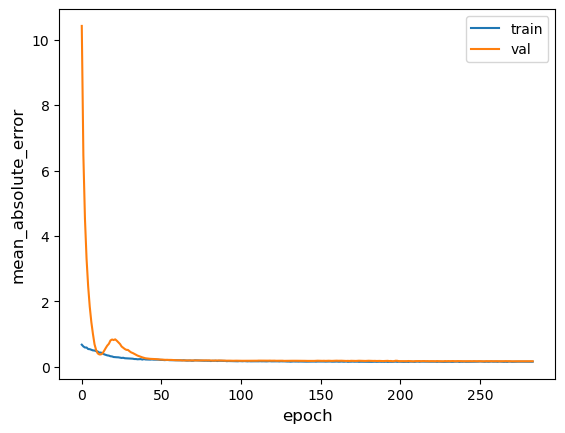

5/5 [==============================] - 0s 592us/step - loss: 0.0643 - mean_absolute_error: 0.1644
Test accuracy 0.16443872451782227
Test loss 0.06428965926170349


In [ ]:
metric = 'mean_absolute_error'
plt.figure()
plt.plot(history.history[metric])
plt.plot(history.history["val_" + metric])
#plt.title("model " + metric + "\n Dense 32 + dense 16 + batch normalization + dropout 0.3")
plt.ylabel(metric, fontsize="large")
plt.xlabel("epoch", fontsize="large")
plt.legend(["train", "val"], loc="best")
plt.show()
plt.close()

#model = keras.models.load_model("best_model.h5")

test_loss, test_acc = multi_dense_model.evaluate(x_test, y_test)

print("Test accuracy", test_acc)
print("Test loss", test_loss)

In [ ]:
y_test_pred = multi_dense_model.predict(x_test)

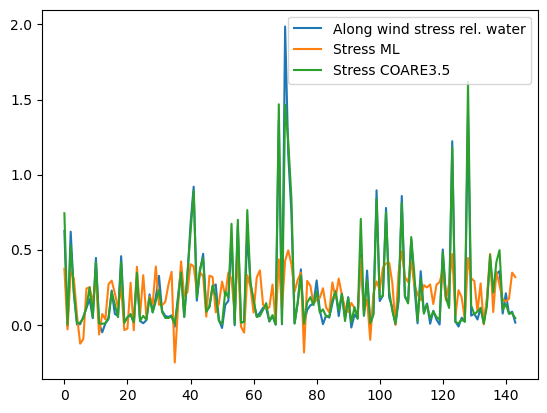

In [ ]:
plt.plot(y_test.values, label='Along wind stress rel. water')
plt.plot(y_test_pred, label='Stress ML')
plt.plot(c_test.values, label='Stress COARE3.5')
plt.legend()

## RMSE

### ML

In [ ]:
rmse(y_test.values, y_test_pred)

0.3438036060267614

### COARE

In [ ]:
rmse(y_test.values, c_test.values)

0.06549902869322344

## Correlation

### ML

In [ ]:
np.corrcoef(y_test.values, y_test_pred[:, 0])

array([[1.        , 0.58717584],
       [0.58717584, 1.        ]])

### COARE

In [ ]:
np.corrcoef(y_test.values, c_test.values)

array([[1.        , 0.97774818],
       [0.97774818, 1.        ]])

### Best model!!!

In [165]:
OUT_STEPS = 1
num_features = 1
batch_size =32
epochs=500

metric = 'mean_absolute_error'

In [166]:
try:
    del history
    del multi_dense_model
except:
    print('Variables do not exist')

In [167]:
multi_dense_model = tf.keras.Sequential([
    #tf.keras.layers.Dense(32, activation='relu'),
    #tf.keras.layers.BatchNormalization(),
    #tf.keras.layers.Dropout(rate=0.3),
    tf.keras.layers.Dense(16, activation='relu'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dropout(rate=0.1),
    tf.keras.layers.Dense(8, activation='relu'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dropout(rate=0.1),
    tf.keras.layers.Dense(1)    
])

callbacks = [
    keras.callbacks.ModelCheckpoint(
        "best_model.h5", save_best_only=True, monitor="val_loss"
    ),
    keras.callbacks.ReduceLROnPlateau(
        monitor="val_loss", factor=0.5, patience=20, min_lr=0.0001
    ),
    keras.callbacks.EarlyStopping(monitor="val_loss", patience=50, verbose=1),
]

multi_dense_model.compile(
    optimizer=tf.optimizers.Adam(),
    loss=tf.losses.MeanSquaredError(),
    metrics=[tf.metrics.MeanAbsoluteError()],
)


history = multi_dense_model.fit(
    x_train,
    y_train,
    batch_size=batch_size,
    epochs=epochs,
    callbacks=callbacks,
    validation_split=0.3,
    verbose=1,
)

Epoch 1/500
13/13 [==============================] - 1s 10ms/step - loss: 0.7989 - mean_absolute_error: 0.6970 - val_loss: 1.2351 - val_mean_absolute_error: 1.0713
Epoch 2/500
13/13 [==============================] - 0s 3ms/step - loss: 0.5120 - mean_absolute_error: 0.5138 - val_loss: 0.4854 - val_mean_absolute_error: 0.6607
Epoch 3/500
13/13 [==============================] - 0s 3ms/step - loss: 0.3018 - mean_absolute_error: 0.3884 - val_loss: 0.3274 - val_mean_absolute_error: 0.5350
Epoch 4/500
13/13 [==============================] - 0s 2ms/step - loss: 0.3375 - mean_absolute_error: 0.4246 - val_loss: 0.2753 - val_mean_absolute_error: 0.4839
Epoch 5/500
13/13 [==============================] - 0s 2ms/step - loss: 0.2809 - mean_absolute_error: 0.3788 - val_loss: 0.2844 - val_mean_absolute_error: 0.4720
Epoch 6/500
13/13 [==============================] - 0s 2ms/step - loss: 0.2598 - mean_absolute_error: 0.3803 - val_loss: 0.3148 - val_mean_absolute_error: 0.4793
Epoch 7/500
13/13 [==

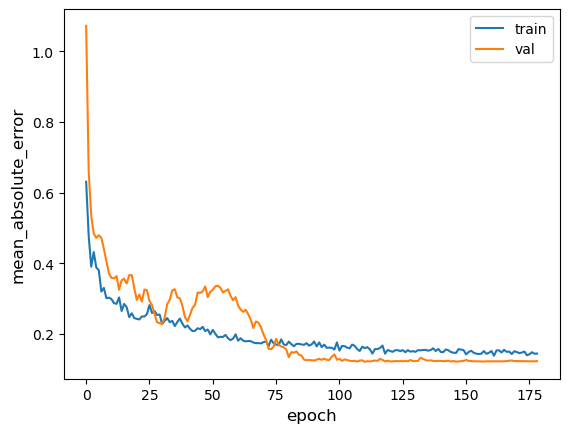

5/5 [==============================] - 0s 633us/step - loss: 0.0428 - mean_absolute_error: 0.1182
Test accuracy 0.11816398054361343
Test loss 0.04281541705131531


In [168]:
metric = 'mean_absolute_error'
plt.figure()
plt.plot(history.history[metric])
plt.plot(history.history["val_" + metric])
#plt.title("model " + metric + "\n Dense 32 + dense 16 + batch normalization + dropout 0.3")
plt.ylabel(metric, fontsize="large")
plt.xlabel("epoch", fontsize="large")
plt.legend(["train", "val"], loc="best")
plt.show()
plt.close()

#model = keras.models.load_model("best_model.h5")

test_loss, test_acc = multi_dense_model.evaluate(x_test, y_test)

print("Test accuracy", test_acc)
print("Test loss", test_loss)

In [169]:
y_test_pred = multi_dense_model.predict(x_test)

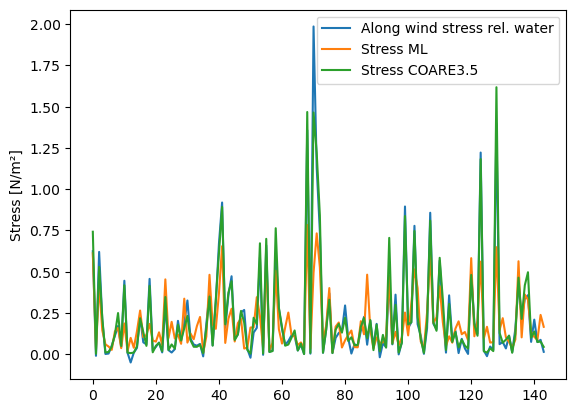

In [170]:
plt.plot(y_test.values, label='Along wind stress rel. water')
plt.plot(y_test_pred, label='Stress ML')
plt.plot(c_test.values, label='Stress COARE3.5')
plt.ylabel('Stress [N/m²]')
plt.legend()

In [171]:
rmse(y_test.values, y_test_pred)

0.3552712794534588

In [172]:
rmse(y_test.values, c_test.values)

0.06549902869322344

In [173]:
np.corrcoef(y_test.values, y_test_pred[:, 0])

array([[1.        , 0.78718426],
       [0.78718426, 1.        ]])

In [174]:
np.corrcoef(y_test.values, c_test.values)

array([[1.        , 0.97774818],
       [0.97774818, 1.        ]])

In [246]:
OUT_STEPS = 1
num_features = 1
batch_size =64
epochs=500

metric = 'mean_absolute_error'

In [247]:
try:
    del history
    del multi_dense_model
except:
    print('Variables do not exist')

In [248]:
multi_dense_model = tf.keras.Sequential([
    #tf.keras.layers.Dense(32, activation='relu'),
    #tf.keras.layers.BatchNormalization(),
    #tf.keras.layers.Dropout(rate=0.3),
    tf.keras.layers.Dense(16, activation='relu'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dropout(rate=0.1),
    tf.keras.layers.Dense(8, activation='relu'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dropout(rate=0.1),
    tf.keras.layers.Dense(1)    
])

callbacks = [
    keras.callbacks.ModelCheckpoint(
        "best_model.h5", save_best_only=True, monitor="val_loss"
    ),
    keras.callbacks.ReduceLROnPlateau(
        monitor="val_loss", factor=0.5, patience=20, min_lr=0.0001
    ),
    keras.callbacks.EarlyStopping(monitor="val_loss", patience=50, verbose=1),
]

multi_dense_model.compile(
    optimizer=tf.optimizers.Adam(),
    loss=tf.losses.MeanSquaredError(),
    metrics=[tf.metrics.MeanAbsoluteError()],
)


history = multi_dense_model.fit(
    x_train,
    y_train,
    batch_size=batch_size,
    epochs=epochs,
    callbacks=callbacks,
    validation_split=0.3,
    verbose=1,
)

Epoch 1/500
7/7 [==============================] - 1s 19ms/step - loss: 11.8245 - mean_absolute_error: 3.1627 - val_loss: 2474.8289 - val_mean_absolute_error: 48.4358
Epoch 2/500
7/7 [==============================] - 0s 4ms/step - loss: 10.8690 - mean_absolute_error: 3.0023 - val_loss: 990.4625 - val_mean_absolute_error: 30.5387
Epoch 3/500
7/7 [==============================] - 0s 4ms/step - loss: 8.7226 - mean_absolute_error: 2.5564 - val_loss: 537.3186 - val_mean_absolute_error: 22.3892
Epoch 4/500
7/7 [==============================] - 0s 4ms/step - loss: 7.5891 - mean_absolute_error: 2.3919 - val_loss: 317.5277 - val_mean_absolute_error: 17.1153
Epoch 5/500
7/7 [==============================] - 0s 4ms/step - loss: 6.6238 - mean_absolute_error: 2.1771 - val_loss: 198.4882 - val_mean_absolute_error: 13.4365
Epoch 6/500
7/7 [==============================] - 0s 4ms/step - loss: 5.6618 - mean_absolute_error: 2.0500 - val_loss: 122.4360 - val_mean_absolute_error: 10.4562
Epoch 7/500


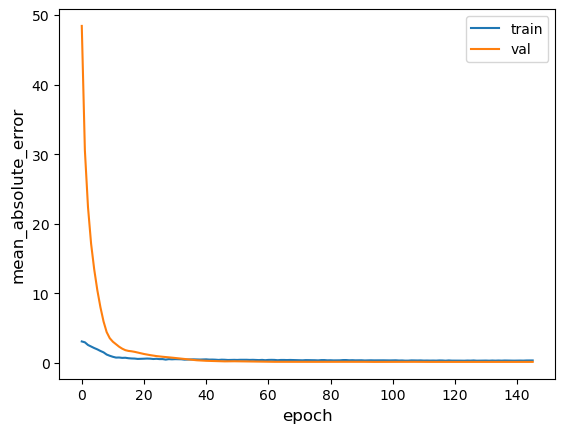

5/5 [==============================] - 0s 516us/step - loss: 0.0493 - mean_absolute_error: 0.1375
Test accuracy 0.13751013576984406
Test loss 0.0493013933300972


In [249]:
metric = 'mean_absolute_error'
plt.figure()
plt.plot(history.history[metric])
plt.plot(history.history["val_" + metric])
#plt.title("model " + metric + "\n Dense 32 + dense 16 + batch normalization + dropout 0.3")
plt.ylabel(metric, fontsize="large")
plt.xlabel("epoch", fontsize="large")
plt.legend(["train", "val"], loc="best")
plt.show()
plt.close()

#model = keras.models.load_model("best_model.h5")

test_loss, test_acc = multi_dense_model.evaluate(x_test, y_test)

print("Test accuracy", test_acc)
print("Test loss", test_loss)

In [250]:
y_test_pred = multi_dense_model.predict(x_test)

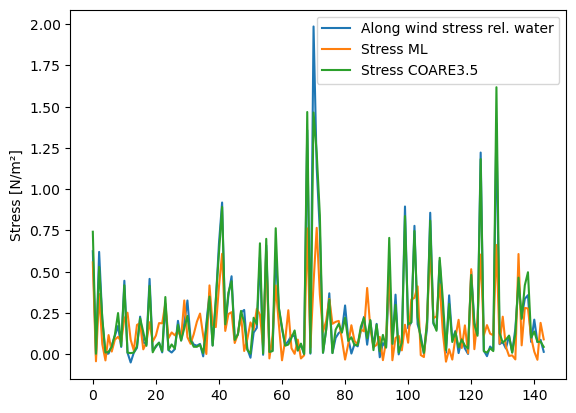

In [251]:
plt.plot(y_test.values, label='Along wind stress rel. water')
plt.plot(y_test_pred, label='Stress ML')
plt.plot(c_test.values, label='Stress COARE3.5')
plt.ylabel('Stress [N/m²]')
plt.legend()

In [252]:
rmse(y_test.values, y_test_pred)

0.3590111828782987

In [253]:
rmse(y_test.values, c_test.values)

0.06549902869322344

In [254]:
np.corrcoef(y_test.values, y_test_pred[:, 0])

array([[1.        , 0.73566191],
       [0.73566191, 1.        ]])

In [255]:
np.corrcoef(y_test.values, c_test.values)

array([[1.        , 0.97774818],
       [0.97774818, 1.        ]])

In [266]:
OUT_STEPS = 1
num_features = 1
batch_size =64
epochs=500

metric = 'mean_absolute_error'

In [267]:
try:
    del history
    del multi_dense_model
except:
    print('Variables do not exist')

In [268]:
multi_dense_model = tf.keras.Sequential([
    #tf.keras.layers.Dense(32, activation='relu'),
    #tf.keras.layers.BatchNormalization(),
    #tf.keras.layers.Dropout(rate=0.3),
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dropout(rate=0.2),
    tf.keras.layers.Dense(8, activation='relu'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dropout(rate=0.1),
    tf.keras.layers.Dense(1)    
])

callbacks = [
    keras.callbacks.ModelCheckpoint(
        "best_model.h5", save_best_only=True, monitor="val_loss"
    ),
    keras.callbacks.ReduceLROnPlateau(
        monitor="val_loss", factor=0.5, patience=20, min_lr=0.0001
    ),
    keras.callbacks.EarlyStopping(monitor="val_loss", patience=50, verbose=1),
]

multi_dense_model.compile(
    optimizer=tf.optimizers.Adam(),
    loss=tf.losses.MeanSquaredError(),
    metrics=[tf.metrics.MeanAbsoluteError()],
)


history = multi_dense_model.fit(
    x_train,
    y_train,
    batch_size=batch_size,
    epochs=epochs,
    callbacks=callbacks,
    validation_split=0.3,
    verbose=1,
)

Epoch 1/500
7/7 [==============================] - 1s 22ms/step - loss: 2.1315 - mean_absolute_error: 1.1965 - val_loss: 196.9373 - val_mean_absolute_error: 13.7119
Epoch 2/500
7/7 [==============================] - 0s 5ms/step - loss: 1.2938 - mean_absolute_error: 0.8917 - val_loss: 118.0691 - val_mean_absolute_error: 10.6055
Epoch 3/500
7/7 [==============================] - 0s 5ms/step - loss: 1.0300 - mean_absolute_error: 0.7691 - val_loss: 98.6174 - val_mean_absolute_error: 9.6352
Epoch 4/500
7/7 [==============================] - 0s 4ms/step - loss: 0.7496 - mean_absolute_error: 0.6829 - val_loss: 83.1505 - val_mean_absolute_error: 8.7878
Epoch 5/500
7/7 [==============================] - 0s 4ms/step - loss: 0.6732 - mean_absolute_error: 0.6353 - val_loss: 66.4039 - val_mean_absolute_error: 7.7913
Epoch 6/500
7/7 [==============================] - 0s 4ms/step - loss: 0.5835 - mean_absolute_error: 0.6014 - val_loss: 50.7212 - val_mean_absolute_error: 6.7448
Epoch 7/500
7/7 [======

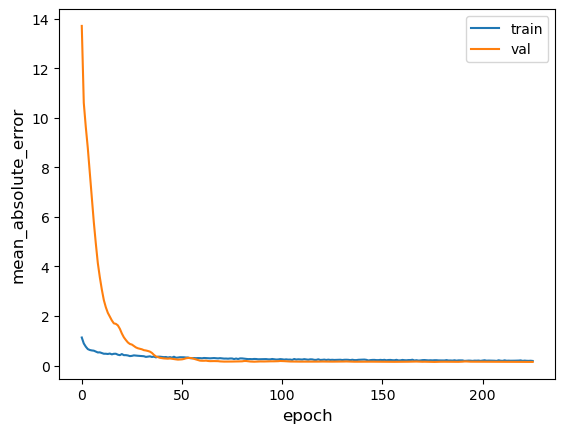

5/5 [==============================] - 0s 609us/step - loss: 0.0494 - mean_absolute_error: 0.1429
Test accuracy 0.1429051160812378
Test loss 0.04935682564973831


In [269]:
metric = 'mean_absolute_error'
plt.figure()
plt.plot(history.history[metric])
plt.plot(history.history["val_" + metric])
#plt.title("model " + metric + "\n Dense 32 + dense 16 + batch normalization + dropout 0.3")
plt.ylabel(metric, fontsize="large")
plt.xlabel("epoch", fontsize="large")
plt.legend(["train", "val"], loc="best")
plt.show()
plt.close()

#model = keras.models.load_model("best_model.h5")

test_loss, test_acc = multi_dense_model.evaluate(x_test, y_test)

print("Test accuracy", test_acc)
print("Test loss", test_loss)

In [270]:
y_test_pred = multi_dense_model.predict(x_test)

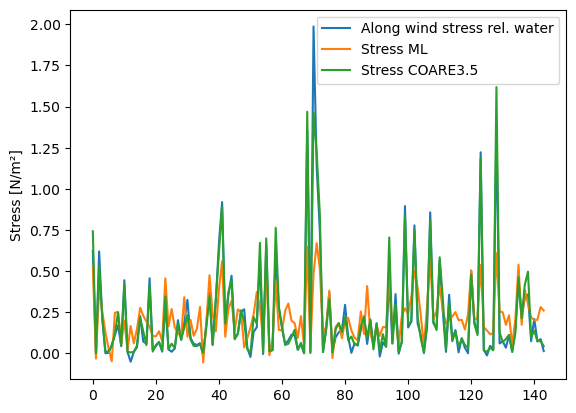

In [271]:
plt.plot(y_test.values, label='Along wind stress rel. water')
plt.plot(y_test_pred, label='Stress ML')
plt.plot(c_test.values, label='Stress COARE3.5')
plt.ylabel('Stress [N/m²]')
plt.legend()

In [272]:
rmse(y_test.values, y_test_pred)

0.3440248085263529

In [273]:
rmse(y_test.values, c_test.values)

0.06549902869322344

In [274]:
np.corrcoef(y_test.values, y_test_pred[:, 0])

array([[1.        , 0.74874296],
       [0.74874296, 1.        ]])

In [275]:
np.corrcoef(y_test.values, c_test.values)

array([[1.        , 0.97774818],
       [0.97774818, 1.        ]])

In [276]:
OUT_STEPS = 1
num_features = 1
batch_size =128
epochs=500

metric = 'mean_absolute_error'

In [277]:
try:
    del history
    del multi_dense_model
except:
    print('Variables do not exist')

In [278]:
multi_dense_model = tf.keras.Sequential([
    #tf.keras.layers.Dense(32, activation='relu'),
    #tf.keras.layers.BatchNormalization(),
    #tf.keras.layers.Dropout(rate=0.3),
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dropout(rate=0.2),
    tf.keras.layers.Dense(8, activation='relu'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dropout(rate=0.1),
    tf.keras.layers.Dense(1)    
])

callbacks = [
    keras.callbacks.ModelCheckpoint(
        "best_model.h5", save_best_only=True, monitor="val_loss"
    ),
    keras.callbacks.ReduceLROnPlateau(
        monitor="val_loss", factor=0.5, patience=20, min_lr=0.0001
    ),
    keras.callbacks.EarlyStopping(monitor="val_loss", patience=50, verbose=1),
]

multi_dense_model.compile(
    optimizer=tf.optimizers.Adam(),
    loss=tf.losses.MeanSquaredError(),
    metrics=[tf.metrics.MeanAbsoluteError()],
)


history = multi_dense_model.fit(
    x_train,
    y_train,
    batch_size=batch_size,
    epochs=epochs,
    callbacks=callbacks,
    validation_split=0.3,
    verbose=1,
)

Epoch 1/500
4/4 [==============================] - 1s 37ms/step - loss: 0.6329 - mean_absolute_error: 0.6678 - val_loss: 46.3544 - val_mean_absolute_error: 6.5498
Epoch 2/500
4/4 [==============================] - 0s 7ms/step - loss: 0.5947 - mean_absolute_error: 0.6383 - val_loss: 20.0298 - val_mean_absolute_error: 4.2657
Epoch 3/500
4/4 [==============================] - 0s 7ms/step - loss: 0.5558 - mean_absolute_error: 0.6180 - val_loss: 10.7021 - val_mean_absolute_error: 3.0938
Epoch 4/500
4/4 [==============================] - 0s 7ms/step - loss: 0.5189 - mean_absolute_error: 0.5998 - val_loss: 5.8057 - val_mean_absolute_error: 2.2520
Epoch 5/500
4/4 [==============================] - 0s 7ms/step - loss: 0.4940 - mean_absolute_error: 0.5651 - val_loss: 3.0424 - val_mean_absolute_error: 1.5966
Epoch 6/500
4/4 [==============================] - 0s 8ms/step - loss: 0.4362 - mean_absolute_error: 0.5287 - val_loss: 1.7168 - val_mean_absolute_error: 1.1659
Epoch 7/500
4/4 [=============

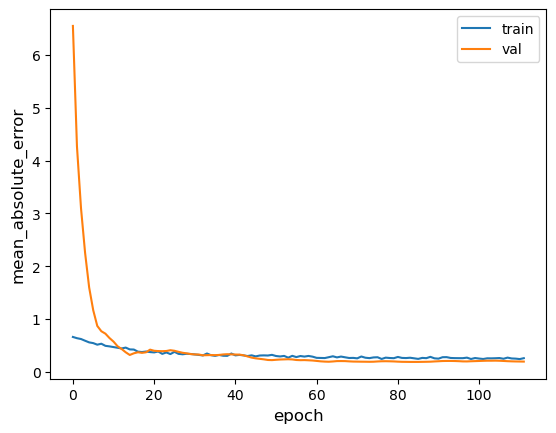

5/5 [==============================] - 0s 569us/step - loss: 0.0933 - mean_absolute_error: 0.1769
Test accuracy 0.1769472360610962
Test loss 0.09325730800628662


In [279]:
metric = 'mean_absolute_error'
plt.figure()
plt.plot(history.history[metric])
plt.plot(history.history["val_" + metric])
#plt.title("model " + metric + "\n Dense 32 + dense 16 + batch normalization + dropout 0.3")
plt.ylabel(metric, fontsize="large")
plt.xlabel("epoch", fontsize="large")
plt.legend(["train", "val"], loc="best")
plt.show()
plt.close()

#model = keras.models.load_model("best_model.h5")

test_loss, test_acc = multi_dense_model.evaluate(x_test, y_test)

print("Test accuracy", test_acc)
print("Test loss", test_loss)

In [280]:
y_test_pred = multi_dense_model.predict(x_test)

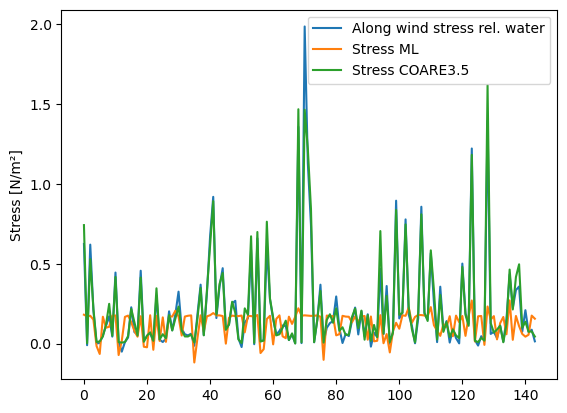

In [281]:
plt.plot(y_test.values, label='Along wind stress rel. water')
plt.plot(y_test_pred, label='Stress ML')
plt.plot(c_test.values, label='Stress COARE3.5')
plt.ylabel('Stress [N/m²]')
plt.legend()

In [282]:
rmse(y_test.values, y_test_pred)

0.3344702354225546

In [283]:
rmse(y_test.values, c_test.values)

0.06549902869322344

In [284]:
np.corrcoef(y_test.values, y_test_pred[:, 0])

array([[1.        , 0.37942614],
       [0.37942614, 1.        ]])

In [285]:
np.corrcoef(y_test.values, c_test.values)

array([[1.        , 0.97774818],
       [0.97774818, 1.        ]])

In [346]:
OUT_STEPS = 1
num_features = 1
batch_size =128
epochs=500

metric = 'mean_absolute_error'

In [347]:
try:
    del history
    del multi_dense_model
except:
    print('Variables do not exist')

In [348]:
multi_dense_model = tf.keras.Sequential([
    #tf.keras.layers.Dense(32, activation='relu'),
    #tf.keras.layers.BatchNormalization(),
    #tf.keras.layers.Dropout(rate=0.3),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dropout(rate=0.2),
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dropout(rate=0.2),
    tf.keras.layers.Dense(16, activation='relu'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dropout(rate=0.2),
    tf.keras.layers.Dense(1)    
])

callbacks = [
    keras.callbacks.ModelCheckpoint(
        "best_model.h5", save_best_only=True, monitor="val_loss"
    ),
    keras.callbacks.ReduceLROnPlateau(
        monitor="val_loss", factor=0.5, patience=20, min_lr=0.0001
    ),
    keras.callbacks.EarlyStopping(monitor="val_loss", patience=50, verbose=1),
]

multi_dense_model.compile(
    optimizer=tf.optimizers.Adam(),
    loss=tf.losses.MeanSquaredError(),
    metrics=[tf.metrics.MeanAbsoluteError()],
)


history = multi_dense_model.fit(
    x_train,
    y_train,
    batch_size=batch_size,
    epochs=epochs,
    callbacks=callbacks,
    validation_split=0.3,
    verbose=1,
)

Epoch 1/500
4/4 [==============================] - 1s 43ms/step - loss: 1.6066 - mean_absolute_error: 0.9636 - val_loss: 22.3089 - val_mean_absolute_error: 4.6748
Epoch 2/500
4/4 [==============================] - 0s 9ms/step - loss: 1.2513 - mean_absolute_error: 0.8693 - val_loss: 20.1084 - val_mean_absolute_error: 4.4046
Epoch 3/500
4/4 [==============================] - 0s 9ms/step - loss: 0.9952 - mean_absolute_error: 0.7833 - val_loss: 17.6060 - val_mean_absolute_error: 4.0935
Epoch 4/500
4/4 [==============================] - 0s 10ms/step - loss: 0.9199 - mean_absolute_error: 0.7465 - val_loss: 14.4067 - val_mean_absolute_error: 3.6765
Epoch 5/500
4/4 [==============================] - 0s 9ms/step - loss: 0.8199 - mean_absolute_error: 0.7077 - val_loss: 11.1170 - val_mean_absolute_error: 3.2039
Epoch 6/500
4/4 [==============================] - 0s 9ms/step - loss: 0.8815 - mean_absolute_error: 0.7378 - val_loss: 7.5929 - val_mean_absolute_error: 2.6159
Epoch 7/500
4/4 [==========

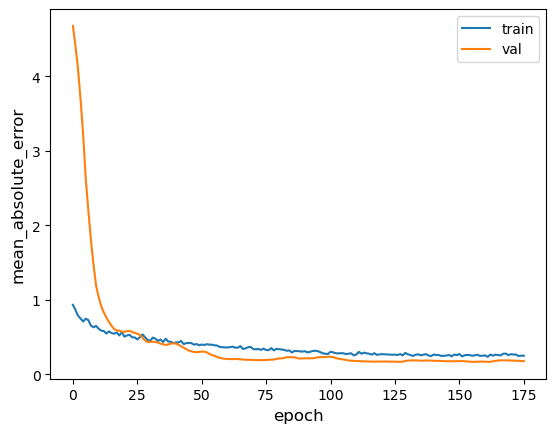

5/5 [==============================] - 0s 812us/step - loss: 0.0941 - mean_absolute_error: 0.1638
Test accuracy 0.1638360321521759
Test loss 0.09413888305425644


In [349]:
metric = 'mean_absolute_error'
plt.figure()
plt.plot(history.history[metric])
plt.plot(history.history["val_" + metric])
#plt.title("model " + metric + "\n Dense 32 + dense 16 + batch normalization + dropout 0.3")
plt.ylabel(metric, fontsize="large")
plt.xlabel("epoch", fontsize="large")
plt.legend(["train", "val"], loc="best")
plt.show()
plt.close()

#model = keras.models.load_model("best_model.h5")

test_loss, test_acc = multi_dense_model.evaluate(x_test, y_test)

print("Test accuracy", test_acc)
print("Test loss", test_loss)

In [350]:
y_test_pred = multi_dense_model.predict(x_test)

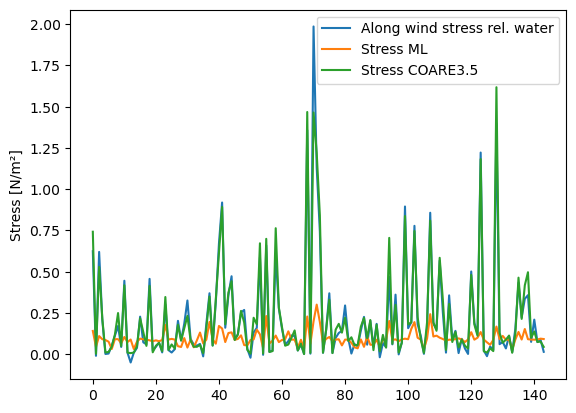

In [351]:
plt.plot(y_test.values, label='Along wind stress rel. water')
plt.plot(y_test_pred, label='Stress ML')
plt.plot(c_test.values, label='Stress COARE3.5')
plt.ylabel('Stress [N/m²]')
plt.legend()

In [352]:
rmse(y_test.values, y_test_pred)

0.33652324532722816

In [353]:
rmse(y_test.values, c_test.values)

0.06549902869322344

In [354]:
np.corrcoef(y_test.values, y_test_pred[:, 0])

array([[1.        , 0.70749656],
       [0.70749656, 1.        ]])

In [355]:
np.corrcoef(y_test.values, c_test.values)

array([[1.        , 0.97774818],
       [0.97774818, 1.        ]])

In [356]:
OUT_STEPS = 1
num_features = 1
batch_size =256
epochs=500

metric = 'mean_absolute_error'

In [357]:
try:
    del history
    del multi_dense_model
except:
    print('Variables do not exist')

In [358]:
multi_dense_model = tf.keras.Sequential([
    #tf.keras.layers.Dense(32, activation='relu'),
    #tf.keras.layers.BatchNormalization(),
    #tf.keras.layers.Dropout(rate=0.3),
    tf.keras.layers.Dense(16, activation='relu'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dropout(rate=0.1),
    tf.keras.layers.Dense(8, activation='relu'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dropout(rate=0.1),
    tf.keras.layers.Dense(1)    
])

callbacks = [
    keras.callbacks.ModelCheckpoint(
        "best_model.h5", save_best_only=True, monitor="val_loss"
    ),
    keras.callbacks.ReduceLROnPlateau(
        monitor="val_loss", factor=0.5, patience=20, min_lr=0.0001
    ),
    keras.callbacks.EarlyStopping(monitor="val_loss", patience=50, verbose=1),
]

multi_dense_model.compile(
    optimizer=tf.optimizers.Adam(),
    loss=tf.losses.MeanSquaredError(),
    metrics=[tf.metrics.MeanAbsoluteError()],
)


history = multi_dense_model.fit(
    x_train,
    y_train,
    batch_size=batch_size,
    epochs=epochs,
    callbacks=callbacks,
    validation_split=0.3,
    verbose=1,
)

Epoch 1/500
2/2 [==============================] - 1s 114ms/step - loss: 2.6429 - mean_absolute_error: 1.3699 - val_loss: 480.5391 - val_mean_absolute_error: 21.1668
Epoch 2/500
2/2 [==============================] - 0s 22ms/step - loss: 2.2569 - mean_absolute_error: 1.2587 - val_loss: 230.9920 - val_mean_absolute_error: 14.6982
Epoch 3/500
2/2 [==============================] - 0s 21ms/step - loss: 2.0873 - mean_absolute_error: 1.1762 - val_loss: 141.2244 - val_mean_absolute_error: 11.4928
Epoch 4/500
2/2 [==============================] - 0s 21ms/step - loss: 1.7830 - mean_absolute_error: 1.0944 - val_loss: 95.2023 - val_mean_absolute_error: 9.4300
Epoch 5/500
2/2 [==============================] - 0s 21ms/step - loss: 1.5522 - mean_absolute_error: 1.0345 - val_loss: 68.1395 - val_mean_absolute_error: 7.9685
Epoch 6/500
2/2 [==============================] - 0s 21ms/step - loss: 1.5389 - mean_absolute_error: 0.9909 - val_loss: 50.3065 - val_mean_absolute_error: 6.8360
Epoch 7/500
2/2

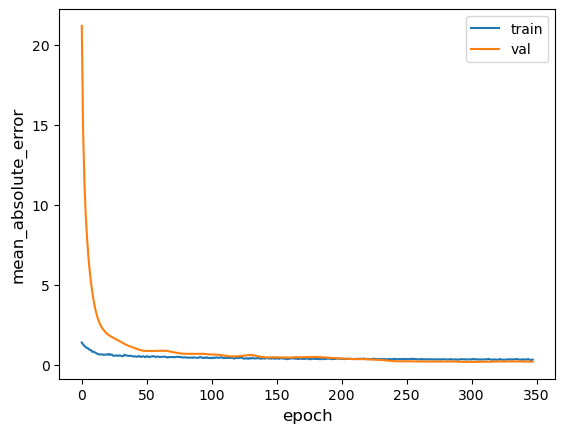

5/5 [==============================] - 0s 781us/step - loss: 0.0825 - mean_absolute_error: 0.1650
Test accuracy 0.16496232151985168
Test loss 0.082501620054245


In [359]:
metric = 'mean_absolute_error'
plt.figure()
plt.plot(history.history[metric])
plt.plot(history.history["val_" + metric])
#plt.title("model " + metric + "\n Dense 32 + dense 16 + batch normalization + dropout 0.3")
plt.ylabel(metric, fontsize="large")
plt.xlabel("epoch", fontsize="large")
plt.legend(["train", "val"], loc="best")
plt.show()
plt.close()

#model = keras.models.load_model("best_model.h5")

test_loss, test_acc = multi_dense_model.evaluate(x_test, y_test)

print("Test accuracy", test_acc)
print("Test loss", test_loss)

In [360]:
y_test_pred = multi_dense_model.predict(x_test)

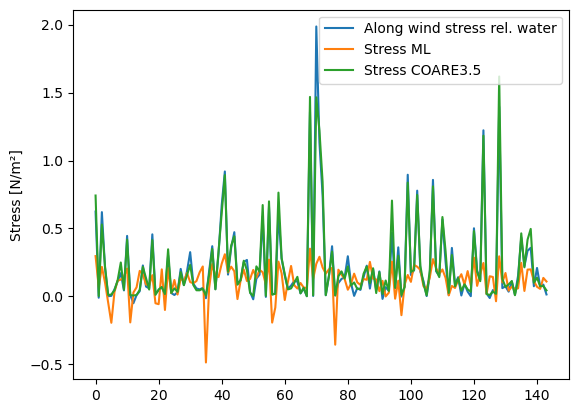

In [361]:
plt.plot(y_test.values, label='Along wind stress rel. water')
plt.plot(y_test_pred, label='Stress ML')
plt.plot(c_test.values, label='Stress COARE3.5')
plt.ylabel('Stress [N/m²]')
plt.legend()

In [362]:
rmse(y_test.values, y_test_pred)

0.3478010340431424

In [363]:
rmse(y_test.values, c_test.values)

0.06549902869322344

In [364]:
np.corrcoef(y_test.values, y_test_pred[:, 0])

array([[1.        , 0.52891426],
       [0.52891426, 1.        ]])

In [365]:
np.corrcoef(y_test.values, c_test.values)

array([[1.        , 0.97774818],
       [0.97774818, 1.        ]])

In [366]:
OUT_STEPS = 1
num_features = 1
batch_size =256
epochs=500

metric = 'mean_absolute_error'

In [367]:
try:
    del history
    del multi_dense_model
except:
    print('Variables do not exist')

In [368]:
multi_dense_model = tf.keras.Sequential([
    #tf.keras.layers.Dense(32, activation='relu'),
    #tf.keras.layers.BatchNormalization(),
    #tf.keras.layers.Dropout(rate=0.3),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dropout(rate=0.1),
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dropout(rate=0.1),
    tf.keras.layers.Dense(1)    
])

callbacks = [
    keras.callbacks.ModelCheckpoint(
        "best_model.h5", save_best_only=True, monitor="val_loss"
    ),
    keras.callbacks.ReduceLROnPlateau(
        monitor="val_loss", factor=0.5, patience=20, min_lr=0.0001
    ),
    keras.callbacks.EarlyStopping(monitor="val_loss", patience=50, verbose=1),
]

multi_dense_model.compile(
    optimizer=tf.optimizers.Adam(),
    loss=tf.losses.MeanSquaredError(),
    metrics=[tf.metrics.MeanAbsoluteError()],
)


history = multi_dense_model.fit(
    x_train,
    y_train,
    batch_size=batch_size,
    epochs=epochs,
    callbacks=callbacks,
    validation_split=0.3,
    verbose=1,
)

Epoch 1/500
2/2 [==============================] - 1s 114ms/step - loss: 2.0771 - mean_absolute_error: 1.1559 - val_loss: 5.8707 - val_mean_absolute_error: 2.0393
Epoch 2/500
2/2 [==============================] - 0s 23ms/step - loss: 1.3892 - mean_absolute_error: 0.9580 - val_loss: 1.5255 - val_mean_absolute_error: 1.1250
Epoch 3/500
2/2 [==============================] - 0s 22ms/step - loss: 0.9131 - mean_absolute_error: 0.7642 - val_loss: 6.1464 - val_mean_absolute_error: 2.4459
Epoch 4/500
2/2 [==============================] - 0s 20ms/step - loss: 0.6772 - mean_absolute_error: 0.6447 - val_loss: 9.0325 - val_mean_absolute_error: 2.9580
Epoch 5/500
2/2 [==============================] - 0s 20ms/step - loss: 0.6719 - mean_absolute_error: 0.6568 - val_loss: 9.2369 - val_mean_absolute_error: 2.9692
Epoch 6/500
2/2 [==============================] - 0s 20ms/step - loss: 0.5651 - mean_absolute_error: 0.6004 - val_loss: 7.6356 - val_mean_absolute_error: 2.6736
Epoch 7/500
2/2 [==========

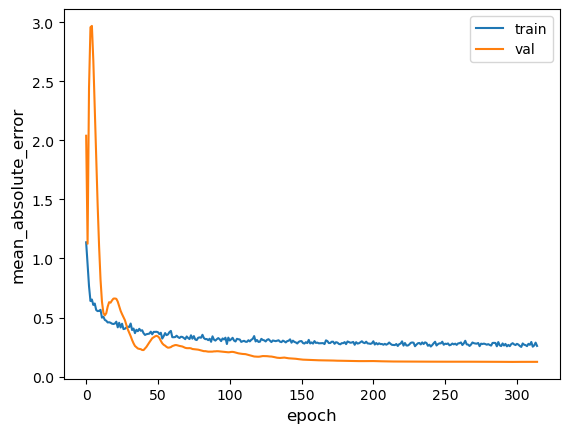

5/5 [==============================] - 0s 704us/step - loss: 0.0404 - mean_absolute_error: 0.1205
Test accuracy 0.1205013170838356
Test loss 0.04043760523200035


In [369]:
metric = 'mean_absolute_error'
plt.figure()
plt.plot(history.history[metric])
plt.plot(history.history["val_" + metric])
#plt.title("model " + metric + "\n Dense 32 + dense 16 + batch normalization + dropout 0.3")
plt.ylabel(metric, fontsize="large")
plt.xlabel("epoch", fontsize="large")
plt.legend(["train", "val"], loc="best")
plt.show()
plt.close()

#model = keras.models.load_model("best_model.h5")

test_loss, test_acc = multi_dense_model.evaluate(x_test, y_test)

print("Test accuracy", test_acc)
print("Test loss", test_loss)

In [370]:
y_test_pred = multi_dense_model.predict(x_test)

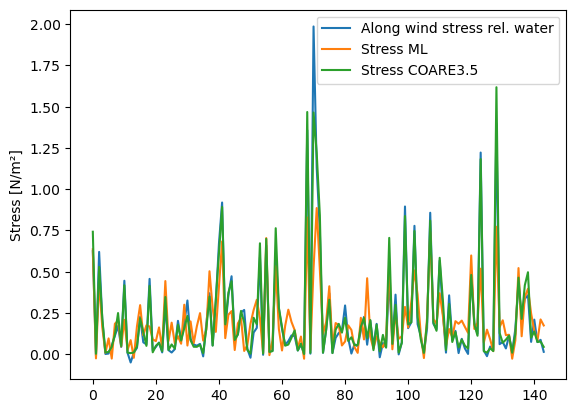

In [371]:
plt.plot(y_test.values, label='Along wind stress rel. water')
plt.plot(y_test_pred, label='Stress ML')
plt.plot(c_test.values, label='Stress COARE3.5')
plt.ylabel('Stress [N/m²]')
plt.legend()

In [372]:
rmse(y_test.values, y_test_pred)

0.3622846747594871

In [373]:
rmse(y_test.values, c_test.values)

0.06549902869322344

In [374]:
np.corrcoef(y_test.values, y_test_pred[:, 0])

array([[1.        , 0.78566846],
       [0.78566846, 1.        ]])

In [375]:
np.corrcoef(y_test.values, c_test.values)

array([[1.        , 0.97774818],
       [0.97774818, 1.        ]])

In [376]:
OUT_STEPS = 1
num_features = 1
batch_size =512
epochs=500

metric = 'mean_absolute_error'

In [377]:
try:
    del history
    del multi_dense_model
except:
    print('Variables do not exist')

In [378]:
multi_dense_model = tf.keras.Sequential([
    #tf.keras.layers.Dense(32, activation='relu'),
    #tf.keras.layers.BatchNormalization(),
    #tf.keras.layers.Dropout(rate=0.3),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dropout(rate=0.1),
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dropout(rate=0.1),
    tf.keras.layers.Dense(1)    
])

callbacks = [
    keras.callbacks.ModelCheckpoint(
        "best_model.h5", save_best_only=True, monitor="val_loss"
    ),
    keras.callbacks.ReduceLROnPlateau(
        monitor="val_loss", factor=0.5, patience=20, min_lr=0.0001
    ),
    keras.callbacks.EarlyStopping(monitor="val_loss", patience=50, verbose=1),
]

multi_dense_model.compile(
    optimizer=tf.optimizers.Adam(),
    loss=tf.losses.MeanSquaredError(),
    metrics=[tf.metrics.MeanAbsoluteError()],
)


history = multi_dense_model.fit(
    x_train,
    y_train,
    batch_size=batch_size,
    epochs=epochs,
    callbacks=callbacks,
    validation_split=0.3,
    verbose=1,
)

Epoch 1/500
1/1 [==============================] - 1s 552ms/step - loss: 1.0816 - mean_absolute_error: 0.7870 - val_loss: 86.8026 - val_mean_absolute_error: 9.2649
Epoch 2/500
1/1 [==============================] - 0s 25ms/step - loss: 1.0236 - mean_absolute_error: 0.7691 - val_loss: 57.3155 - val_mean_absolute_error: 7.5254
Epoch 3/500
1/1 [==============================] - 0s 23ms/step - loss: 1.0778 - mean_absolute_error: 0.8103 - val_loss: 44.1556 - val_mean_absolute_error: 6.6007
Epoch 4/500
1/1 [==============================] - 0s 24ms/step - loss: 0.9770 - mean_absolute_error: 0.7532 - val_loss: 41.2121 - val_mean_absolute_error: 6.3705
Epoch 5/500
1/1 [==============================] - 0s 23ms/step - loss: 1.0025 - mean_absolute_error: 0.7667 - val_loss: 40.7262 - val_mean_absolute_error: 6.3241
Epoch 6/500
1/1 [==============================] - 0s 24ms/step - loss: 1.0176 - mean_absolute_error: 0.7480 - val_loss: 41.4119 - val_mean_absolute_error: 6.3672
Epoch 7/500
1/1 [====

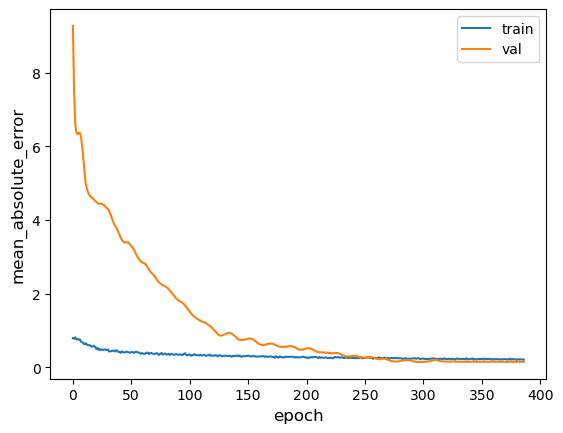

5/5 [==============================] - 0s 810us/step - loss: 0.0599 - mean_absolute_error: 0.1358
Test accuracy 0.13583925366401672
Test loss 0.05988878756761551


In [379]:
metric = 'mean_absolute_error'
plt.figure()
plt.plot(history.history[metric])
plt.plot(history.history["val_" + metric])
#plt.title("model " + metric + "\n Dense 32 + dense 16 + batch normalization + dropout 0.3")
plt.ylabel(metric, fontsize="large")
plt.xlabel("epoch", fontsize="large")
plt.legend(["train", "val"], loc="best")
plt.show()
plt.close()

#model = keras.models.load_model("best_model.h5")

test_loss, test_acc = multi_dense_model.evaluate(x_test, y_test)

print("Test accuracy", test_acc)
print("Test loss", test_loss)

In [380]:
y_test_pred = multi_dense_model.predict(x_test)

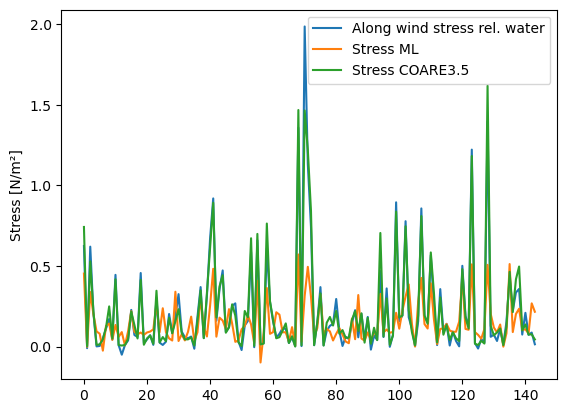

In [381]:
plt.plot(y_test.values, label='Along wind stress rel. water')
plt.plot(y_test_pred, label='Stress ML')
plt.plot(c_test.values, label='Stress COARE3.5')
plt.ylabel('Stress [N/m²]')
plt.legend()

In [382]:
rmse(y_test.values, y_test_pred)

0.3426089076195304

In [383]:
rmse(y_test.values, c_test.values)

0.06549902869322344

In [384]:
np.corrcoef(y_test.values, y_test_pred[:, 0])

array([[1.        , 0.72782252],
       [0.72782252, 1.        ]])

In [385]:
np.corrcoef(y_test.values, c_test.values)

array([[1.        , 0.97774818],
       [0.97774818, 1.        ]])

In [640]:
OUT_STEPS = 1
num_features = 1
batch_size =512
epochs=500

metric = 'mean_absolute_error'

In [641]:
try:
    del history
    del multi_dense_model
except:
    print('Variables do not exist')

In [642]:
multi_dense_model = tf.keras.Sequential([
    #tf.keras.layers.Dense(32, activation='relu'),
    #tf.keras.layers.BatchNormalization(),
    #tf.keras.layers.Dropout(rate=0.3),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dropout(rate=0.1),
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dropout(rate=0.1),
    tf.keras.layers.Dense(16, activation='relu'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dropout(rate=0.1),
    tf.keras.layers.Dense(1)    
])

callbacks = [
    keras.callbacks.ModelCheckpoint(
        "best_model.h5", save_best_only=True, monitor="val_loss"
    ),
    keras.callbacks.ReduceLROnPlateau(
        monitor="val_loss", factor=0.5, patience=20, min_lr=0.0001
    ),
    keras.callbacks.EarlyStopping(monitor="val_loss", patience=50, verbose=1),
]

multi_dense_model.compile(
    optimizer=tf.optimizers.Adam(),
    loss=tf.losses.MeanSquaredError(),
    metrics=[tf.metrics.MeanAbsoluteError()],
)


history = multi_dense_model.fit(
    x_train,
    y_train,
    batch_size=batch_size,
    epochs=epochs,
    callbacks=callbacks,
    validation_split=0.3,
    verbose=1,
)

Epoch 1/500
1/1 [==============================] - 1s 692ms/step - loss: 1.3340 - mean_absolute_error: 0.8720 - val_loss: 179.0409 - val_mean_absolute_error: 12.9452
Epoch 2/500
1/1 [==============================] - 0s 25ms/step - loss: 1.1562 - mean_absolute_error: 0.8041 - val_loss: 118.9407 - val_mean_absolute_error: 10.5071
Epoch 3/500
1/1 [==============================] - 0s 24ms/step - loss: 1.0510 - mean_absolute_error: 0.8095 - val_loss: 87.6738 - val_mean_absolute_error: 8.9552
Epoch 4/500
1/1 [==============================] - 0s 24ms/step - loss: 0.9490 - mean_absolute_error: 0.7627 - val_loss: 66.5343 - val_mean_absolute_error: 7.7646
Epoch 5/500
1/1 [==============================] - 0s 24ms/step - loss: 0.9354 - mean_absolute_error: 0.7526 - val_loss: 52.1165 - val_mean_absolute_error: 6.8418
Epoch 6/500
1/1 [==============================] - 0s 24ms/step - loss: 0.9915 - mean_absolute_error: 0.7804 - val_loss: 40.7906 - val_mean_absolute_error: 6.0182
Epoch 7/500
1/1 [

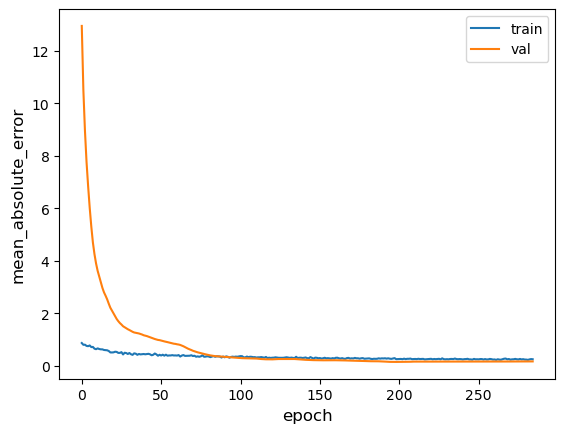

5/5 [==============================] - 0s 723us/step - loss: 0.0566 - mean_absolute_error: 0.1665
Test accuracy 0.16646823287010193
Test loss 0.056583523750305176


In [643]:
metric = 'mean_absolute_error'
plt.figure()
plt.plot(history.history[metric])
plt.plot(history.history["val_" + metric])
#plt.title("model " + metric + "\n Dense 32 + dense 16 + batch normalization + dropout 0.3")
plt.ylabel(metric, fontsize="large")
plt.xlabel("epoch", fontsize="large")
plt.legend(["train", "val"], loc="best")
plt.show()
plt.close()

#model = keras.models.load_model("best_model.h5")

test_loss, test_acc = multi_dense_model.evaluate(x_test, y_test)

print("Test accuracy", test_acc)
print("Test loss", test_loss)

In [644]:
y_test_pred = multi_dense_model.predict(x_test)

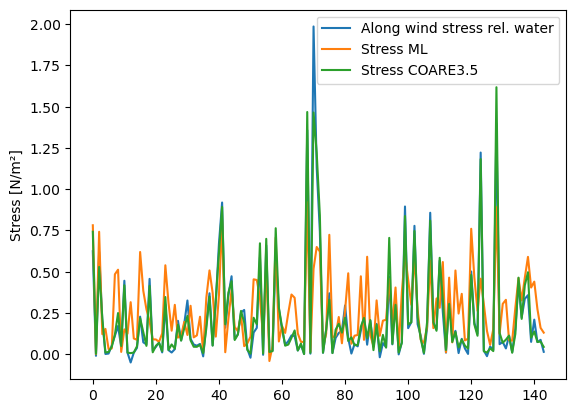

In [645]:
plt.plot(y_test.values, label='Along wind stress rel. water')
plt.plot(y_test_pred, label='Stress ML')
plt.plot(c_test.values, label='Stress COARE3.5')
plt.ylabel('Stress [N/m²]')
plt.legend()

In [646]:
rmse(y_test.values, y_test_pred)

0.3801584538891001

In [647]:
rmse(y_test.values, c_test.values)

0.06549902869322344

In [648]:
np.corrcoef(y_test.values, y_test_pred[:, 0])

array([[1.        , 0.66515989],
       [0.66515989, 1.        ]])

In [649]:
np.corrcoef(y_test.values, c_test.values)

array([[1.        , 0.97774818],
       [0.97774818, 1.        ]])

#### Very unstable - get different results every time I run it

In [665]:
OUT_STEPS = 1
num_features = 1
batch_size =256
epochs=500

metric = 'mean_absolute_error'

In [666]:
try:
    del history
    del multi_dense_model
except:
    print('Variables do not exist')

In [667]:
multi_dense_model = tf.keras.Sequential([
    tf.keras.layers.Dense(256, activation='relu'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dropout(rate=0.1),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dropout(rate=0.1),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dense(1)    
])

callbacks = [
    keras.callbacks.ModelCheckpoint(
        "best_model.h5", save_best_only=True, monitor="val_loss"
    ),
    keras.callbacks.ReduceLROnPlateau(
        monitor="val_loss", factor=0.5, patience=20, min_lr=0.0001
    ),
    keras.callbacks.EarlyStopping(monitor="val_loss", patience=50, verbose=1),
]

multi_dense_model.compile(
    optimizer=tf.optimizers.Adam(),
    loss=tf.losses.MeanSquaredError(),
    metrics=[tf.metrics.MeanAbsoluteError()],
)


history = multi_dense_model.fit(
    x_train,
    y_train,
    batch_size=batch_size,
    epochs=epochs,
    callbacks=callbacks,
    validation_split=0.3,
    verbose=1,
)

Epoch 1/500
2/2 [==============================] - 1s 121ms/step - loss: 2.6607 - mean_absolute_error: 1.3020 - val_loss: 58.3711 - val_mean_absolute_error: 7.3071
Epoch 2/500
2/2 [==============================] - 0s 24ms/step - loss: 1.3715 - mean_absolute_error: 0.9208 - val_loss: 61.1749 - val_mean_absolute_error: 7.4885
Epoch 3/500
2/2 [==============================] - 0s 24ms/step - loss: 0.7319 - mean_absolute_error: 0.6575 - val_loss: 105.9950 - val_mean_absolute_error: 9.8993
Epoch 4/500
2/2 [==============================] - 0s 23ms/step - loss: 0.5796 - mean_absolute_error: 0.5973 - val_loss: 118.5290 - val_mean_absolute_error: 10.4412
Epoch 5/500
2/2 [==============================] - 0s 23ms/step - loss: 0.5864 - mean_absolute_error: 0.6074 - val_loss: 104.2963 - val_mean_absolute_error: 9.7555
Epoch 6/500
2/2 [==============================] - 0s 23ms/step - loss: 0.4380 - mean_absolute_error: 0.5113 - val_loss: 83.7517 - val_mean_absolute_error: 8.6800
Epoch 7/500
2/2 [

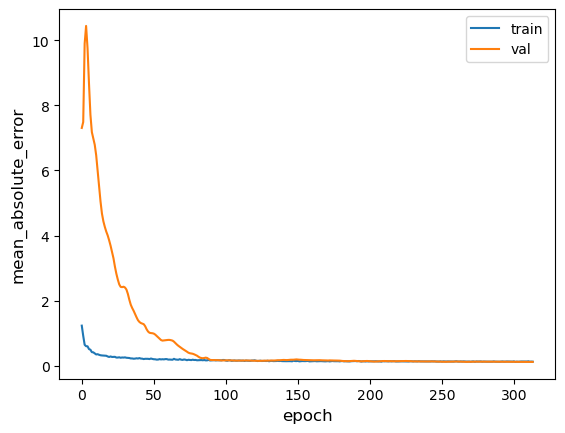

5/5 [==============================] - 0s 814us/step - loss: 0.0383 - mean_absolute_error: 0.1182
Test accuracy 0.11816481500864029
Test loss 0.03826897591352463


In [668]:
metric = 'mean_absolute_error'
plt.figure()
plt.plot(history.history[metric])
plt.plot(history.history["val_" + metric])
#plt.title("model " + metric + "\n Dense 32 + dense 16 + batch normalization + dropout 0.3")
plt.ylabel(metric, fontsize="large")
plt.xlabel("epoch", fontsize="large")
plt.legend(["train", "val"], loc="best")
plt.show()
plt.close()

#model = keras.models.load_model("best_model.h5")

test_loss, test_acc = multi_dense_model.evaluate(x_test, y_test)

print("Test accuracy", test_acc)
print("Test loss", test_loss)

In [669]:
y_test_pred = multi_dense_model.predict(x_test)

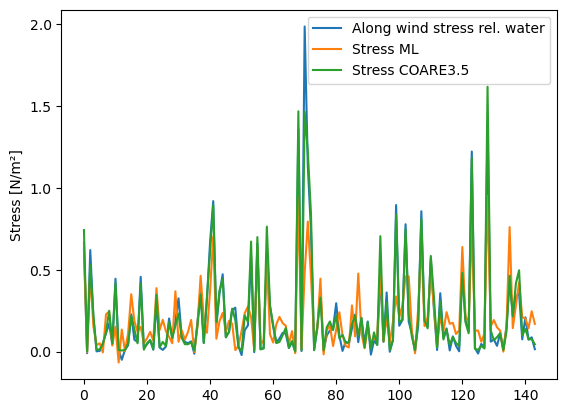

In [670]:
plt.plot(y_test.values, label='Along wind stress rel. water')
plt.plot(y_test_pred, label='Stress ML')
plt.plot(c_test.values, label='Stress COARE3.5')
plt.ylabel('Stress [N/m²]')
plt.legend()

In [671]:
rmse(y_test.values, y_test_pred)

0.36757524707097133

In [672]:
rmse(y_test.values, c_test.values)

0.06549902869322344

In [673]:
np.corrcoef(y_test.values, y_test_pred[:, 0])

array([[1.      , 0.793465],
       [0.793465, 1.      ]])

In [674]:
np.corrcoef(y_test.values, c_test.values)

array([[1.        , 0.97774818],
       [0.97774818, 1.        ]])

#### We need batch normalization

In [138]:
OUT_STEPS = 1
num_features = 1
batch_size =256
epochs=500

metric = 'mean_absolute_error'

In [139]:
try:
    del history
    del multi_dense_model
except:
    print('Variables do not exist')

In [140]:
multi_dense_model = tf.keras.Sequential([
    #tf.keras.layers.Dense(32, activation='relu'),
    #tf.keras.layers.BatchNormalization(),
    #tf.keras.layers.Dropout(rate=0.3),
    tf.keras.layers.Dense(256, activation='relu'),
    #tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dropout(rate=0.1),
    tf.keras.layers.Dense(128, activation='relu'),
    #tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dropout(rate=0.1),
    tf.keras.layers.Dense(64, activation='relu'),
    #tf.keras.layers.BatchNormalization(),
    #tf.keras.layers.Dropout(rate=0.1),
    #tf.keras.layers.Dense(32, activation='relu'),
    #tf.keras.layers.BatchNormalization(),
    #tf.keras.layers.Dropout(rate=0.1),
    tf.keras.layers.Dense(1)    
])

callbacks = [
    keras.callbacks.ModelCheckpoint(
        "best_model.h5", save_best_only=True, monitor="val_loss"
    ),
    keras.callbacks.ReduceLROnPlateau(
        monitor="val_loss", factor=0.5, patience=20, min_lr=0.0001
    ),
    keras.callbacks.EarlyStopping(monitor="val_loss", patience=50, verbose=1),
]

multi_dense_model.compile(
    optimizer=tf.optimizers.Adam(),
    loss=tf.losses.MeanSquaredError(),
    metrics=[tf.metrics.MeanAbsoluteError()],
)


history = multi_dense_model.fit(
    x_train,
    y_train,
    batch_size=batch_size,
    epochs=epochs,
    callbacks=callbacks,
    validation_split=0.3,
    verbose=1,
)

Epoch 1/500
2/2 [==============================] - 0s 101ms/step - loss: 195.7161 - mean_absolute_error: 10.7339 - val_loss: 31.9590 - val_mean_absolute_error: 5.5939
Epoch 2/500
2/2 [==============================] - 0s 23ms/step - loss: 111.6535 - mean_absolute_error: 8.4312 - val_loss: 199.3993 - val_mean_absolute_error: 13.6229
Epoch 3/500
2/2 [==============================] - 0s 22ms/step - loss: 281.8506 - mean_absolute_error: 14.4940 - val_loss: 5.0631 - val_mean_absolute_error: 1.9539
Epoch 4/500
2/2 [==============================] - 0s 23ms/step - loss: 57.9151 - mean_absolute_error: 5.8471 - val_loss: 60.5719 - val_mean_absolute_error: 7.6624
Epoch 5/500
2/2 [==============================] - 0s 23ms/step - loss: 101.3360 - mean_absolute_error: 8.3050 - val_loss: 70.1895 - val_mean_absolute_error: 8.2309
Epoch 6/500
2/2 [==============================] - 0s 22ms/step - loss: 105.7308 - mean_absolute_error: 8.5799 - val_loss: 7.5812 - val_mean_absolute_error: 2.7078
Epoch 7/

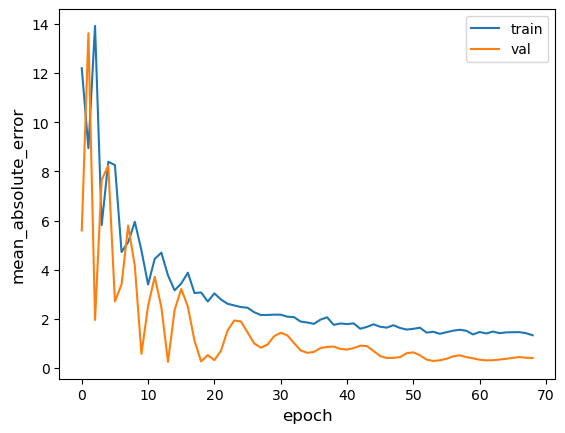

5/5 [==============================] - 0s 850us/step - loss: 0.2908 - mean_absolute_error: 0.3919
Test accuracy 0.3919186294078827
Test loss 0.29082685708999634


In [141]:
metric = 'mean_absolute_error'
plt.figure()
plt.plot(history.history[metric])
plt.plot(history.history["val_" + metric])
#plt.title("model " + metric + "\n Dense 32 + dense 16 + batch normalization + dropout 0.3")
plt.ylabel(metric, fontsize="large")
plt.xlabel("epoch", fontsize="large")
plt.legend(["train", "val"], loc="best")
plt.show()
plt.close()

#model = keras.models.load_model("best_model.h5")

test_loss, test_acc = multi_dense_model.evaluate(x_test, y_test)

print("Test accuracy", test_acc)
print("Test loss", test_loss)

In [142]:
y_test_pred = multi_dense_model.predict(x_test)

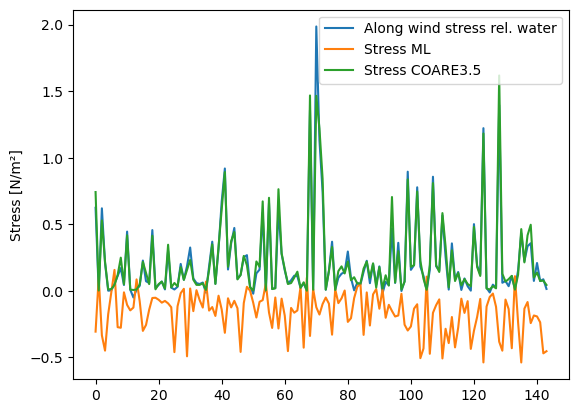

In [143]:
plt.plot(y_test.values, label='Along wind stress rel. water')
plt.plot(y_test_pred, label='Stress ML')
plt.plot(c_test.values, label='Stress COARE3.5')
plt.ylabel('Stress [N/m²]')
plt.legend()

In [144]:
rmse(y_test.values, y_test_pred)

0.5160119306648053

In [145]:
rmse(y_test.values, c_test.values)

0.06549902869322344

In [146]:
np.corrcoef(y_test.values, y_test_pred[:, 0])

array([[ 1.        , -0.25076799],
       [-0.25076799,  1.        ]])

In [147]:
np.corrcoef(y_test.values, c_test.values)

array([[1.        , 0.97774818],
       [0.97774818, 1.        ]])

In [88]:
OUT_STEPS = 1
num_features = 1
batch_size =32
epochs=500

metric = 'mean_absolute_error'

In [89]:
try:
    del history
    del multi_dense_model
except:
    print('Variables do not exist')

In [90]:
multi_dense_model = tf.keras.Sequential([
    tf.keras.layers.Dense(4, activation='relu'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dropout(rate=0.1),
    tf.keras.layers.Dense(4, activation='relu'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dropout(rate=0.1),
    tf.keras.layers.Dense(1)    
])

callbacks = [
    keras.callbacks.ModelCheckpoint(
        "best_model.h5", save_best_only=True, monitor="val_loss"
    ),
    keras.callbacks.ReduceLROnPlateau(
        monitor="val_loss", factor=0.5, patience=20, min_lr=0.0001
    ),
    keras.callbacks.EarlyStopping(monitor="val_loss", patience=50, verbose=1),
]

multi_dense_model.compile(
    optimizer=tf.optimizers.Adam(),
    loss=tf.losses.MeanSquaredError(),
    metrics=[tf.metrics.MeanAbsoluteError()],
)


history = multi_dense_model.fit(
    x_train,
    y_train,
    batch_size=batch_size,
    epochs=epochs,
    callbacks=callbacks,
    validation_split=0.3,
    verbose=1,
)

Epoch 1/500
13/13 [==============================] - 1s 10ms/step - loss: 0.1288 - mean_absolute_error: 0.2029 - val_loss: 0.1595 - val_mean_absolute_error: 0.2141
Epoch 2/500
13/13 [==============================] - 0s 2ms/step - loss: 0.1362 - mean_absolute_error: 0.1909 - val_loss: 0.1491 - val_mean_absolute_error: 0.2020
Epoch 3/500
13/13 [==============================] - 0s 2ms/step - loss: 0.0763 - mean_absolute_error: 0.1624 - val_loss: 0.1406 - val_mean_absolute_error: 0.1953
Epoch 4/500
13/13 [==============================] - 0s 2ms/step - loss: 0.1138 - mean_absolute_error: 0.1675 - val_loss: 0.1331 - val_mean_absolute_error: 0.1927
Epoch 5/500
13/13 [==============================] - 0s 2ms/step - loss: 0.0818 - mean_absolute_error: 0.1671 - val_loss: 0.1277 - val_mean_absolute_error: 0.1944
Epoch 6/500
13/13 [==============================] - 0s 2ms/step - loss: 0.0836 - mean_absolute_error: 0.1639 - val_loss: 0.1239 - val_mean_absolute_error: 0.1976
Epoch 7/500
13/13 [==

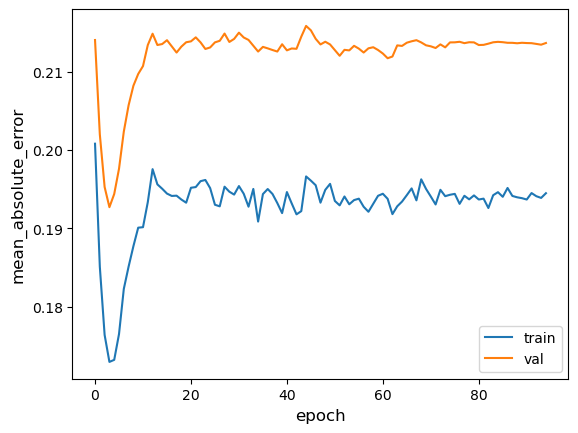

5/5 [==============================] - 0s 607us/step - loss: 0.0964 - mean_absolute_error: 0.2020
Test accuracy 0.20199796557426453
Test loss 0.09642080217599869


In [91]:
metric = 'mean_absolute_error'
plt.figure()
plt.plot(history.history[metric])
plt.plot(history.history["val_" + metric])
#plt.title("model " + metric + "\n Dense 32 + dense 16 + batch normalization + dropout 0.3")
plt.ylabel(metric, fontsize="large")
plt.xlabel("epoch", fontsize="large")
plt.legend(["train", "val"], loc="best")
plt.show()
plt.close()

#model = keras.models.load_model("best_model.h5")

test_loss, test_acc = multi_dense_model.evaluate(x_test, y_test)

print("Test accuracy", test_acc)
print("Test loss", test_loss)

In [92]:
y_test_pred = multi_dense_model.predict(x_test)

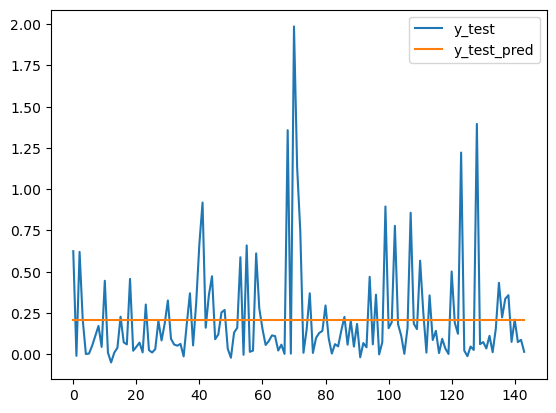

In [93]:
plt.plot(y_test.values, label='y_test')
plt.plot(y_test_pred, label='y_test_pred')
plt.legend()

In [94]:
rmse(y_test.values, y_test_pred)

0.3105169911673955

In [95]:
np.corrcoef(y_test.values, y_test_pred[:, 0])

/home/paulinast/.conda/envs/mlstormsurge/lib/python3.9/site-packages/numpy/lib/function_base.py:2691: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[:, None]
/home/paulinast/.conda/envs/mlstormsurge/lib/python3.9/site-packages/numpy/lib/function_base.py:2692: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[None, :]


array([[ 1., nan],
       [nan, nan]])

In [96]:
np.corrcoef(y_test.values, c_test.values)

array([[1.        , 0.97774818],
       [0.97774818, 1.        ]])

In [97]:
OUT_STEPS = 1
num_features = 1
batch_size =16
epochs=500

metric = 'mean_absolute_error'

In [98]:
try:
    del history
    del multi_dense_model
except:
    print('Variables do not exist')

In [99]:
multi_dense_model = tf.keras.Sequential([
    tf.keras.layers.Dense(4, activation='relu'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dropout(rate=0.1),
    tf.keras.layers.Dense(4, activation='relu'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dropout(rate=0.1),
    tf.keras.layers.Dense(2, activation='relu'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dropout(rate=0.1),
    tf.keras.layers.Dense(1)    
])

callbacks = [
    keras.callbacks.ModelCheckpoint(
        "best_model.h5", save_best_only=True, monitor="val_loss"
    ),
    keras.callbacks.ReduceLROnPlateau(
        monitor="val_loss", factor=0.5, patience=20, min_lr=0.0001
    ),
    keras.callbacks.EarlyStopping(monitor="val_loss", patience=50, verbose=1),
]

multi_dense_model.compile(
    optimizer=tf.optimizers.Adam(),
    loss=tf.losses.MeanSquaredError(),
    metrics=[tf.metrics.MeanAbsoluteError()],
)


history = multi_dense_model.fit(
    x_train,
    y_train,
    batch_size=batch_size,
    epochs=epochs,
    callbacks=callbacks,
    validation_split=0.3,
    verbose=1,
)

Epoch 1/500
25/25 [==============================] - 1s 6ms/step - loss: 2.9194 - mean_absolute_error: 1.4135 - val_loss: 36.6165 - val_mean_absolute_error: 5.8504
Epoch 2/500
25/25 [==============================] - 0s 2ms/step - loss: 2.1506 - mean_absolute_error: 1.1707 - val_loss: 13.7926 - val_mean_absolute_error: 3.4942
Epoch 3/500
25/25 [==============================] - 0s 2ms/step - loss: 1.6440 - mean_absolute_error: 0.9807 - val_loss: 6.7317 - val_mean_absolute_error: 2.3109
Epoch 4/500
25/25 [==============================] - 0s 2ms/step - loss: 1.0940 - mean_absolute_error: 0.7646 - val_loss: 3.8466 - val_mean_absolute_error: 1.5658
Epoch 5/500
25/25 [==============================] - 0s 2ms/step - loss: 0.6037 - mean_absolute_error: 0.5302 - val_loss: 2.5118 - val_mean_absolute_error: 1.2015
Epoch 6/500
25/25 [==============================] - 0s 2ms/step - loss: 0.4819 - mean_absolute_error: 0.4788 - val_loss: 1.6706 - val_mean_absolute_error: 0.9744
Epoch 7/500
25/25 [=

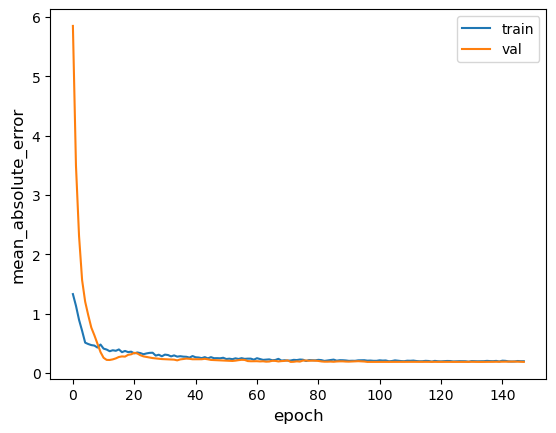

5/5 [==============================] - 0s 568us/step - loss: 0.0943 - mean_absolute_error: 0.1921
Test accuracy 0.19213160872459412
Test loss 0.09426552057266235


In [100]:
metric = 'mean_absolute_error'
plt.figure()
plt.plot(history.history[metric])
plt.plot(history.history["val_" + metric])
#plt.title("model " + metric + "\n Dense 32 + dense 16 + batch normalization + dropout 0.3")
plt.ylabel(metric, fontsize="large")
plt.xlabel("epoch", fontsize="large")
plt.legend(["train", "val"], loc="best")
plt.show()
plt.close()

#model = keras.models.load_model("best_model.h5")

test_loss, test_acc = multi_dense_model.evaluate(x_test, y_test)

print("Test accuracy", test_acc)
print("Test loss", test_loss)

In [101]:
y_test_pred = multi_dense_model.predict(x_test)

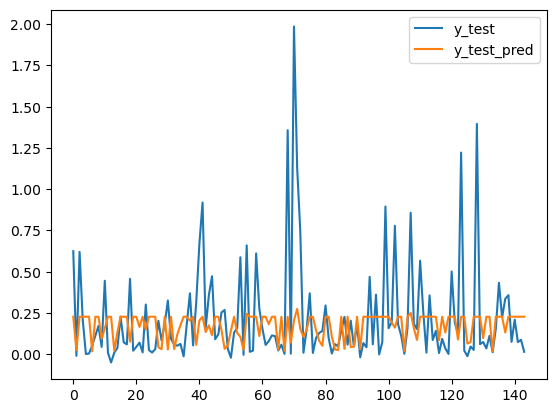

In [102]:
plt.plot(y_test.values, label='y_test')
plt.plot(y_test_pred, label='y_test_pred')
plt.legend()

In [103]:
rmse(y_test.values, y_test_pred)

0.32264976012429797

In [104]:
np.corrcoef(y_test.values, y_test_pred[:, 0])

array([[1.        , 0.20969295],
       [0.20969295, 1.        ]])

In [105]:
np.corrcoef(y_test.values, c_test.values)

array([[1.        , 0.97774818],
       [0.97774818, 1.        ]])

In [106]:
OUT_STEPS = 1
num_features = 1
batch_size =16
epochs=500

metric = 'mean_absolute_error'

In [107]:
try:
    del history
    del multi_dense_model
except:
    print('Variables do not exist')

In [108]:
multi_dense_model = tf.keras.Sequential([
    tf.keras.layers.Dense(4, activation='relu'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dropout(rate=0.1),
    tf.keras.layers.Dense(4, activation='relu'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dropout(rate=0.1),
    tf.keras.layers.Dense(2, activation='relu'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dropout(rate=0.1),
    tf.keras.layers.Dense(1)    
])

callbacks = [
    keras.callbacks.ModelCheckpoint(
        "best_model.h5", save_best_only=True, monitor="val_loss"
    ),
    keras.callbacks.ReduceLROnPlateau(
        monitor="val_loss", factor=0.5, patience=20, min_lr=0.0001
    ),
    keras.callbacks.EarlyStopping(monitor="val_loss", patience=50, verbose=1),
]

multi_dense_model.compile(
    optimizer=tf.optimizers.Adam(),
    loss=tf.losses.MeanSquaredError(),
    metrics=[tf.metrics.MeanAbsoluteError()],
)


history = multi_dense_model.fit(
    x_train,
    y_train,
    batch_size=batch_size,
    epochs=epochs,
    callbacks=callbacks,
    validation_split=0.3,
    verbose=1,
)

Epoch 1/500
25/25 [==============================] - 1s 6ms/step - loss: 0.3959 - mean_absolute_error: 0.5177 - val_loss: 0.3559 - val_mean_absolute_error: 0.5499
Epoch 2/500
25/25 [==============================] - 0s 2ms/step - loss: 0.3038 - mean_absolute_error: 0.4383 - val_loss: 0.2591 - val_mean_absolute_error: 0.4566
Epoch 3/500
25/25 [==============================] - 0s 2ms/step - loss: 0.2037 - mean_absolute_error: 0.3281 - val_loss: 0.2069 - val_mean_absolute_error: 0.3906
Epoch 4/500
25/25 [==============================] - 0s 2ms/step - loss: 0.1994 - mean_absolute_error: 0.2951 - val_loss: 0.1731 - val_mean_absolute_error: 0.3337
Epoch 5/500
25/25 [==============================] - 0s 2ms/step - loss: 0.1672 - mean_absolute_error: 0.2700 - val_loss: 0.1597 - val_mean_absolute_error: 0.3030
Epoch 6/500
25/25 [==============================] - 0s 2ms/step - loss: 0.1829 - mean_absolute_error: 0.2849 - val_loss: 0.1478 - val_mean_absolute_error: 0.2868
Epoch 7/500
25/25 [===

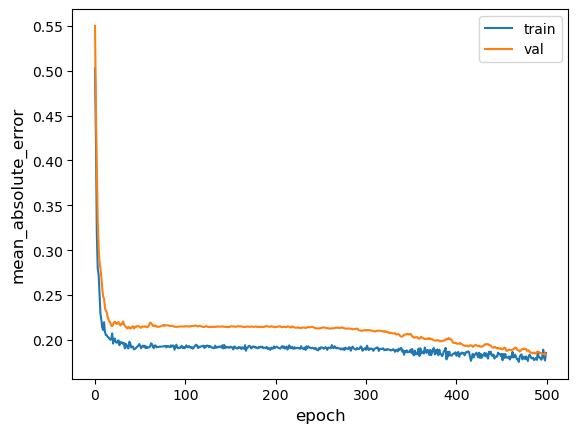

5/5 [==============================] - 0s 528us/step - loss: 0.0803 - mean_absolute_error: 0.1796
Test accuracy 0.17964142560958862
Test loss 0.08033254742622375


In [109]:
metric = 'mean_absolute_error'
plt.figure()
plt.plot(history.history[metric])
plt.plot(history.history["val_" + metric])
#plt.title("model " + metric + "\n Dense 32 + dense 16 + batch normalization + dropout 0.3")
plt.ylabel(metric, fontsize="large")
plt.xlabel("epoch", fontsize="large")
plt.legend(["train", "val"], loc="best")
plt.show()
plt.close()

#model = keras.models.load_model("best_model.h5")

test_loss, test_acc = multi_dense_model.evaluate(x_test, y_test)

print("Test accuracy", test_acc)
print("Test loss", test_loss)

In [110]:
y_test_pred = multi_dense_model.predict(x_test)

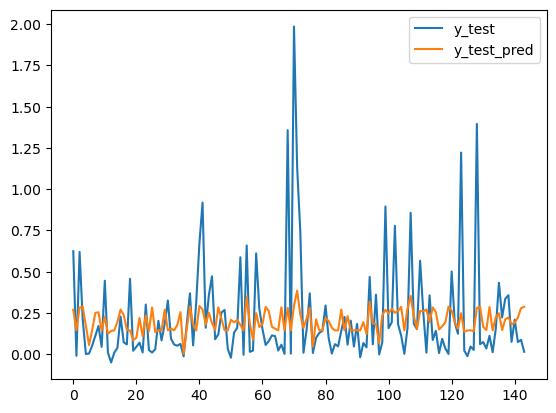

In [111]:
plt.plot(y_test.values, label='y_test')
plt.plot(y_test_pred, label='y_test_pred')
plt.legend()

In [112]:
rmse(y_test.values, y_test_pred)

0.3178867145253494

In [113]:
np.corrcoef(y_test.values, y_test_pred[:, 0])

array([[1.        , 0.50125872],
       [0.50125872, 1.        ]])

In [114]:
np.corrcoef(y_test.values, c_test.values)

array([[1.        , 0.97774818],
       [0.97774818, 1.        ]])

# __________________________________________________

# Using only s0_norm

In [675]:
predictor_variables = ['s0_norm']

In [676]:
x = df[predictor_variables]
x

s0_norm
220  -8.473507
169  -8.274988
467  -7.194283
151  -7.900857
695  -5.525506
..         ...
664  -8.598221
293  -9.489844
235 -10.061389
596  -9.238397
607  -9.680034

[704 rows x 1 columns]

In [677]:
y = -  df['UWr'] * df['rhoair']
y

220    0.434718
169    0.270790
467    0.492172
151    0.332047
695    0.518476
         ...   
664    0.074651
293    0.209381
235    0.073328
596    0.086927
607    0.014381
Length: 704, dtype: float64

NaNs: 

2018-12-04 11:10:59.993607         NaN

2018-12-16 23:11:59.981755         NaN

In [678]:
x_train = x[:split_idx]
x_test = x[split_idx:]

In [679]:
y_train = y[:split_idx]
y_test = y[split_idx:]

# ML setup

In [680]:
OUT_STEPS = 1
num_features = 1
batch_size =32
epochs=500

metric = 'mean_absolute_error'

In [681]:
try:
    del history
    del multi_dense_model
except:
    print('Variables do not exist')

# First experiment - Linear regression

In [682]:
multi_dense_model = tf.keras.Sequential([
    #tf.keras.layers.Dense(32, activation='relu'),
    #tf.keras.layers.BatchNormalization(),
    #tf.keras.layers.Dropout(rate=0.3),
    #tf.keras.layers.Dense(16, activation='relu'),
    #tf.keras.layers.BatchNormalization(),
    #tf.keras.layers.Dropout(rate=0.4),
    tf.keras.layers.Dense(1)    
])

callbacks = [
    keras.callbacks.ModelCheckpoint(
        "best_model.h5", save_best_only=True, monitor="val_loss"
    ),
    keras.callbacks.ReduceLROnPlateau(
        monitor="val_loss", factor=0.5, patience=20, min_lr=0.0001
    ),
    keras.callbacks.EarlyStopping(monitor="val_loss", patience=50, verbose=1),
]

multi_dense_model.compile(
    optimizer=tf.optimizers.Adam(),
    loss=tf.losses.MeanSquaredError(),
    metrics=[tf.metrics.MeanAbsoluteError()],
)


history = multi_dense_model.fit(
    x_train,
    y_train,
    batch_size=batch_size,
    epochs=epochs,
    callbacks=callbacks,
    validation_split=0.3,
    verbose=1,
)

Epoch 1/500
13/13 [==============================] - 0s 10ms/step - loss: 17.8765 - mean_absolute_error: 4.1612 - val_loss: 17.5026 - val_mean_absolute_error: 4.1249
Epoch 2/500
13/13 [==============================] - 0s 3ms/step - loss: 16.0695 - mean_absolute_error: 3.9538 - val_loss: 16.3664 - val_mean_absolute_error: 3.9889
Epoch 3/500
13/13 [==============================] - 0s 3ms/step - loss: 15.1633 - mean_absolute_error: 3.8433 - val_loss: 15.2721 - val_mean_absolute_error: 3.8534
Epoch 4/500
13/13 [==============================] - 0s 2ms/step - loss: 14.5256 - mean_absolute_error: 3.7542 - val_loss: 14.2343 - val_mean_absolute_error: 3.7203
Epoch 5/500
13/13 [==============================] - 0s 2ms/step - loss: 13.4268 - mean_absolute_error: 3.6057 - val_loss: 13.2589 - val_mean_absolute_error: 3.5906
Epoch 6/500
13/13 [==============================] - 0s 2ms/step - loss: 12.2084 - mean_absolute_error: 3.4513 - val_loss: 12.3369 - val_mean_absolute_error: 3.4635
Epoch 7/5

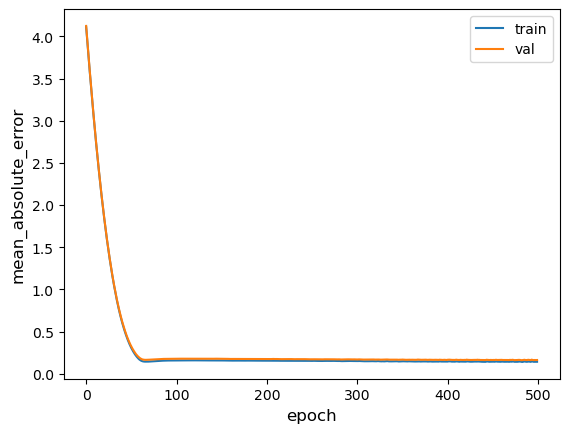

5/5 [==============================] - 0s 601us/step - loss: 0.0626 - mean_absolute_error: 0.1522
Test accuracy 0.15224948525428772
Test loss 0.06257721781730652


In [683]:
metric = 'mean_absolute_error'
plt.figure()
plt.plot(history.history[metric])
plt.plot(history.history["val_" + metric])
#plt.title("model " + metric + "\n Dense 32 + dense 16 + batch normalization + dropout 0.3")
plt.ylabel(metric, fontsize="large")
plt.xlabel("epoch", fontsize="large")
plt.legend(["train", "val"], loc="best")
plt.show()
plt.close()

#model = keras.models.load_model("best_model.h5")

test_loss, test_acc = multi_dense_model.evaluate(x_test, y_test)

print("Test accuracy", test_acc)
print("Test loss", test_loss)

In [684]:
y_test_pred = multi_dense_model.predict(x_test)

In [685]:
np.mean(y_test)

0.21862490743242802

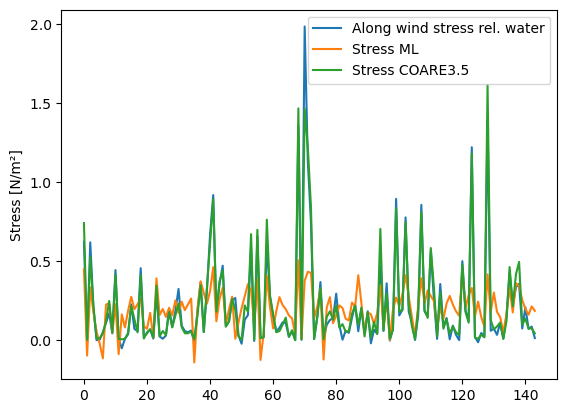

In [686]:
plt.plot(y_test.values, label='Along wind stress rel. water')
plt.plot(y_test_pred, label='Stress ML')
plt.plot(c_test.values, label='Stress COARE3.5')
plt.ylabel('Stress [N/m²]')
plt.legend()

In [687]:
rmse(y_test.values, y_test_pred)

0.33486161718283164

In [688]:
rmse(y_test.values, c_test)

0.06549902869322344

In [689]:
np.corrcoef(y_test.values, y_test_pred[:, 0])

array([[1.        , 0.63910322],
       [0.63910322, 1.        ]])

In [690]:
np.corrcoef(y_test.values, c_test.values)

array([[1.        , 0.97774818],
       [0.97774818, 1.        ]])

# Other experiments

In [691]:
OUT_STEPS = 1
num_features = 1
batch_size =32
epochs=500

metric = 'mean_absolute_error'

In [692]:
try:
    del history
    del multi_dense_model
except:
    print('Variables do not exist')

In [693]:
multi_dense_model = tf.keras.Sequential([
    #tf.keras.layers.Dense(32, activation='relu'),
    #tf.keras.layers.BatchNormalization(),
    #tf.keras.layers.Dropout(rate=0.3),
    tf.keras.layers.Dense(4, activation='relu'),
    tf.keras.layers.BatchNormalization(),
    #tf.keras.layers.Dropout(rate=0.4),
    tf.keras.layers.Dense(1)    
])

callbacks = [
    keras.callbacks.ModelCheckpoint(
        "best_model.h5", save_best_only=True, monitor="val_loss"
    ),
    keras.callbacks.ReduceLROnPlateau(
        monitor="val_loss", factor=0.5, patience=20, min_lr=0.0001
    ),
    keras.callbacks.EarlyStopping(monitor="val_loss", patience=50, verbose=1),
]

multi_dense_model.compile(
    optimizer=tf.optimizers.Adam(),
    loss=tf.losses.MeanSquaredError(),
    metrics=[tf.metrics.MeanAbsoluteError()],
)


history = multi_dense_model.fit(
    x_train,
    y_train,
    batch_size=batch_size,
    epochs=epochs,
    callbacks=callbacks,
    validation_split=0.3,
    verbose=1,
)

Epoch 1/500
13/13 [==============================] - 0s 9ms/step - loss: 2.1714 - mean_absolute_error: 1.1160 - val_loss: 2.1384 - val_mean_absolute_error: 1.3607
Epoch 2/500
13/13 [==============================] - 0s 3ms/step - loss: 2.0263 - mean_absolute_error: 1.0758 - val_loss: 1.6354 - val_mean_absolute_error: 1.1732
Epoch 3/500
13/13 [==============================] - 0s 3ms/step - loss: 1.7453 - mean_absolute_error: 1.0197 - val_loss: 1.1093 - val_mean_absolute_error: 0.9523
Epoch 4/500
13/13 [==============================] - 0s 3ms/step - loss: 1.6076 - mean_absolute_error: 0.9370 - val_loss: 0.6646 - val_mean_absolute_error: 0.7189
Epoch 5/500
13/13 [==============================] - 0s 3ms/step - loss: 1.4302 - mean_absolute_error: 0.9056 - val_loss: 0.3771 - val_mean_absolute_error: 0.5136
Epoch 6/500
13/13 [==============================] - 0s 2ms/step - loss: 1.2492 - mean_absolute_error: 0.8446 - val_loss: 0.2509 - val_mean_absolute_error: 0.3696
Epoch 7/500
13/13 [===

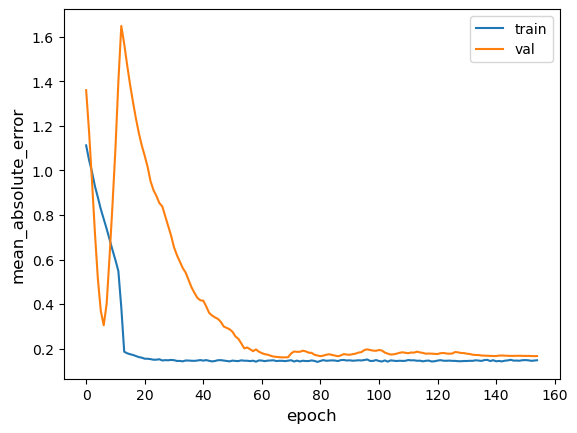

5/5 [==============================] - 0s 700us/step - loss: 0.0579 - mean_absolute_error: 0.1566
Test accuracy 0.15659116208553314
Test loss 0.057945482432842255


In [694]:
metric = 'mean_absolute_error'
plt.figure()
plt.plot(history.history[metric])
plt.plot(history.history["val_" + metric])
#plt.title("model " + metric + "\n Dense 32 + dense 16 + batch normalization + dropout 0.3")
plt.ylabel(metric, fontsize="large")
plt.xlabel("epoch", fontsize="large")
plt.legend(["train", "val"], loc="best")
plt.show()
plt.close()

#model = keras.models.load_model("best_model.h5")

test_loss, test_acc = multi_dense_model.evaluate(x_test, y_test)

print("Test accuracy", test_acc)
print("Test loss", test_loss)

In [695]:
y_test_pred = multi_dense_model.predict(x_test)

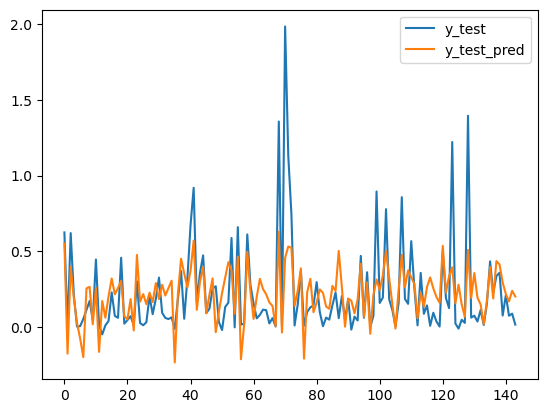

In [696]:
plt.plot(y_test.values, label='y_test')
plt.plot(y_test_pred, label='y_test_pred')
plt.legend()

In [697]:
rmse(y_test.values, y_test_pred)

0.3523857955765627

In [700]:
np.corrcoef(y_test.values, y_test_pred[:, 0])

array([[1.        , 0.63910339],
       [0.63910339, 1.        ]])

In [701]:
np.corrcoef(y_test.values, c_test.values)

array([[1.        , 0.97774818],
       [0.97774818, 1.        ]])

In [702]:
OUT_STEPS = 1
num_features = 1
batch_size =32
epochs=500

metric = 'mean_absolute_error'

In [703]:
try:
    del history
    del multi_dense_model
except:
    print('Variables do not exist')

In [704]:
multi_dense_model = tf.keras.Sequential([
    #tf.keras.layers.Dense(32, activation='relu'),
    #tf.keras.layers.BatchNormalization(),
    #tf.keras.layers.Dropout(rate=0.3),
    tf.keras.layers.Dense(4, activation='relu'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dropout(rate=0.2),
    tf.keras.layers.Dense(1)    
])

callbacks = [
    keras.callbacks.ModelCheckpoint(
        "best_model.h5", save_best_only=True, monitor="val_loss"
    ),
    keras.callbacks.ReduceLROnPlateau(
        monitor="val_loss", factor=0.5, patience=20, min_lr=0.0001
    ),
    keras.callbacks.EarlyStopping(monitor="val_loss", patience=50, verbose=1),
]

multi_dense_model.compile(
    optimizer=tf.optimizers.Adam(),
    loss=tf.losses.MeanSquaredError(),
    metrics=[tf.metrics.MeanAbsoluteError()],
)


history = multi_dense_model.fit(
    x_train,
    y_train,
    batch_size=batch_size,
    epochs=epochs,
    callbacks=callbacks,
    validation_split=0.3,
    verbose=1,
)

Epoch 1/500
13/13 [==============================] - 1s 18ms/step - loss: 1.8807 - mean_absolute_error: 1.0030 - val_loss: 34.4377 - val_mean_absolute_error: 5.7468
Epoch 2/500
13/13 [==============================] - 0s 3ms/step - loss: 0.7181 - mean_absolute_error: 0.6208 - val_loss: 20.7727 - val_mean_absolute_error: 4.4387
Epoch 3/500
13/13 [==============================] - 0s 3ms/step - loss: 0.6062 - mean_absolute_error: 0.5350 - val_loss: 13.1807 - val_mean_absolute_error: 3.5103
Epoch 4/500
13/13 [==============================] - 0s 3ms/step - loss: 0.5151 - mean_absolute_error: 0.5249 - val_loss: 8.6186 - val_mean_absolute_error: 2.8118
Epoch 5/500
13/13 [==============================] - 0s 2ms/step - loss: 0.5653 - mean_absolute_error: 0.5211 - val_loss: 5.8074 - val_mean_absolute_error: 2.2796
Epoch 6/500
13/13 [==============================] - 0s 2ms/step - loss: 0.5356 - mean_absolute_error: 0.5124 - val_loss: 3.9819 - val_mean_absolute_error: 1.8571
Epoch 7/500
13/13 

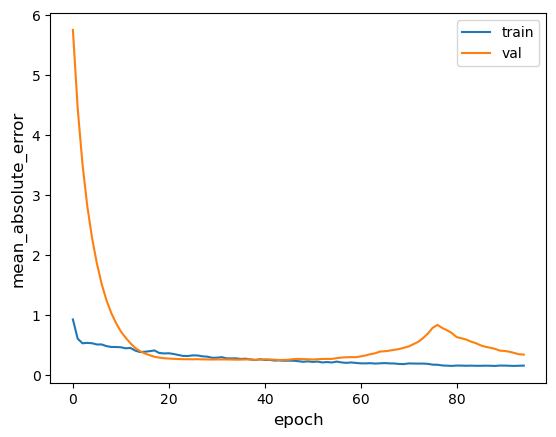

5/5 [==============================] - 0s 664us/step - loss: 0.1395 - mean_absolute_error: 0.3345
Test accuracy 0.334537148475647
Test loss 0.13945549726486206


In [705]:
metric = 'mean_absolute_error'
plt.figure()
plt.plot(history.history[metric])
plt.plot(history.history["val_" + metric])
#plt.title("model " + metric + "\n Dense 32 + dense 16 + batch normalization + dropout 0.3")
plt.ylabel(metric, fontsize="large")
plt.xlabel("epoch", fontsize="large")
plt.legend(["train", "val"], loc="best")
plt.show()
plt.close()

#model = keras.models.load_model("best_model.h5")

test_loss, test_acc = multi_dense_model.evaluate(x_test, y_test)

print("Test accuracy", test_acc)
print("Test loss", test_loss)

In [706]:
y_test_pred = multi_dense_model.predict(x_test)

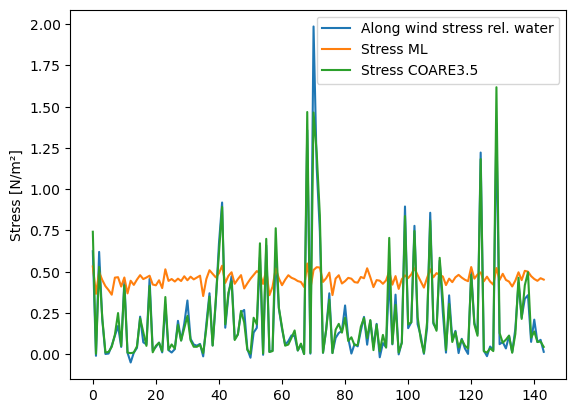

In [707]:
plt.plot(y_test.values, label='Along wind stress rel. water')
plt.plot(y_test_pred, label='Stress ML')
plt.plot(c_test.values, label='Stress COARE3.5')
plt.ylabel('Stress [N/m²]')
plt.legend()

In [708]:
rmse(y_test.values, y_test_pred)

0.3931228504993975

In [709]:
rmse(c_test.values, y_test.values)

0.06549902869322344

In [710]:
np.corrcoef(y_test.values, y_test_pred[:, 0])

array([[1.        , 0.63910329],
       [0.63910329, 1.        ]])

In [711]:
np.corrcoef(y_test.values, c_test.values)

array([[1.        , 0.97774818],
       [0.97774818, 1.        ]])

In [712]:
OUT_STEPS = 1
num_features = 1
batch_size =32
epochs=500

metric = 'mean_absolute_error'

In [713]:
try:
    del history
    del multi_dense_model
except:
    print('Variables do not exist')

In [714]:
multi_dense_model = tf.keras.Sequential([
    #tf.keras.layers.Dense(32, activation='relu'),
    #tf.keras.layers.BatchNormalization(),
    #tf.keras.layers.Dropout(rate=0.3),
    tf.keras.layers.Dense(4, activation='relu'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dropout(rate=0.1),
    tf.keras.layers.Dense(1)    
])

callbacks = [
    keras.callbacks.ModelCheckpoint(
        "best_model.h5", save_best_only=True, monitor="val_loss"
    ),
    keras.callbacks.ReduceLROnPlateau(
        monitor="val_loss", factor=0.5, patience=20, min_lr=0.0001
    ),
    keras.callbacks.EarlyStopping(monitor="val_loss", patience=50, verbose=1),
]

multi_dense_model.compile(
    optimizer=tf.optimizers.Adam(),
    loss=tf.losses.MeanSquaredError(),
    metrics=[tf.metrics.MeanAbsoluteError()],
)


history = multi_dense_model.fit(
    x_train,
    y_train,
    batch_size=batch_size,
    epochs=epochs,
    callbacks=callbacks,
    validation_split=0.3,
    verbose=1,
)

Epoch 1/500
13/13 [==============================] - 0s 9ms/step - loss: 0.9126 - mean_absolute_error: 0.7003 - val_loss: 36.4313 - val_mean_absolute_error: 5.9089
Epoch 2/500
13/13 [==============================] - 0s 3ms/step - loss: 0.4303 - mean_absolute_error: 0.4662 - val_loss: 20.6648 - val_mean_absolute_error: 4.4263
Epoch 3/500
13/13 [==============================] - 0s 3ms/step - loss: 0.4519 - mean_absolute_error: 0.4991 - val_loss: 11.1116 - val_mean_absolute_error: 3.2220
Epoch 4/500
13/13 [==============================] - 0s 3ms/step - loss: 0.5184 - mean_absolute_error: 0.4592 - val_loss: 6.0600 - val_mean_absolute_error: 2.3545
Epoch 5/500
13/13 [==============================] - 0s 3ms/step - loss: 0.4137 - mean_absolute_error: 0.4214 - val_loss: 3.3434 - val_mean_absolute_error: 1.7222
Epoch 6/500
13/13 [==============================] - 0s 2ms/step - loss: 0.2901 - mean_absolute_error: 0.3830 - val_loss: 1.7234 - val_mean_absolute_error: 1.2044
Epoch 7/500
13/13 [

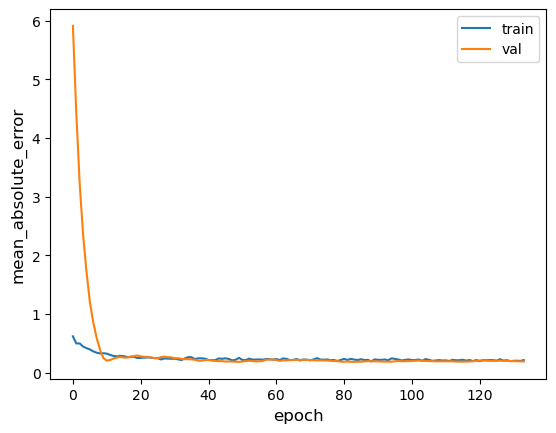

5/5 [==============================] - 0s 739us/step - loss: 0.0629 - mean_absolute_error: 0.1823
Test accuracy 0.18232101202011108
Test loss 0.06292898952960968


In [715]:
metric = 'mean_absolute_error'
plt.figure()
plt.plot(history.history[metric])
plt.plot(history.history["val_" + metric])
#plt.title("model " + metric + "\n Dense 32 + dense 16 + batch normalization + dropout 0.3")
plt.ylabel(metric, fontsize="large")
plt.xlabel("epoch", fontsize="large")
plt.legend(["train", "val"], loc="best")
plt.show()
plt.close()

#model = keras.models.load_model("best_model.h5")

test_loss, test_acc = multi_dense_model.evaluate(x_test, y_test)

print("Test accuracy", test_acc)
print("Test loss", test_loss)

In [716]:
y_test_pred = multi_dense_model.predict(x_test)

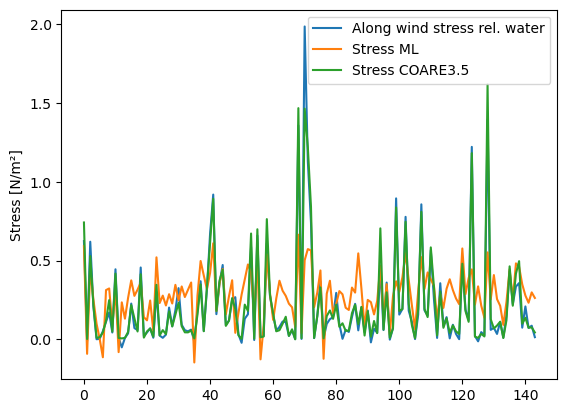

In [717]:
plt.plot(y_test.values, label='Along wind stress rel. water')
plt.plot(y_test_pred, label='Stress ML')
plt.plot(c_test.values, label='Stress COARE3.5')
plt.ylabel('Stress [N/m²]')
plt.legend()

In [718]:
rmse(y_test.values, y_test_pred)

0.3536595734309756

In [719]:
rmse(c_test.values, y_test.values)

0.06549902869322344

In [720]:
np.corrcoef(y_test.values, y_test_pred[:, 0])

array([[1.        , 0.63910324],
       [0.63910324, 1.        ]])

In [721]:
np.corrcoef(y_test.values, c_test.values)

array([[1.        , 0.97774818],
       [0.97774818, 1.        ]])

In [722]:
OUT_STEPS = 1
num_features = 1
batch_size =16
epochs=500

metric = 'mean_absolute_error'

In [723]:
try:
    del history
    del multi_dense_model
except:
    print('Variables do not exist')

In [724]:
multi_dense_model = tf.keras.Sequential([
    #tf.keras.layers.Dense(32, activation='relu'),
    #tf.keras.layers.BatchNormalization(),
    #tf.keras.layers.Dropout(rate=0.3),
    tf.keras.layers.Dense(4, activation='relu'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dropout(rate=0.1),
    tf.keras.layers.Dense(1)    
])

callbacks = [
    keras.callbacks.ModelCheckpoint(
        "best_model.h5", save_best_only=True, monitor="val_loss"
    ),
    keras.callbacks.ReduceLROnPlateau(
        monitor="val_loss", factor=0.5, patience=20, min_lr=0.0001
    ),
    keras.callbacks.EarlyStopping(monitor="val_loss", patience=50, verbose=1),
]

multi_dense_model.compile(
    optimizer=tf.optimizers.Adam(),
    loss=tf.losses.MeanSquaredError(),
    metrics=[tf.metrics.MeanAbsoluteError()],
)


history = multi_dense_model.fit(
    x_train,
    y_train,
    batch_size=batch_size,
    epochs=epochs,
    callbacks=callbacks,
    validation_split=0.3,
    verbose=1,
)

Epoch 1/500
25/25 [==============================] - 0s 5ms/step - loss: 3.2904 - mean_absolute_error: 1.3151 - val_loss: 32.4980 - val_mean_absolute_error: 5.4259
Epoch 2/500
25/25 [==============================] - 0s 2ms/step - loss: 2.8376 - mean_absolute_error: 1.2949 - val_loss: 16.7363 - val_mean_absolute_error: 3.7808
Epoch 3/500
25/25 [==============================] - 0s 2ms/step - loss: 2.4446 - mean_absolute_error: 1.2038 - val_loss: 8.5867 - val_mean_absolute_error: 2.6030
Epoch 4/500
25/25 [==============================] - 0s 2ms/step - loss: 2.5255 - mean_absolute_error: 1.1607 - val_loss: 4.6564 - val_mean_absolute_error: 1.8354
Epoch 5/500
25/25 [==============================] - 0s 2ms/step - loss: 2.0094 - mean_absolute_error: 1.0864 - val_loss: 2.7286 - val_mean_absolute_error: 1.3502
Epoch 6/500
25/25 [==============================] - 0s 2ms/step - loss: 1.9561 - mean_absolute_error: 1.0226 - val_loss: 1.7244 - val_mean_absolute_error: 1.0314
Epoch 7/500
25/25 [=

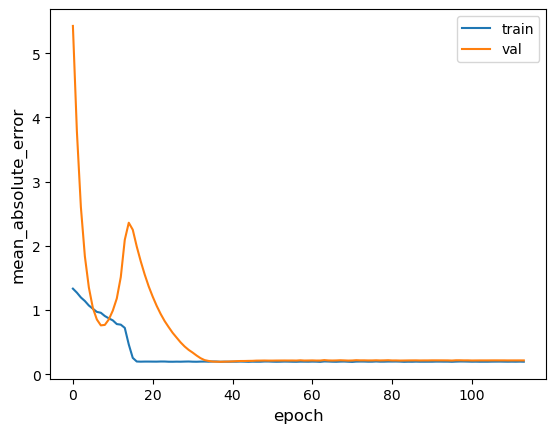

5/5 [==============================] - 0s 620us/step - loss: 0.0964 - mean_absolute_error: 0.2022
Test accuracy 0.2022252082824707
Test loss 0.096407450735569


In [725]:
metric = 'mean_absolute_error'
plt.figure()
plt.plot(history.history[metric])
plt.plot(history.history["val_" + metric])
#plt.title("model " + metric + "\n Dense 32 + dense 16 + batch normalization + dropout 0.3")
plt.ylabel(metric, fontsize="large")
plt.xlabel("epoch", fontsize="large")
plt.legend(["train", "val"], loc="best")
plt.show()
plt.close()

#model = keras.models.load_model("best_model.h5")

test_loss, test_acc = multi_dense_model.evaluate(x_test, y_test)

print("Test accuracy", test_acc)
print("Test loss", test_loss)

In [726]:
y_test_pred = multi_dense_model.predict(x_test)

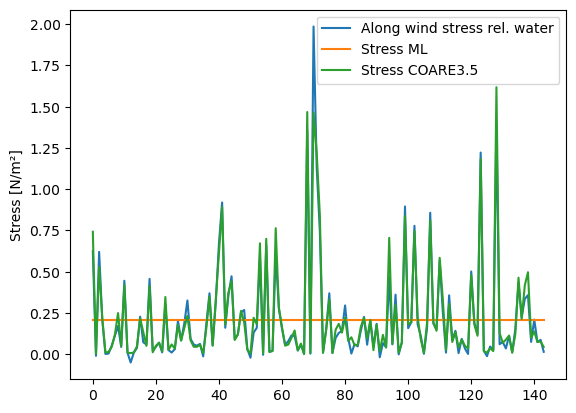

In [727]:
plt.plot(y_test.values, label='Along wind stress rel. water')
plt.plot(y_test_pred, label='Stress ML')
plt.plot(c_test.values, label='Stress COARE3.5')
plt.ylabel('Stress [N/m²]')
plt.legend()

In [728]:
rmse(y_test.values, y_test_pred)

0.31049549546379845

In [729]:
rmse(y_test.values, c_test)

0.06549902869322344

In [730]:
np.corrcoef(y_test.values, y_test_pred[:, 0])

/home/paulinast/.conda/envs/mlstormsurge/lib/python3.9/site-packages/numpy/lib/function_base.py:2691: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[:, None]
/home/paulinast/.conda/envs/mlstormsurge/lib/python3.9/site-packages/numpy/lib/function_base.py:2692: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[None, :]


array([[ 1., nan],
       [nan, nan]])

In [731]:
np.corrcoef(y_test.values, c_test.values)

array([[1.        , 0.97774818],
       [0.97774818, 1.        ]])

In [732]:
OUT_STEPS = 1
num_features = 1
batch_size =32
epochs=500

metric = 'mean_absolute_error'

In [733]:
try:
    del history
    del multi_dense_model
except:
    print('Variables do not exist')

In [734]:
multi_dense_model = tf.keras.Sequential([
    #tf.keras.layers.Dense(32, activation='relu'),
    #tf.keras.layers.BatchNormalization(),
    #tf.keras.layers.Dropout(rate=0.3),
    tf.keras.layers.Dense(8, activation='relu'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dropout(rate=0.1),
    tf.keras.layers.Dense(1)    
])

callbacks = [
    keras.callbacks.ModelCheckpoint(
        "best_model.h5", save_best_only=True, monitor="val_loss"
    ),
    keras.callbacks.ReduceLROnPlateau(
        monitor="val_loss", factor=0.5, patience=20, min_lr=0.0001
    ),
    keras.callbacks.EarlyStopping(monitor="val_loss", patience=50, verbose=1),
]

multi_dense_model.compile(
    optimizer=tf.optimizers.Adam(),
    loss=tf.losses.MeanSquaredError(),
    metrics=[tf.metrics.MeanAbsoluteError()],
)


history = multi_dense_model.fit(
    x_train,
    y_train,
    batch_size=batch_size,
    epochs=epochs,
    callbacks=callbacks,
    validation_split=0.3,
    verbose=1,
)

Epoch 1/500
13/13 [==============================] - 0s 9ms/step - loss: 0.1606 - mean_absolute_error: 0.2343 - val_loss: 1.1879 - val_mean_absolute_error: 1.0052
Epoch 2/500
13/13 [==============================] - 0s 3ms/step - loss: 0.1153 - mean_absolute_error: 0.1897 - val_loss: 0.7632 - val_mean_absolute_error: 0.7979
Epoch 3/500
13/13 [==============================] - 0s 3ms/step - loss: 0.1047 - mean_absolute_error: 0.1883 - val_loss: 0.5115 - val_mean_absolute_error: 0.6441
Epoch 4/500
13/13 [==============================] - 0s 3ms/step - loss: 0.0949 - mean_absolute_error: 0.1737 - val_loss: 0.3832 - val_mean_absolute_error: 0.5482
Epoch 5/500
13/13 [==============================] - 0s 3ms/step - loss: 0.1098 - mean_absolute_error: 0.1951 - val_loss: 0.3415 - val_mean_absolute_error: 0.5116
Epoch 6/500
13/13 [==============================] - 0s 3ms/step - loss: 0.0816 - mean_absolute_error: 0.1808 - val_loss: 0.3074 - val_mean_absolute_error: 0.4786
Epoch 7/500
13/13 [===

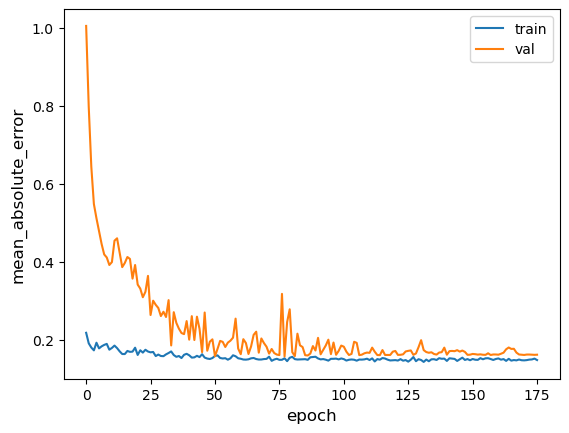

5/5 [==============================] - 0s 615us/step - loss: 0.0584 - mean_absolute_error: 0.1509
Test accuracy 0.15091069042682648
Test loss 0.058389052748680115


In [735]:
metric = 'mean_absolute_error'
plt.figure()
plt.plot(history.history[metric])
plt.plot(history.history["val_" + metric])
#plt.title("model " + metric + "\n Dense 32 + dense 16 + batch normalization + dropout 0.3")
plt.ylabel(metric, fontsize="large")
plt.xlabel("epoch", fontsize="large")
plt.legend(["train", "val"], loc="best")
plt.show()
plt.close()

#model = keras.models.load_model("best_model.h5")

test_loss, test_acc = multi_dense_model.evaluate(x_test, y_test)

print("Test accuracy", test_acc)
print("Test loss", test_loss)

In [736]:
y_test_pred = multi_dense_model.predict(x_test)

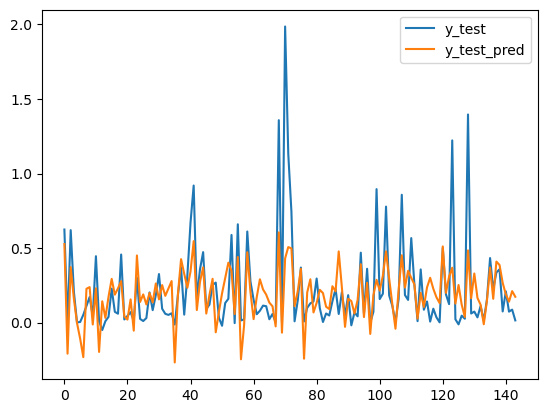

In [737]:
plt.plot(y_test.values, label='y_test')
plt.plot(y_test_pred, label='y_test_pred')
plt.legend()

In [738]:
rmse(y_test.values, y_test_pred)

0.3539130768740982

In [739]:
np.corrcoef(y_test.values, y_test_pred[:, 0])

array([[1.        , 0.63910323],
       [0.63910323, 1.        ]])

In [740]:
np.corrcoef(y_test.values, c_test.values)

array([[1.        , 0.97774818],
       [0.97774818, 1.        ]])

In [741]:
OUT_STEPS = 1
num_features = 1
batch_size =32
epochs=500

metric = 'mean_absolute_error'

In [742]:
try:
    del history
    del multi_dense_model
except:
    print('Variables do not exist')

In [743]:
multi_dense_model = tf.keras.Sequential([
    tf.keras.layers.Dense(4, activation='relu'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dropout(rate=0.1),
    tf.keras.layers.Dense(4, activation='relu'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dropout(rate=0.1),
    tf.keras.layers.Dense(1)    
])

callbacks = [
    keras.callbacks.ModelCheckpoint(
        "best_model.h5", save_best_only=True, monitor="val_loss"
    ),
    keras.callbacks.ReduceLROnPlateau(
        monitor="val_loss", factor=0.5, patience=20, min_lr=0.0001
    ),
    keras.callbacks.EarlyStopping(monitor="val_loss", patience=50, verbose=1),
]

multi_dense_model.compile(
    optimizer=tf.optimizers.Adam(),
    loss=tf.losses.MeanSquaredError(),
    metrics=[tf.metrics.MeanAbsoluteError()],
)


history = multi_dense_model.fit(
    x_train,
    y_train,
    batch_size=batch_size,
    epochs=epochs,
    callbacks=callbacks,
    validation_split=0.3,
    verbose=1,
)

Epoch 1/500
13/13 [==============================] - 1s 12ms/step - loss: 0.5006 - mean_absolute_error: 0.5446 - val_loss: 0.6719 - val_mean_absolute_error: 0.7478
Epoch 2/500
13/13 [==============================] - 0s 3ms/step - loss: 0.5623 - mean_absolute_error: 0.5530 - val_loss: 0.5181 - val_mean_absolute_error: 0.6448
Epoch 3/500
13/13 [==============================] - 0s 3ms/step - loss: 0.5021 - mean_absolute_error: 0.5003 - val_loss: 0.3997 - val_mean_absolute_error: 0.5518
Epoch 4/500
13/13 [==============================] - 0s 3ms/step - loss: 0.3391 - mean_absolute_error: 0.4390 - val_loss: 0.3171 - val_mean_absolute_error: 0.4738
Epoch 5/500
13/13 [==============================] - 0s 3ms/step - loss: 0.3693 - mean_absolute_error: 0.4338 - val_loss: 0.2639 - val_mean_absolute_error: 0.4136
Epoch 6/500
13/13 [==============================] - 0s 3ms/step - loss: 0.4523 - mean_absolute_error: 0.4201 - val_loss: 0.2260 - val_mean_absolute_error: 0.3630
Epoch 7/500
13/13 [==

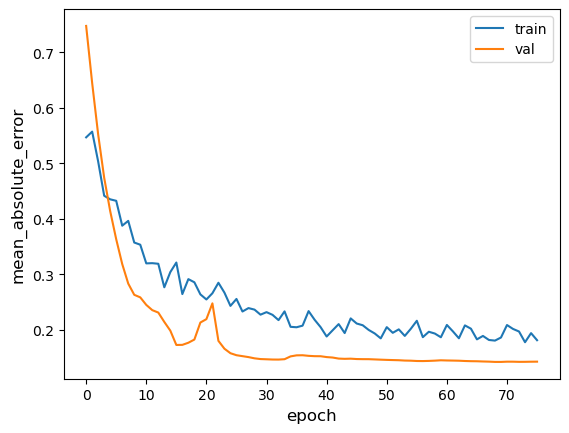

5/5 [==============================] - 0s 612us/step - loss: 0.0468 - mean_absolute_error: 0.1308
Test accuracy 0.1307665854692459
Test loss 0.046771369874477386


In [744]:
metric = 'mean_absolute_error'
plt.figure()
plt.plot(history.history[metric])
plt.plot(history.history["val_" + metric])
#plt.title("model " + metric + "\n Dense 32 + dense 16 + batch normalization + dropout 0.3")
plt.ylabel(metric, fontsize="large")
plt.xlabel("epoch", fontsize="large")
plt.legend(["train", "val"], loc="best")
plt.show()
plt.close()

#model = keras.models.load_model("best_model.h5")

test_loss, test_acc = multi_dense_model.evaluate(x_test, y_test)

print("Test accuracy", test_acc)
print("Test loss", test_loss)

In [745]:
y_test_pred = multi_dense_model.predict(x_test)

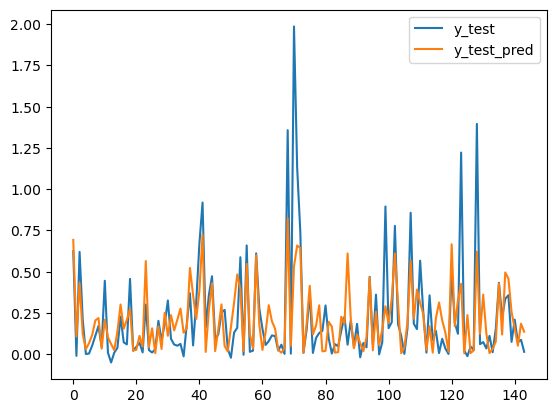

In [746]:
plt.plot(y_test.values, label='y_test')
plt.plot(y_test_pred, label='y_test_pred')
plt.legend()

In [747]:
rmse(y_test.values, y_test_pred)

0.363172907297227

In [748]:
np.corrcoef(y_test.values, y_test_pred[:, 0])

array([[1.        , 0.72725113],
       [0.72725113, 1.        ]])

In [749]:
np.corrcoef(y_test.values, c_test.values)

array([[1.        , 0.97774818],
       [0.97774818, 1.        ]])

In [750]:
OUT_STEPS = 1
num_features = 1
batch_size =16
epochs=500

metric = 'mean_absolute_error'

In [751]:
try:
    del history
    del multi_dense_model
except:
    print('Variables do not exist')

In [752]:
multi_dense_model = tf.keras.Sequential([
    tf.keras.layers.Dense(4, activation='relu'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dropout(rate=0.1),
    tf.keras.layers.Dense(4, activation='relu'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dropout(rate=0.1),
    tf.keras.layers.Dense(2, activation='relu'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dropout(rate=0.1),
    tf.keras.layers.Dense(1)    
])

callbacks = [
    keras.callbacks.ModelCheckpoint(
        "best_model.h5", save_best_only=True, monitor="val_loss"
    ),
    keras.callbacks.ReduceLROnPlateau(
        monitor="val_loss", factor=0.5, patience=20, min_lr=0.0001
    ),
    keras.callbacks.EarlyStopping(monitor="val_loss", patience=50, verbose=1),
]

multi_dense_model.compile(
    optimizer=tf.optimizers.Adam(),
    loss=tf.losses.MeanSquaredError(),
    metrics=[tf.metrics.MeanAbsoluteError()],
)


history = multi_dense_model.fit(
    x_train,
    y_train,
    batch_size=batch_size,
    epochs=epochs,
    callbacks=callbacks,
    validation_split=0.3,
    verbose=1,
)

Epoch 1/500
25/25 [==============================] - 1s 7ms/step - loss: 0.5296 - mean_absolute_error: 0.5606 - val_loss: 0.1656 - val_mean_absolute_error: 0.2230
Epoch 2/500
25/25 [==============================] - 0s 2ms/step - loss: 0.4652 - mean_absolute_error: 0.5294 - val_loss: 0.1665 - val_mean_absolute_error: 0.2244
Epoch 3/500
25/25 [==============================] - 0s 2ms/step - loss: 0.2997 - mean_absolute_error: 0.4407 - val_loss: 0.1601 - val_mean_absolute_error: 0.2220
Epoch 4/500
25/25 [==============================] - 0s 2ms/step - loss: 0.2470 - mean_absolute_error: 0.3921 - val_loss: 0.1532 - val_mean_absolute_error: 0.2198
Epoch 5/500
25/25 [==============================] - 0s 2ms/step - loss: 0.2091 - mean_absolute_error: 0.3465 - val_loss: 0.1298 - val_mean_absolute_error: 0.2024
Epoch 6/500
25/25 [==============================] - 0s 2ms/step - loss: 0.1704 - mean_absolute_error: 0.3175 - val_loss: 0.1060 - val_mean_absolute_error: 0.1748
Epoch 7/500
25/25 [===

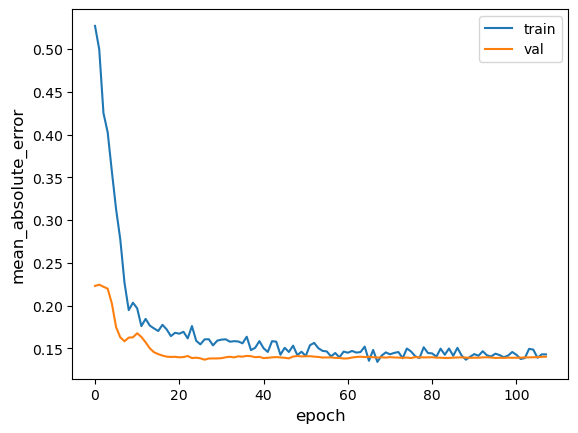

5/5 [==============================] - 0s 656us/step - loss: 0.0511 - mean_absolute_error: 0.1317
Test accuracy 0.13168446719646454
Test loss 0.051127608865499496


In [753]:
metric = 'mean_absolute_error'
plt.figure()
plt.plot(history.history[metric])
plt.plot(history.history["val_" + metric])
#plt.title("model " + metric + "\n Dense 32 + dense 16 + batch normalization + dropout 0.3")
plt.ylabel(metric, fontsize="large")
plt.xlabel("epoch", fontsize="large")
plt.legend(["train", "val"], loc="best")
plt.show()
plt.close()

#model = keras.models.load_model("best_model.h5")

test_loss, test_acc = multi_dense_model.evaluate(x_test, y_test)

print("Test accuracy", test_acc)
print("Test loss", test_loss)

In [754]:
y_test_pred = multi_dense_model.predict(x_test)

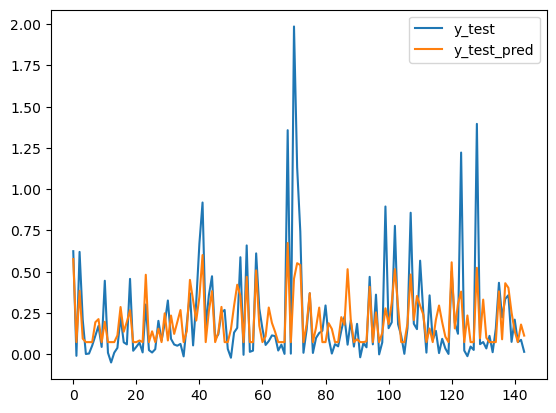

In [755]:
plt.plot(y_test.values, label='y_test')
plt.plot(y_test_pred, label='y_test_pred')
plt.legend()

In [756]:
rmse(y_test.values, y_test_pred)

0.34465883365726563

In [757]:
np.corrcoef(y_test.values, y_test_pred[:, 0])

array([[1.        , 0.73087353],
       [0.73087353, 1.        ]])

In [758]:
np.corrcoef(y_test.values, c_test.values)

array([[1.        , 0.97774818],
       [0.97774818, 1.        ]])

In [759]:
OUT_STEPS = 1
num_features = 1
batch_size =16
epochs=500

metric = 'mean_absolute_error'

In [760]:
try:
    del history
    del multi_dense_model
except:
    print('Variables do not exist')

In [761]:
multi_dense_model = tf.keras.Sequential([
    tf.keras.layers.Dense(4, activation='relu'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dropout(rate=0.1),
    tf.keras.layers.Dense(4, activation='relu'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dropout(rate=0.1),
    tf.keras.layers.Dense(2, activation='relu'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dropout(rate=0.1),
    tf.keras.layers.Dense(1)    
])

callbacks = [
    keras.callbacks.ModelCheckpoint(
        "best_model.h5", save_best_only=True, monitor="val_loss"
    ),
    keras.callbacks.ReduceLROnPlateau(
        monitor="val_loss", factor=0.5, patience=20, min_lr=0.0001
    ),
    keras.callbacks.EarlyStopping(monitor="val_loss", patience=50, verbose=1),
]

multi_dense_model.compile(
    optimizer=tf.optimizers.Adam(),
    loss=tf.losses.MeanSquaredError(),
    metrics=[tf.metrics.MeanAbsoluteError()],
)


history = multi_dense_model.fit(
    x_train,
    y_train,
    batch_size=batch_size,
    epochs=epochs,
    callbacks=callbacks,
    validation_split=0.3,
    verbose=1,
)

Epoch 1/500
25/25 [==============================] - 1s 7ms/step - loss: 0.6074 - mean_absolute_error: 0.6011 - val_loss: 0.1327 - val_mean_absolute_error: 0.1927
Epoch 2/500
25/25 [==============================] - 0s 2ms/step - loss: 0.5499 - mean_absolute_error: 0.5736 - val_loss: 0.1183 - val_mean_absolute_error: 0.2145
Epoch 3/500
25/25 [==============================] - 0s 2ms/step - loss: 0.4781 - mean_absolute_error: 0.5473 - val_loss: 0.1293 - val_mean_absolute_error: 0.2585
Epoch 4/500
25/25 [==============================] - 0s 2ms/step - loss: 0.4219 - mean_absolute_error: 0.5064 - val_loss: 0.1592 - val_mean_absolute_error: 0.3089
Epoch 5/500
25/25 [==============================] - 0s 2ms/step - loss: 0.3356 - mean_absolute_error: 0.4409 - val_loss: 0.1729 - val_mean_absolute_error: 0.3223
Epoch 6/500
25/25 [==============================] - 0s 2ms/step - loss: 0.3834 - mean_absolute_error: 0.4276 - val_loss: 0.1777 - val_mean_absolute_error: 0.3190
Epoch 7/500
25/25 [===

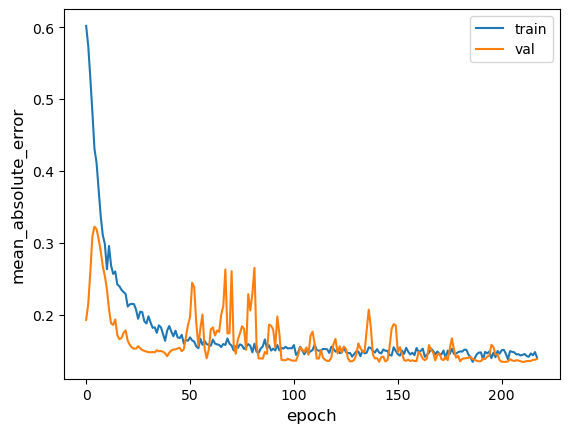

5/5 [==============================] - 0s 689us/step - loss: 0.0513 - mean_absolute_error: 0.1299
Test accuracy 0.12993012368679047
Test loss 0.05130065232515335


In [762]:
metric = 'mean_absolute_error'
plt.figure()
plt.plot(history.history[metric])
plt.plot(history.history["val_" + metric])
#plt.title("model " + metric + "\n Dense 32 + dense 16 + batch normalization + dropout 0.3")
plt.ylabel(metric, fontsize="large")
plt.xlabel("epoch", fontsize="large")
plt.legend(["train", "val"], loc="best")
plt.show()
plt.close()

#model = keras.models.load_model("best_model.h5")

test_loss, test_acc = multi_dense_model.evaluate(x_test, y_test)

print("Test accuracy", test_acc)
print("Test loss", test_loss)

In [763]:
y_test_pred = multi_dense_model.predict(x_test)

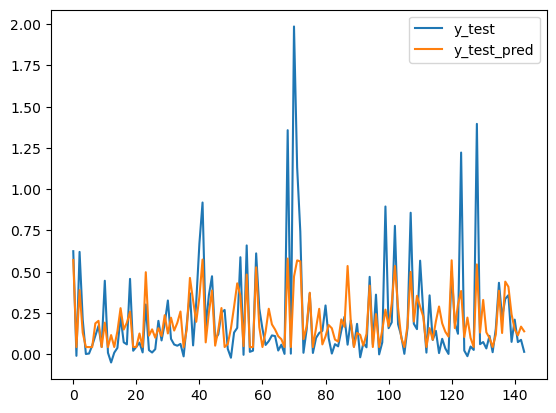

In [764]:
plt.plot(y_test.values, label='y_test')
plt.plot(y_test_pred, label='y_test_pred')
plt.legend()

In [765]:
rmse(y_test.values, y_test_pred)

0.34515562704059993

In [767]:
np.corrcoef(y_test.values, y_test_pred[:, 0])

array([[1.        , 0.72701643],
       [0.72701643, 1.        ]])

In [768]:
np.corrcoef(y_test.values, c_test.values)

array([[1.        , 0.97774818],
       [0.97774818, 1.        ]])

In [769]:
OUT_STEPS = 1
num_features = 1
batch_size =16
epochs=500

metric = 'mean_absolute_error'

In [770]:
try:
    del history
    del multi_dense_model
except:
    print('Variables do not exist')

In [771]:
multi_dense_model = tf.keras.Sequential([
    #tf.keras.layers.Dense(32, activation='relu'),
    #tf.keras.layers.BatchNormalization(),
    #tf.keras.layers.Dropout(rate=0.3),
    tf.keras.layers.Dense(16, activation='relu'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dropout(rate=0.1),
    tf.keras.layers.Dense(1)    
])

callbacks = [
    keras.callbacks.ModelCheckpoint(
        "best_model.h5", save_best_only=True, monitor="val_loss"
    ),
    keras.callbacks.ReduceLROnPlateau(
        monitor="val_loss", factor=0.5, patience=20, min_lr=0.0001
    ),
    keras.callbacks.EarlyStopping(monitor="val_loss", patience=50, verbose=1),
]

multi_dense_model.compile(
    optimizer=tf.optimizers.Adam(),
    loss=tf.losses.MeanSquaredError(),
    metrics=[tf.metrics.MeanAbsoluteError()],
)


history = multi_dense_model.fit(
    x_train,
    y_train,
    batch_size=batch_size,
    epochs=epochs,
    callbacks=callbacks,
    validation_split=0.3,
    verbose=1,
)

Epoch 1/500
25/25 [==============================] - 0s 5ms/step - loss: 0.6528 - mean_absolute_error: 0.6000 - val_loss: 0.5652 - val_mean_absolute_error: 0.6816
Epoch 2/500
25/25 [==============================] - 0s 2ms/step - loss: 0.4226 - mean_absolute_error: 0.4469 - val_loss: 0.1720 - val_mean_absolute_error: 0.2491
Epoch 3/500
25/25 [==============================] - 0s 2ms/step - loss: 0.2441 - mean_absolute_error: 0.3075 - val_loss: 0.5477 - val_mean_absolute_error: 0.6839
Epoch 4/500
25/25 [==============================] - 0s 2ms/step - loss: 0.1147 - mean_absolute_error: 0.2320 - val_loss: 0.7618 - val_mean_absolute_error: 0.8218
Epoch 5/500
25/25 [==============================] - 0s 2ms/step - loss: 0.1143 - mean_absolute_error: 0.2152 - val_loss: 0.6250 - val_mean_absolute_error: 0.7303
Epoch 6/500
25/25 [==============================] - 0s 2ms/step - loss: 0.1533 - mean_absolute_error: 0.2381 - val_loss: 0.5025 - val_mean_absolute_error: 0.6379
Epoch 7/500
25/25 [===

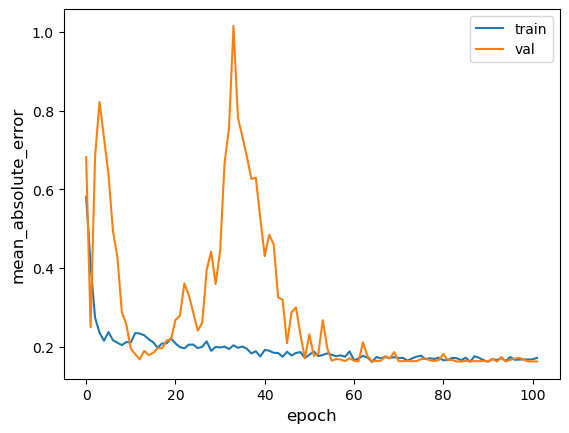

5/5 [==============================] - 0s 743us/step - loss: 0.0584 - mean_absolute_error: 0.1510
Test accuracy 0.1510043442249298
Test loss 0.058351628482341766


In [772]:
metric = 'mean_absolute_error'
plt.figure()
plt.plot(history.history[metric])
plt.plot(history.history["val_" + metric])
#plt.title("model " + metric + "\n Dense 32 + dense 16 + batch normalization + dropout 0.3")
plt.ylabel(metric, fontsize="large")
plt.xlabel("epoch", fontsize="large")
plt.legend(["train", "val"], loc="best")
plt.show()
plt.close()

#model = keras.models.load_model("best_model.h5")

test_loss, test_acc = multi_dense_model.evaluate(x_test, y_test)

print("Test accuracy", test_acc)
print("Test loss", test_loss)

In [773]:
y_test_pred = multi_dense_model.predict(x_test)

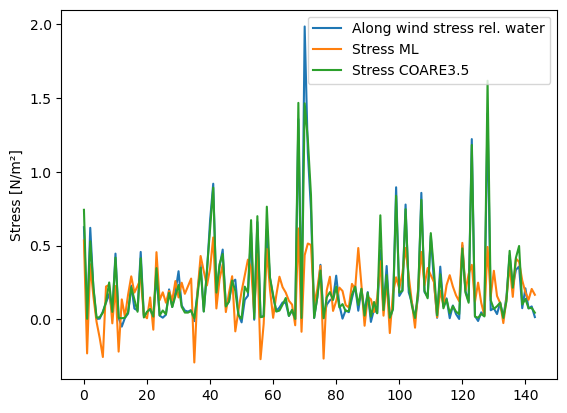

In [774]:
plt.plot(y_test.values, label='Along wind stress rel. water')
plt.plot(y_test_pred, label='Stress ML')
plt.plot(c_test.values, label='Stress COARE3.5')
plt.ylabel('Stress [N/m²]')
plt.legend()

In [775]:
rmse(y_test.values, y_test_pred)

0.3578478735115795

In [776]:
rmse(y_test.values, c_test.values)

0.06549902869322344

In [777]:
np.corrcoef(y_test.values, y_test_pred[:, 0])

array([[1.        , 0.63910324],
       [0.63910324, 1.        ]])

In [778]:
np.corrcoef(y_test.values, c_test.values)

array([[1.        , 0.97774818],
       [0.97774818, 1.        ]])

In [779]:
OUT_STEPS = 1
num_features = 1
batch_size =16
epochs=500

metric = 'mean_absolute_error'

In [780]:
try:
    del history
    del multi_dense_model
except:
    print('Variables do not exist')

In [781]:
multi_dense_model = tf.keras.Sequential([
    #tf.keras.layers.Dense(32, activation='relu'),
    #tf.keras.layers.BatchNormalization(),
    #tf.keras.layers.Dropout(rate=0.3),
    tf.keras.layers.Dense(16, activation='relu'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dropout(rate=0.1),
    tf.keras.layers.Dense(8, activation='relu'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dropout(rate=0.1),
    tf.keras.layers.Dense(1)    
])

callbacks = [
    keras.callbacks.ModelCheckpoint(
        "best_model.h5", save_best_only=True, monitor="val_loss"
    ),
    keras.callbacks.ReduceLROnPlateau(
        monitor="val_loss", factor=0.5, patience=20, min_lr=0.0001
    ),
    keras.callbacks.EarlyStopping(monitor="val_loss", patience=50, verbose=1),
]

multi_dense_model.compile(
    optimizer=tf.optimizers.Adam(),
    loss=tf.losses.MeanSquaredError(),
    metrics=[tf.metrics.MeanAbsoluteError()],
)


history = multi_dense_model.fit(
    x_train,
    y_train,
    batch_size=batch_size,
    epochs=epochs,
    callbacks=callbacks,
    validation_split=0.3,
    verbose=1,
)

Epoch 1/500
25/25 [==============================] - 1s 6ms/step - loss: 3.2327 - mean_absolute_error: 1.2778 - val_loss: 7.5328 - val_mean_absolute_error: 2.5772
Epoch 2/500
25/25 [==============================] - 0s 2ms/step - loss: 1.9052 - mean_absolute_error: 0.9023 - val_loss: 2.0877 - val_mean_absolute_error: 1.3042
Epoch 3/500
25/25 [==============================] - 0s 2ms/step - loss: 1.0682 - mean_absolute_error: 0.6733 - val_loss: 0.9263 - val_mean_absolute_error: 0.8383
Epoch 4/500
25/25 [==============================] - 0s 2ms/step - loss: 0.9104 - mean_absolute_error: 0.6091 - val_loss: 0.4402 - val_mean_absolute_error: 0.5600
Epoch 5/500
25/25 [==============================] - 0s 2ms/step - loss: 1.1400 - mean_absolute_error: 0.6523 - val_loss: 0.3263 - val_mean_absolute_error: 0.4597
Epoch 6/500
25/25 [==============================] - 0s 2ms/step - loss: 0.9167 - mean_absolute_error: 0.6158 - val_loss: 0.1807 - val_mean_absolute_error: 0.2710
Epoch 7/500
25/25 [===

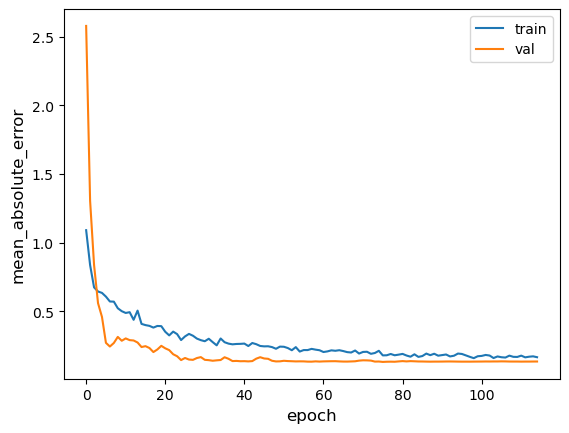

5/5 [==============================] - 0s 688us/step - loss: 0.0460 - mean_absolute_error: 0.1240
Test accuracy 0.12397655099630356
Test loss 0.04597241431474686


In [782]:
metric = 'mean_absolute_error'
plt.figure()
plt.plot(history.history[metric])
plt.plot(history.history["val_" + metric])
#plt.title("model " + metric + "\n Dense 32 + dense 16 + batch normalization + dropout 0.3")
plt.ylabel(metric, fontsize="large")
plt.xlabel("epoch", fontsize="large")
plt.legend(["train", "val"], loc="best")
plt.show()
plt.close()

#model = keras.models.load_model("best_model.h5")

test_loss, test_acc = multi_dense_model.evaluate(x_test, y_test)

print("Test accuracy", test_acc)
print("Test loss", test_loss)

In [783]:
y_test_pred = multi_dense_model.predict(x_test)

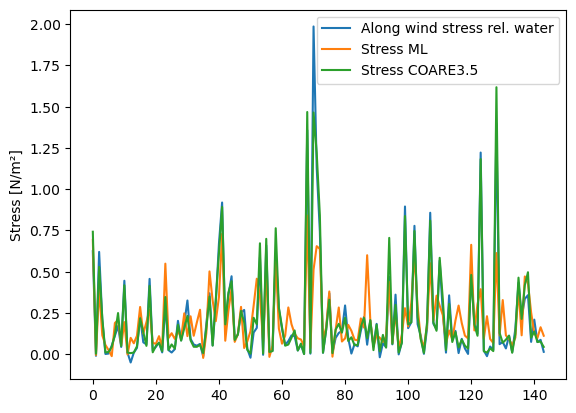

In [784]:
plt.plot(y_test.values, label='Along wind stress rel. water')
plt.plot(y_test_pred, label='Stress ML')
plt.plot(c_test.values, label='Stress COARE3.5')
plt.ylabel('Stress [N/m²]')
plt.legend()

In [785]:
rmse(y_test.values, y_test_pred)

0.35761482845773135

In [786]:
rmse(y_test.values, c_test.values)

0.06549902869322344

In [787]:
np.corrcoef(y_test.values, y_test_pred[:, 0])

array([[1.        , 0.74351253],
       [0.74351253, 1.        ]])

In [788]:
np.corrcoef(y_test.values, c_test.values)

array([[1.        , 0.97774818],
       [0.97774818, 1.        ]])

In [789]:
OUT_STEPS = 1
num_features = 1
batch_size =32
epochs=500

metric = 'mean_absolute_error'

In [790]:
try:
    del history
    del multi_dense_model
except:
    print('Variables do not exist')

In [791]:
multi_dense_model = tf.keras.Sequential([
    #tf.keras.layers.Dense(32, activation='relu'),
    #tf.keras.layers.BatchNormalization(),
    #tf.keras.layers.Dropout(rate=0.3),
    tf.keras.layers.Dense(16, activation='relu'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dropout(rate=0.1),
    tf.keras.layers.Dense(8, activation='relu'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dropout(rate=0.1),
    tf.keras.layers.Dense(1)    
])

callbacks = [
    keras.callbacks.ModelCheckpoint(
        "best_model.h5", save_best_only=True, monitor="val_loss"
    ),
    keras.callbacks.ReduceLROnPlateau(
        monitor="val_loss", factor=0.5, patience=20, min_lr=0.0001
    ),
    keras.callbacks.EarlyStopping(monitor="val_loss", patience=50, verbose=1),
]

multi_dense_model.compile(
    optimizer=tf.optimizers.Adam(),
    loss=tf.losses.MeanSquaredError(),
    metrics=[tf.metrics.MeanAbsoluteError()],
)


history = multi_dense_model.fit(
    x_train,
    y_train,
    batch_size=batch_size,
    epochs=epochs,
    callbacks=callbacks,
    validation_split=0.3,
    verbose=1,
)

Epoch 1/500
13/13 [==============================] - 1s 11ms/step - loss: 1.3411 - mean_absolute_error: 0.8283 - val_loss: 1.0479 - val_mean_absolute_error: 0.9838
Epoch 2/500
13/13 [==============================] - 0s 3ms/step - loss: 0.8555 - mean_absolute_error: 0.6246 - val_loss: 1.3999 - val_mean_absolute_error: 1.1474
Epoch 3/500
13/13 [==============================] - 0s 3ms/step - loss: 0.6009 - mean_absolute_error: 0.5012 - val_loss: 1.6350 - val_mean_absolute_error: 1.2403
Epoch 4/500
13/13 [==============================] - 0s 3ms/step - loss: 0.6029 - mean_absolute_error: 0.4876 - val_loss: 1.5587 - val_mean_absolute_error: 1.2045
Epoch 5/500
13/13 [==============================] - 0s 3ms/step - loss: 0.5405 - mean_absolute_error: 0.4813 - val_loss: 1.4289 - val_mean_absolute_error: 1.1431
Epoch 6/500
13/13 [==============================] - 0s 3ms/step - loss: 0.3975 - mean_absolute_error: 0.4378 - val_loss: 1.2740 - val_mean_absolute_error: 1.0650
Epoch 7/500
13/13 [==

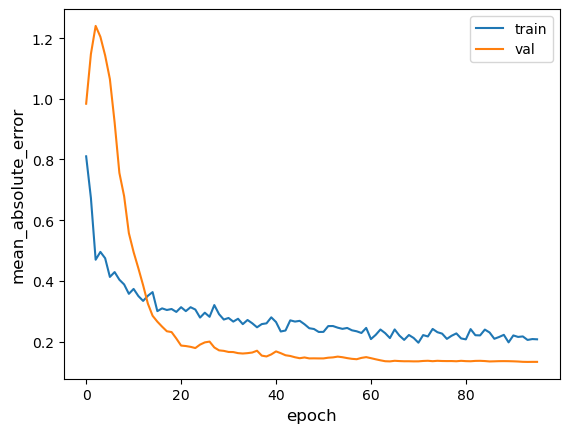

5/5 [==============================] - 0s 640us/step - loss: 0.0481 - mean_absolute_error: 0.1231
Test accuracy 0.12307856976985931
Test loss 0.0480603463947773


In [792]:
metric = 'mean_absolute_error'
plt.figure()
plt.plot(history.history[metric])
plt.plot(history.history["val_" + metric])
#plt.title("model " + metric + "\n Dense 32 + dense 16 + batch normalization + dropout 0.3")
plt.ylabel(metric, fontsize="large")
plt.xlabel("epoch", fontsize="large")
plt.legend(["train", "val"], loc="best")
plt.show()
plt.close()

#model = keras.models.load_model("best_model.h5")

test_loss, test_acc = multi_dense_model.evaluate(x_test, y_test)

print("Test accuracy", test_acc)
print("Test loss", test_loss)

In [793]:
y_test_pred = multi_dense_model.predict(x_test)

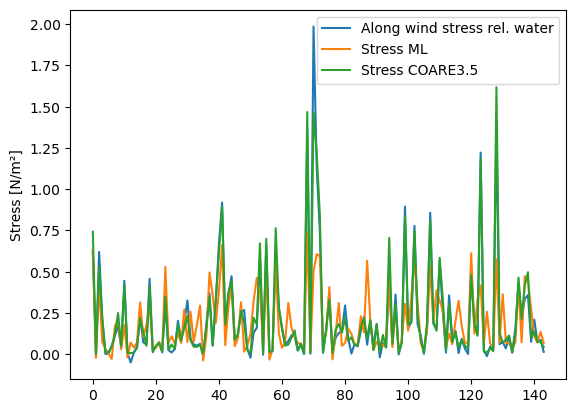

In [794]:
plt.plot(y_test.values, label='Along wind stress rel. water')
plt.plot(y_test_pred, label='Stress ML')
plt.plot(c_test.values, label='Stress COARE3.5')
plt.ylabel('Stress [N/m²]')
plt.legend()

In [795]:
rmse(y_test.values, y_test_pred)

0.36058170293231906

In [796]:
rmse(y_test.values, c_test.values)

0.06549902869322344

In [797]:
np.corrcoef(y_test.values, y_test_pred[:, 0])

array([[1.        , 0.72510552],
       [0.72510552, 1.        ]])

In [798]:
np.corrcoef(y_test.values, c_test.values)

array([[1.        , 0.97774818],
       [0.97774818, 1.        ]])

In [809]:
OUT_STEPS = 1
num_features = 1
batch_size =256
epochs=500

metric = 'mean_absolute_error'

In [810]:
try:
    del history
    del multi_dense_model
except:
    print('Variables do not exist')

In [811]:
multi_dense_model = tf.keras.Sequential([
    #tf.keras.layers.Dense(32, activation='relu'),
    #tf.keras.layers.BatchNormalization(),
    #tf.keras.layers.Dropout(rate=0.3),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dropout(rate=0.2),
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dropout(rate=0.1),
    tf.keras.layers.Dense(1)    
])

callbacks = [
    keras.callbacks.ModelCheckpoint(
        "best_model.h5", save_best_only=True, monitor="val_loss"
    ),
    keras.callbacks.ReduceLROnPlateau(
        monitor="val_loss", factor=0.5, patience=20, min_lr=0.0001
    ),
    keras.callbacks.EarlyStopping(monitor="val_loss", patience=50, verbose=1),
]

multi_dense_model.compile(
    optimizer=tf.optimizers.Adam(),
    loss=tf.losses.MeanSquaredError(),
    metrics=[tf.metrics.MeanAbsoluteError()],
)


history = multi_dense_model.fit(
    x_train,
    y_train,
    batch_size=batch_size,
    epochs=epochs,
    callbacks=callbacks,
    validation_split=0.3,
    verbose=1,
)

Epoch 1/500
2/2 [==============================] - 1s 110ms/step - loss: 0.9280 - mean_absolute_error: 0.6347 - val_loss: 1.1478 - val_mean_absolute_error: 0.9912
Epoch 2/500
2/2 [==============================] - 0s 23ms/step - loss: 0.7684 - mean_absolute_error: 0.5838 - val_loss: 0.7564 - val_mean_absolute_error: 0.7993
Epoch 3/500
2/2 [==============================] - 0s 22ms/step - loss: 0.7700 - mean_absolute_error: 0.5690 - val_loss: 0.5204 - val_mean_absolute_error: 0.6574
Epoch 4/500
2/2 [==============================] - 0s 21ms/step - loss: 0.6469 - mean_absolute_error: 0.5289 - val_loss: 0.4719 - val_mean_absolute_error: 0.6229
Epoch 5/500
2/2 [==============================] - 0s 22ms/step - loss: 0.7782 - mean_absolute_error: 0.5915 - val_loss: 0.4561 - val_mean_absolute_error: 0.6112
Epoch 6/500
2/2 [==============================] - 0s 22ms/step - loss: 0.5112 - mean_absolute_error: 0.5108 - val_loss: 0.4464 - val_mean_absolute_error: 0.6040
Epoch 7/500
2/2 [==========

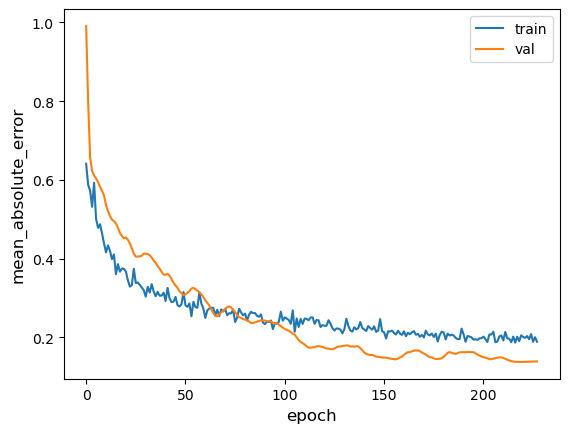

5/5 [==============================] - 0s 788us/step - loss: 0.0481 - mean_absolute_error: 0.1279
Test accuracy 0.12790551781654358
Test loss 0.0481320284307003


In [812]:
metric = 'mean_absolute_error'
plt.figure()
plt.plot(history.history[metric])
plt.plot(history.history["val_" + metric])
#plt.title("model " + metric + "\n Dense 32 + dense 16 + batch normalization + dropout 0.3")
plt.ylabel(metric, fontsize="large")
plt.xlabel("epoch", fontsize="large")
plt.legend(["train", "val"], loc="best")
plt.show()
plt.close()

#model = keras.models.load_model("best_model.h5")

test_loss, test_acc = multi_dense_model.evaluate(x_test, y_test)

print("Test accuracy", test_acc)
print("Test loss", test_loss)

In [813]:
y_test_pred = multi_dense_model.predict(x_test)

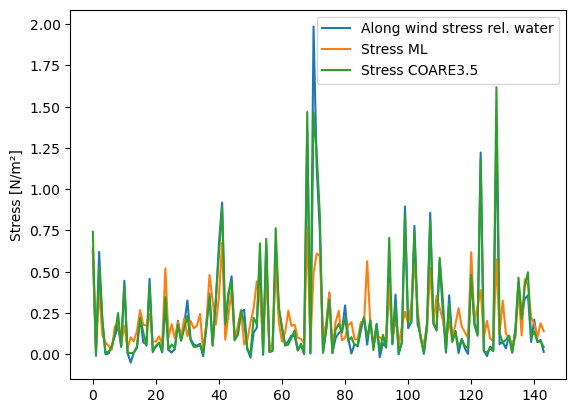

In [814]:
plt.plot(y_test.values, label='Along wind stress rel. water')
plt.plot(y_test_pred, label='Stress ML')
plt.plot(c_test.values, label='Stress COARE3.5')
plt.ylabel('Stress [N/m²]')
plt.legend()

In [815]:
rmse(y_test.values, y_test_pred)

0.3490265917097901

In [816]:
rmse(y_test.values, c_test.values)

0.06549902869322344

In [817]:
np.corrcoef(y_test.values, y_test_pred[:, 0])

array([[1.        , 0.74384063],
       [0.74384063, 1.        ]])

In [818]:
np.corrcoef(y_test.values, c_test.values)

array([[1.        , 0.97774818],
       [0.97774818, 1.        ]])

In [829]:
OUT_STEPS = 1
num_features = 1
batch_size =256
epochs=500

metric = 'mean_absolute_error'

In [830]:
try:
    del history
    del multi_dense_model
except:
    print('Variables do not exist')

In [831]:
multi_dense_model = tf.keras.Sequential([
    #tf.keras.layers.Dense(32, activation='relu'),
    #tf.keras.layers.BatchNormalization(),
    #tf.keras.layers.Dropout(rate=0.3),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dropout(rate=0.1),
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dropout(rate=0.1),
    tf.keras.layers.Dense(16, activation='relu'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dropout(rate=0.1),
    tf.keras.layers.Dense(1)    
])

callbacks = [
    keras.callbacks.ModelCheckpoint(
        "best_model.h5", save_best_only=True, monitor="val_loss"
    ),
    keras.callbacks.ReduceLROnPlateau(
        monitor="val_loss", factor=0.5, patience=20, min_lr=0.0001
    ),
    keras.callbacks.EarlyStopping(monitor="val_loss", patience=50, verbose=1),
]

multi_dense_model.compile(
    optimizer=tf.optimizers.Adam(),
    loss=tf.losses.MeanSquaredError(),
    metrics=[tf.metrics.MeanAbsoluteError()],
)


history = multi_dense_model.fit(
    x_train,
    y_train,
    batch_size=batch_size,
    epochs=epochs,
    callbacks=callbacks,
    validation_split=0.3,
    verbose=1,
)

Epoch 1/500
2/2 [==============================] - 1s 126ms/step - loss: 1.1076 - mean_absolute_error: 0.7173 - val_loss: 0.1685 - val_mean_absolute_error: 0.2282
Epoch 2/500
2/2 [==============================] - 0s 23ms/step - loss: 1.1882 - mean_absolute_error: 0.7341 - val_loss: 0.1782 - val_mean_absolute_error: 0.2533
Epoch 3/500
2/2 [==============================] - 0s 22ms/step - loss: 0.9390 - mean_absolute_error: 0.6286 - val_loss: 0.2112 - val_mean_absolute_error: 0.3215
Epoch 4/500
2/2 [==============================] - 0s 21ms/step - loss: 0.8193 - mean_absolute_error: 0.5750 - val_loss: 0.2320 - val_mean_absolute_error: 0.3575
Epoch 5/500
2/2 [==============================] - 0s 21ms/step - loss: 0.8084 - mean_absolute_error: 0.5979 - val_loss: 0.2197 - val_mean_absolute_error: 0.3399
Epoch 6/500
2/2 [==============================] - 0s 21ms/step - loss: 0.7487 - mean_absolute_error: 0.5901 - val_loss: 0.1947 - val_mean_absolute_error: 0.2983
Epoch 7/500
2/2 [==========

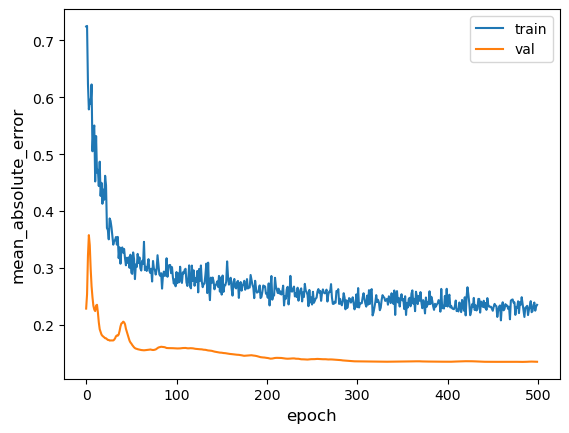

5/5 [==============================] - 0s 784us/step - loss: 0.0459 - mean_absolute_error: 0.1239
Test accuracy 0.12386870384216309
Test loss 0.04587024450302124


In [832]:
metric = 'mean_absolute_error'
plt.figure()
plt.plot(history.history[metric])
plt.plot(history.history["val_" + metric])
#plt.title("model " + metric + "\n Dense 32 + dense 16 + batch normalization + dropout 0.3")
plt.ylabel(metric, fontsize="large")
plt.xlabel("epoch", fontsize="large")
plt.legend(["train", "val"], loc="best")
plt.show()
plt.close()

#model = keras.models.load_model("best_model.h5")

test_loss, test_acc = multi_dense_model.evaluate(x_test, y_test)

print("Test accuracy", test_acc)
print("Test loss", test_loss)

In [833]:
y_test_pred = multi_dense_model.predict(x_test)

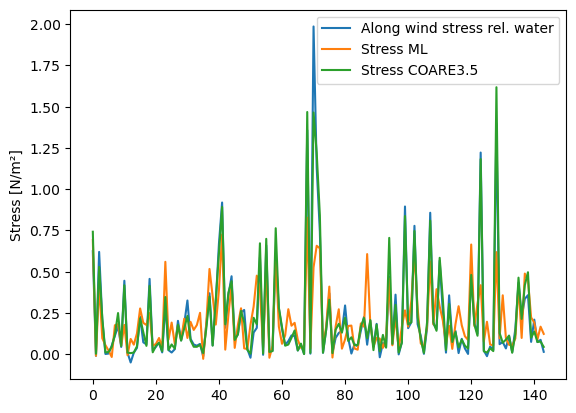

In [834]:
plt.plot(y_test.values, label='Along wind stress rel. water')
plt.plot(y_test_pred, label='Stress ML')
plt.plot(c_test.values, label='Stress COARE3.5')
plt.ylabel('Stress [N/m²]')
plt.legend()

In [835]:
rmse(y_test.values, y_test_pred)

0.3613186571267141

In [836]:
rmse(y_test.values, c_test.values)

0.06549902869322344

In [837]:
np.corrcoef(y_test.values, y_test_pred[:, 0])

array([[1.       , 0.7386796],
       [0.7386796, 1.       ]])

In [838]:
np.corrcoef(y_test.values, c_test.values)

array([[1.        , 0.97774818],
       [0.97774818, 1.        ]])

# predictors to use for the ML and validation: extraction


ml_predictors = [
    # # electromagnetic fluxes
    "IR",
    "Solar",
    # #---------- 
    # # specific humidities
    "Q10",
    "SSQ",
    "Qair",
    # #---------- 
    # # relative humidities
    "RH",
    # "RH10",
    # #---------- 
    # # air characteristics
    # "rhoair",
    # "P10",
    # "Pair",
    # #---------- 
    # # temperatures
    "SST",
    "T10",
    # "Tair",
    "Tsea",
    # "Tseasonic",
    # "Tsonic",
    # #---------- 
    # # waves
    # "Tm",
    "Tp",
    # "cp",
    "sigH",
    "sigHDir",
    # #---------- 
    # # wind characteristics
    # "U10e",
    "U10r",
    # "Ue",
    # "Ur",
    # "Wdir",
    "Wdirr",
    # #---------- 
    # # Obukhov scaling
    "moL",
    # "moLcbrt",
    # "moLclipped",
    # "moLinv",
    # #---------- 
    # # bulk fluxes
    "lhf",
    "shf",
    # # ----------
    # # composite variables
    # 'windspeed_over_wavecp',
    # 'mismatch_winddir_wavedir',
    # 'difference_specific_humidity',
    # # ----------
    # # others
    # "WTr",
    ## "Lv",
    # "stress",
]


# __________________________________________________

# s0_norm, inc, az

In [22]:
predictor_variables = ['s0_norm', 'inc', 'az']

In [23]:
x = df[predictor_variables]
x

s0_norm        inc          az
220  -8.473507  33.555539  437.892670
169  -8.274988  40.522289  439.776215
467  -7.194283  33.548429  437.894196
151  -7.900857  40.723102  280.224854
695  -5.525506  40.718319  280.225769
..         ...        ...         ...
664  -8.598221  40.527548  440.174164
293  -9.489844  37.364239  439.766144
235 -10.061389  33.545377  437.893524
596  -9.238397  25.548476  436.039337
607  -9.680034  25.547907  436.038910

[704 rows x 3 columns]

In [24]:
y = -  df['UWr'] * df['rhoair']
y

220    0.434718
169    0.270790
467    0.492172
151    0.332047
695    0.518476
         ...   
664    0.074651
293    0.209381
235    0.073328
596    0.086927
607    0.014381
Length: 704, dtype: float64

NaNs: 

2018-12-04 11:10:59.993607         NaN

2018-12-16 23:11:59.981755         NaN

In [25]:
x_train = x[:split_idx]
x_test = x[split_idx:]

In [26]:
y_train = y[:split_idx]
y_test = y[split_idx:]

# ML setup

In [27]:
OUT_STEPS = 1
num_features = 1
batch_size =32
epochs=500

metric = 'mean_absolute_error'

In [28]:
try:
    del history
    del multi_dense_model
except:
    print('Variables do not exist')

Variables do not exist


# First experiment - Linear regression

In [29]:
multi_dense_model = tf.keras.Sequential([
    #tf.keras.layers.Dense(32, activation='relu'),
    #tf.keras.layers.BatchNormalization(),
    #tf.keras.layers.Dropout(rate=0.3),
    #tf.keras.layers.Dense(16, activation='relu'),
    #tf.keras.layers.BatchNormalization(),
    #tf.keras.layers.Dropout(rate=0.4),
    tf.keras.layers.Dense(1)    
])

callbacks = [
    keras.callbacks.ModelCheckpoint(
        "best_model.h5", save_best_only=True, monitor="val_loss"
    ),
    keras.callbacks.ReduceLROnPlateau(
        monitor="val_loss", factor=0.5, patience=20, min_lr=0.0001
    ),
    keras.callbacks.EarlyStopping(monitor="val_loss", patience=50, verbose=1),
]

multi_dense_model.compile(
    optimizer=tf.optimizers.Adam(),
    loss=tf.losses.MeanSquaredError(),
    metrics=[tf.metrics.MeanAbsoluteError()],
)


history = multi_dense_model.fit(
    x_train,
    y_train,
    batch_size=batch_size,
    epochs=epochs,
    callbacks=callbacks,
    validation_split=0.3,
    verbose=1,
)

2023-02-09 11:04:45.438162: I tensorflow/compiler/jit/xla_cpu_device.cc:41] Not creating XLA devices, tf_xla_enable_xla_devices not set
2023-02-09 11:04:45.439139: W tensorflow/stream_executor/platform/default/dso_loader.cc:60] Could not load dynamic library 'libcuda.so.1'; dlerror: libcuda.so.1: cannot open shared object file: No such file or directory
2023-02-09 11:04:45.439168: W tensorflow/stream_executor/cuda/cuda_driver.cc:326] failed call to cuInit: UNKNOWN ERROR (303)
2023-02-09 11:04:45.439189: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:156] kernel driver does not appear to be running on this host (c6525-5l5jvp3-bn-compute): /proc/driver/nvidia/version does not exist
2023-02-09 11:04:45.439528: I tensorflow/core/platform/cpu_feature_guard.cc:142] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE4.1 SSE4.2 AVX AVX2 FMA
To enable them in other operations, 

Epoch 1/500
13/13 [==============================] - 1s 61ms/step - loss: 77558.9325 - mean_absolute_error: 273.5374 - val_loss: 70341.6562 - val_mean_absolute_error: 260.0925
Epoch 2/500
13/13 [==============================] - 0s 2ms/step - loss: 74508.2154 - mean_absolute_error: 268.0152 - val_loss: 67545.7266 - val_mean_absolute_error: 254.8610
Epoch 3/500
13/13 [==============================] - 0s 2ms/step - loss: 70247.2640 - mean_absolute_error: 260.1703 - val_loss: 64825.5547 - val_mean_absolute_error: 249.6663
Epoch 4/500
13/13 [==============================] - 0s 2ms/step - loss: 69378.0943 - mean_absolute_error: 258.7507 - val_loss: 62174.4648 - val_mean_absolute_error: 244.4976
Epoch 5/500
13/13 [==============================] - 0s 2ms/step - loss: 66503.6356 - mean_absolute_error: 253.3023 - val_loss: 59634.3438 - val_mean_absolute_error: 239.4407
Epoch 6/500
13/13 [==============================] - 0s 2ms/step - loss: 64084.2578 - mean_absolute_error: 248.6703 - val_lo

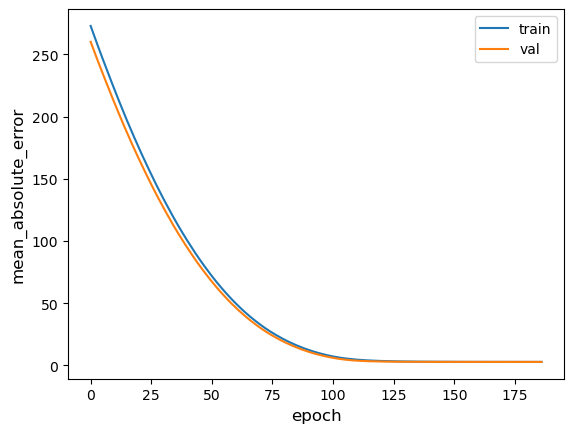

5/5 [==============================] - 0s 624us/step - loss: 10.4527 - mean_absolute_error: 2.5790
Test accuracy 2.5790152549743652
Test loss 10.452702522277832


In [30]:
metric = 'mean_absolute_error'
plt.figure()
plt.plot(history.history[metric])
plt.plot(history.history["val_" + metric])
#plt.title("model " + metric + "\n Dense 32 + dense 16 + batch normalization + dropout 0.3")
plt.ylabel(metric, fontsize="large")
plt.xlabel("epoch", fontsize="large")
plt.legend(["train", "val"], loc="best")
plt.show()
plt.close()

#model = keras.models.load_model("best_model.h5")

test_loss, test_acc = multi_dense_model.evaluate(x_test, y_test)

print("Test accuracy", test_acc)
print("Test loss", test_loss)

In [31]:
y_test_pred = multi_dense_model.predict(x_test)

In [32]:
np.mean(y_test)

0.21862490743242802

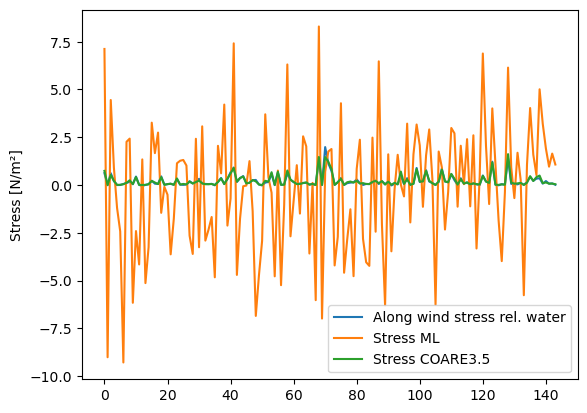

In [33]:
plt.plot(y_test.values, label='Along wind stress rel. water')
plt.plot(y_test_pred, label='Stress ML')
plt.plot(c_test.values, label='Stress COARE3.5')
plt.ylabel('Stress [N/m²]')
plt.legend()

In [34]:
rmse(y_test.values, y_test_pred)

3.3743133203018365

In [35]:
rmse(y_test.values, c_test)

0.06549902869322344

In [36]:
np.corrcoef(y_test.values, y_test_pred[:, 0])

array([[1.        , 0.45144987],
       [0.45144987, 1.        ]])

In [37]:
np.corrcoef(y_test.values, c_test.values)

array([[1.        , 0.97774818],
       [0.97774818, 1.        ]])

# Other experiments

In [90]:
OUT_STEPS = 1
num_features = 1
batch_size =16
epochs=500

metric = 'mean_absolute_error'

In [91]:
try:
    del history
    del multi_dense_model
except:
    print('Variables do not exist')

In [92]:
multi_dense_model = tf.keras.Sequential([
    #tf.keras.layers.Dense(32, activation='relu'),
    #tf.keras.layers.BatchNormalization(),
    #tf.keras.layers.Dropout(rate=0.3),
    tf.keras.layers.Dense(16, activation='relu'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dropout(rate=0.1),
    tf.keras.layers.Dense(1)    
])

callbacks = [
    keras.callbacks.ModelCheckpoint(
        "best_model.h5", save_best_only=True, monitor="val_loss"
    ),
    keras.callbacks.ReduceLROnPlateau(
        monitor="val_loss", factor=0.5, patience=20, min_lr=0.0001
    ),
    keras.callbacks.EarlyStopping(monitor="val_loss", patience=50, verbose=1),
]

multi_dense_model.compile(
    optimizer=tf.optimizers.Adam(),
    loss=tf.losses.MeanSquaredError(),
    metrics=[tf.metrics.MeanAbsoluteError()],
)


history = multi_dense_model.fit(
    x_train,
    y_train,
    batch_size=batch_size,
    epochs=epochs,
    callbacks=callbacks,
    validation_split=0.3,
    verbose=1,
)

Epoch 1/500
25/25 [==============================] - 0s 7ms/step - loss: 0.9236 - mean_absolute_error: 0.7628 - val_loss: 20.8187 - val_mean_absolute_error: 4.4183
Epoch 2/500
25/25 [==============================] - 0s 2ms/step - loss: 0.4514 - mean_absolute_error: 0.5752 - val_loss: 1.0304 - val_mean_absolute_error: 0.9050
Epoch 3/500
25/25 [==============================] - 0s 2ms/step - loss: 0.2445 - mean_absolute_error: 0.3841 - val_loss: 1.0426 - val_mean_absolute_error: 0.9690
Epoch 4/500
25/25 [==============================] - 0s 2ms/step - loss: 0.1875 - mean_absolute_error: 0.3072 - val_loss: 0.7789 - val_mean_absolute_error: 0.8035
Epoch 5/500
25/25 [==============================] - 0s 2ms/step - loss: 0.1342 - mean_absolute_error: 0.2767 - val_loss: 0.2534 - val_mean_absolute_error: 0.3701
Epoch 6/500
25/25 [==============================] - 0s 2ms/step - loss: 0.1231 - mean_absolute_error: 0.2580 - val_loss: 0.1351 - val_mean_absolute_error: 0.2255
Epoch 7/500
25/25 [==

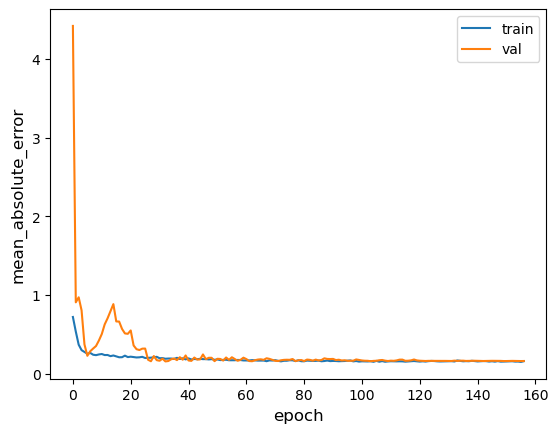

5/5 [==============================] - 0s 645us/step - loss: 0.0579 - mean_absolute_error: 0.1569
Test accuracy 0.15690560638904572
Test loss 0.05791958048939705


In [93]:
metric = 'mean_absolute_error'
plt.figure()
plt.plot(history.history[metric])
plt.plot(history.history["val_" + metric])
#plt.title("model " + metric + "\n Dense 32 + dense 16 + batch normalization + dropout 0.3")
plt.ylabel(metric, fontsize="large")
plt.xlabel("epoch", fontsize="large")
plt.legend(["train", "val"], loc="best")
plt.show()
plt.close()

#model = keras.models.load_model("best_model.h5")

test_loss, test_acc = multi_dense_model.evaluate(x_test, y_test)

print("Test accuracy", test_acc)
print("Test loss", test_loss)

In [94]:
y_test_pred = multi_dense_model.predict(x_test)

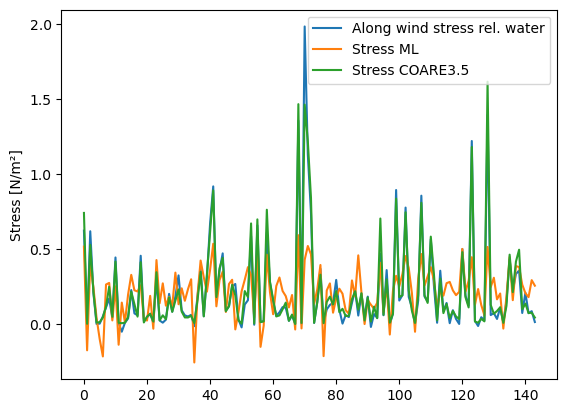

In [95]:
plt.plot(y_test.values, label='Along wind stress rel. water')
plt.plot(y_test_pred, label='Stress ML')
plt.plot(c_test.values, label='Stress COARE3.5')
plt.ylabel('Stress [N/m²]')
plt.legend()

In [96]:
rmse(y_test.values, y_test_pred)

0.3507666075000227

In [97]:
rmse(y_test.values, c_test.values)

0.06549902869322344

In [98]:
np.corrcoef(y_test.values, y_test_pred[:, 0])

array([[1.        , 0.64172417],
       [0.64172417, 1.        ]])

In [99]:
np.corrcoef(y_test.values, c_test.values)

array([[1.        , 0.97774818],
       [0.97774818, 1.        ]])

In [80]:
OUT_STEPS = 1
num_features = 1
batch_size =16
epochs=500

metric = 'mean_absolute_error'

In [81]:
try:
    del history
    del multi_dense_model
except:
    print('Variables do not exist')

In [82]:
multi_dense_model = tf.keras.Sequential([
    #tf.keras.layers.Dense(32, activation='relu'),
    #tf.keras.layers.BatchNormalization(),
    #tf.keras.layers.Dropout(rate=0.3),
    tf.keras.layers.Dense(16, activation='relu'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dropout(rate=0.1),
    tf.keras.layers.Dense(8, activation='relu'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dropout(rate=0.1),
    tf.keras.layers.Dense(1)    
])

callbacks = [
    keras.callbacks.ModelCheckpoint(
        "best_model.h5", save_best_only=True, monitor="val_loss"
    ),
    keras.callbacks.ReduceLROnPlateau(
        monitor="val_loss", factor=0.5, patience=20, min_lr=0.0001
    ),
    keras.callbacks.EarlyStopping(monitor="val_loss", patience=50, verbose=1),
]

multi_dense_model.compile(
    optimizer=tf.optimizers.Adam(),
    loss=tf.losses.MeanSquaredError(),
    metrics=[tf.metrics.MeanAbsoluteError()],
)


history = multi_dense_model.fit(
    x_train,
    y_train,
    batch_size=batch_size,
    epochs=epochs,
    callbacks=callbacks,
    validation_split=0.3,
    verbose=1,
)

Epoch 1/500
25/25 [==============================] - 1s 6ms/step - loss: 3.3676 - mean_absolute_error: 1.5903 - val_loss: 17.6579 - val_mean_absolute_error: 4.1440
Epoch 2/500
25/25 [==============================] - 0s 2ms/step - loss: 1.7739 - mean_absolute_error: 1.0464 - val_loss: 16.0101 - val_mean_absolute_error: 3.8720
Epoch 3/500
25/25 [==============================] - 0s 2ms/step - loss: 1.0551 - mean_absolute_error: 0.8197 - val_loss: 8.1679 - val_mean_absolute_error: 2.6609
Epoch 4/500
25/25 [==============================] - 0s 2ms/step - loss: 0.7760 - mean_absolute_error: 0.6483 - val_loss: 3.9544 - val_mean_absolute_error: 1.7031
Epoch 5/500
25/25 [==============================] - 0s 2ms/step - loss: 0.5822 - mean_absolute_error: 0.5595 - val_loss: 2.0630 - val_mean_absolute_error: 1.1291
Epoch 6/500
25/25 [==============================] - 0s 2ms/step - loss: 0.5915 - mean_absolute_error: 0.5484 - val_loss: 1.5139 - val_mean_absolute_error: 0.9177
Epoch 7/500
25/25 [=

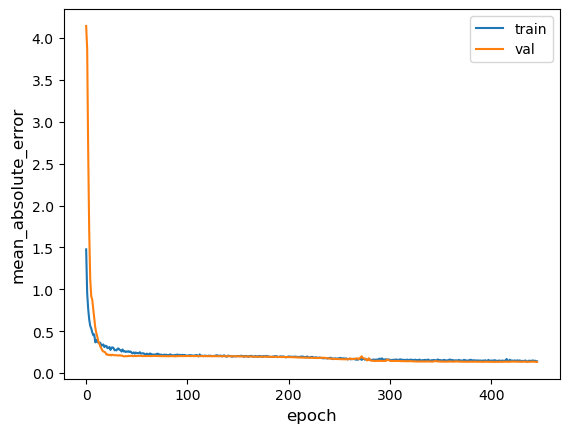

5/5 [==============================] - 0s 772us/step - loss: 0.0461 - mean_absolute_error: 0.1313
Test accuracy 0.13127939403057098
Test loss 0.046146590262651443


In [83]:
metric = 'mean_absolute_error'
plt.figure()
plt.plot(history.history[metric])
plt.plot(history.history["val_" + metric])
#plt.title("model " + metric + "\n Dense 32 + dense 16 + batch normalization + dropout 0.3")
plt.ylabel(metric, fontsize="large")
plt.xlabel("epoch", fontsize="large")
plt.legend(["train", "val"], loc="best")
plt.show()
plt.close()

#model = keras.models.load_model("best_model.h5")

test_loss, test_acc = multi_dense_model.evaluate(x_test, y_test)

print("Test accuracy", test_acc)
print("Test loss", test_loss)

In [84]:
y_test_pred = multi_dense_model.predict(x_test)

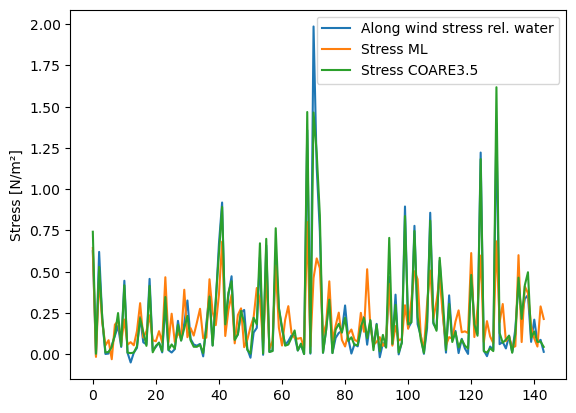

In [85]:
plt.plot(y_test.values, label='Along wind stress rel. water')
plt.plot(y_test_pred, label='Stress ML')
plt.plot(c_test.values, label='Stress COARE3.5')
plt.ylabel('Stress [N/m²]')
plt.legend()

In [86]:
rmse(y_test.values, y_test_pred)

0.3542506822747092

In [87]:
rmse(y_test.values, c_test.values)

0.06549902869322344

In [88]:
np.corrcoef(y_test.values, y_test_pred[:, 0])

array([[1.        , 0.74900028],
       [0.74900028, 1.        ]])

In [89]:
np.corrcoef(y_test.values, c_test.values)

array([[1.        , 0.97774818],
       [0.97774818, 1.        ]])

In [38]:
OUT_STEPS = 1
num_features = 1
batch_size =256
epochs=500

metric = 'mean_absolute_error'

In [39]:
try:
    del history
    del multi_dense_model
except:
    print('Variables do not exist')

In [40]:
multi_dense_model = tf.keras.Sequential([
    #tf.keras.layers.Dense(32, activation='relu'),
    #tf.keras.layers.BatchNormalization(),
    #tf.keras.layers.Dropout(rate=0.3),
    tf.keras.layers.Dense(256, activation='relu'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dropout(rate=0.1),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dropout(rate=0.1),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.BatchNormalization(),
    #tf.keras.layers.Dropout(rate=0.1),
    #tf.keras.layers.Dense(32, activation='relu'),
    #tf.keras.layers.BatchNormalization(),
    #tf.keras.layers.Dropout(rate=0.1),
    tf.keras.layers.Dense(1)    
])

callbacks = [
    keras.callbacks.ModelCheckpoint(
        "best_model.h5", save_best_only=True, monitor="val_loss"
    ),
    keras.callbacks.ReduceLROnPlateau(
        monitor="val_loss", factor=0.5, patience=20, min_lr=0.0001
    ),
    keras.callbacks.EarlyStopping(monitor="val_loss", patience=50, verbose=1),
]

multi_dense_model.compile(
    optimizer=tf.optimizers.Adam(),
    loss=tf.losses.MeanSquaredError(),
    metrics=[tf.metrics.MeanAbsoluteError()],
)


history = multi_dense_model.fit(
    x_train,
    y_train,
    batch_size=batch_size,
    epochs=epochs,
    callbacks=callbacks,
    validation_split=0.3,
    verbose=1,
)

Epoch 1/500
2/2 [==============================] - 1s 131ms/step - loss: 1.7473 - mean_absolute_error: 1.0434 - val_loss: 82.2526 - val_mean_absolute_error: 8.5780
Epoch 2/500
2/2 [==============================] - 0s 26ms/step - loss: 0.8994 - mean_absolute_error: 0.7471 - val_loss: 75.1488 - val_mean_absolute_error: 8.2832
Epoch 3/500
2/2 [==============================] - 0s 26ms/step - loss: 0.7320 - mean_absolute_error: 0.6715 - val_loss: 39.2549 - val_mean_absolute_error: 5.9708
Epoch 4/500
2/2 [==============================] - 0s 25ms/step - loss: 0.6950 - mean_absolute_error: 0.6558 - val_loss: 37.0926 - val_mean_absolute_error: 5.8160
Epoch 5/500
2/2 [==============================] - 0s 25ms/step - loss: 0.4641 - mean_absolute_error: 0.5346 - val_loss: 45.2344 - val_mean_absolute_error: 6.4542
Epoch 6/500
2/2 [==============================] - 0s 25ms/step - loss: 0.3101 - mean_absolute_error: 0.4375 - val_loss: 46.3351 - val_mean_absolute_error: 6.5381
Epoch 7/500
2/2 [====

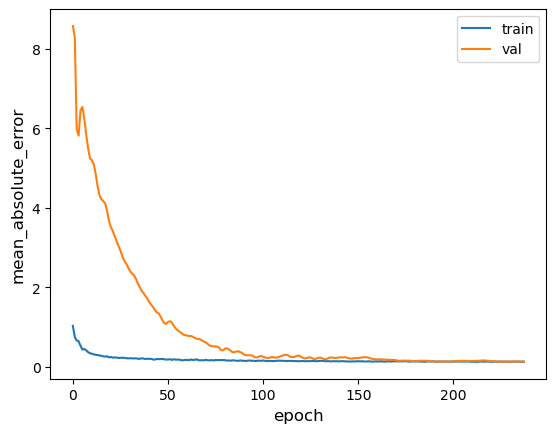

5/5 [==============================] - 0s 817us/step - loss: 0.0430 - mean_absolute_error: 0.1297
Test accuracy 0.12966519594192505
Test loss 0.042974215000867844


In [41]:
metric = 'mean_absolute_error'
plt.figure()
plt.plot(history.history[metric])
plt.plot(history.history["val_" + metric])
#plt.title("model " + metric + "\n Dense 32 + dense 16 + batch normalization + dropout 0.3")
plt.ylabel(metric, fontsize="large")
plt.xlabel("epoch", fontsize="large")
plt.legend(["train", "val"], loc="best")
plt.show()
plt.close()

#model = keras.models.load_model("best_model.h5")

test_loss, test_acc = multi_dense_model.evaluate(x_test, y_test)

print("Test accuracy", test_acc)
print("Test loss", test_loss)

In [42]:
y_test_pred = multi_dense_model.predict(x_test)

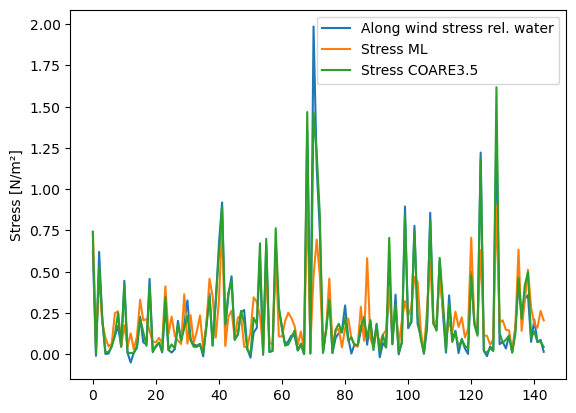

In [43]:
plt.plot(y_test.values, label='Along wind stress rel. water')
plt.plot(y_test_pred, label='Stress ML')
plt.plot(c_test.values, label='Stress COARE3.5')
plt.ylabel('Stress [N/m²]')
plt.legend()

In [44]:
rmse(y_test.values, y_test_pred)

0.3623504755660153

In [45]:
rmse(y_test.values, c_test.values)

0.06549902869322344

In [46]:
np.corrcoef(y_test.values, y_test_pred[:, 0])

array([[1.        , 0.76054725],
       [0.76054725, 1.        ]])

In [47]:
np.corrcoef(y_test.values, c_test.values)

array([[1.        , 0.97774818],
       [0.97774818, 1.        ]])

# __________________________________________________

# s0, s0_max, S0_min, inc, az

## s0 is the average

In [38]:
predictor_variables = ['s0', 's0_max', 's0_min', 'inc', 'az']

In [39]:
x = df[predictor_variables]
x

s0     s0_max     s0_min        inc          az
220 -11.348112  -9.048957 -13.505619  33.555539  437.892670
169 -16.357272 -14.982781 -17.512438  40.522289  439.776215
467  -8.784147  -7.503172 -10.759739  33.548429  437.894196
151 -15.764841 -11.969157 -22.702945  40.723102  280.224854
695 -11.010427  -7.621449 -14.643066  40.718319  280.225769
..         ...        ...        ...        ...         ...
664 -17.007820 -14.248742 -19.819621  40.527548  440.174164
293 -16.336338 -11.070109 -23.010149  37.364239  439.766144
235 -14.515991 -13.440401 -16.211117  33.545377  437.893524
596  -6.664412  -5.874245  -7.551517  25.548476  436.039337
607  -7.547244  -6.678483  -9.142586  25.547907  436.038910

[704 rows x 5 columns]

In [40]:
y = -  df['UWr'] * df['rhoair']
y

220    0.434718
169    0.270790
467    0.492172
151    0.332047
695    0.518476
         ...   
664    0.074651
293    0.209381
235    0.073328
596    0.086927
607    0.014381
Length: 704, dtype: float64

NaNs: 

2018-12-04 11:10:59.993607         NaN

2018-12-16 23:11:59.981755         NaN

In [41]:
x_train = x[:split_idx]
x_test = x[split_idx:]

In [42]:
y_train = y[:split_idx]
y_test = y[split_idx:]

# ML setup

In [43]:
OUT_STEPS = 1
num_features = 1
batch_size =32
epochs=500

metric = 'mean_absolute_error'

In [44]:
try:
    del history
    del multi_dense_model
except:
    print('Variables do not exist')

# First experiment - Linear regression

In [45]:
multi_dense_model = tf.keras.Sequential([
    #tf.keras.layers.Dense(32, activation='relu'),
    #tf.keras.layers.BatchNormalization(),
    #tf.keras.layers.Dropout(rate=0.3),
    #tf.keras.layers.Dense(16, activation='relu'),
    #tf.keras.layers.BatchNormalization(),
    #tf.keras.layers.Dropout(rate=0.4),
    tf.keras.layers.Dense(1)    
])

callbacks = [
    keras.callbacks.ModelCheckpoint(
        "best_model.h5", save_best_only=True, monitor="val_loss"
    ),
    keras.callbacks.ReduceLROnPlateau(
        monitor="val_loss", factor=0.5, patience=20, min_lr=0.0001
    ),
    keras.callbacks.EarlyStopping(monitor="val_loss", patience=50, verbose=1),
]

multi_dense_model.compile(
    optimizer=tf.optimizers.Adam(),
    loss=tf.losses.MeanSquaredError(),
    metrics=[tf.metrics.MeanAbsoluteError()],
)


history = multi_dense_model.fit(
    x_train,
    y_train,
    batch_size=batch_size,
    epochs=epochs,
    callbacks=callbacks,
    validation_split=0.3,
    verbose=1,
)

Epoch 1/500
13/13 [==============================] - 0s 8ms/step - loss: 64029.5876 - mean_absolute_error: 247.1708 - val_loss: 57844.1328 - val_mean_absolute_error: 234.3397
Epoch 2/500
13/13 [==============================] - 0s 2ms/step - loss: 61592.5848 - mean_absolute_error: 242.4478 - val_loss: 55102.5312 - val_mean_absolute_error: 228.6345
Epoch 3/500
13/13 [==============================] - 0s 2ms/step - loss: 59680.6775 - mean_absolute_error: 238.7722 - val_loss: 52457.2031 - val_mean_absolute_error: 222.9921
Epoch 4/500
13/13 [==============================] - 0s 2ms/step - loss: 55046.3677 - mean_absolute_error: 228.9084 - val_loss: 49930.0312 - val_mean_absolute_error: 217.4663
Epoch 5/500
13/13 [==============================] - 0s 2ms/step - loss: 52698.7584 - mean_absolute_error: 223.9338 - val_loss: 47474.8867 - val_mean_absolute_error: 211.9615
Epoch 6/500
13/13 [==============================] - 0s 2ms/step - loss: 49008.6970 - mean_absolute_error: 215.7076 - val_los

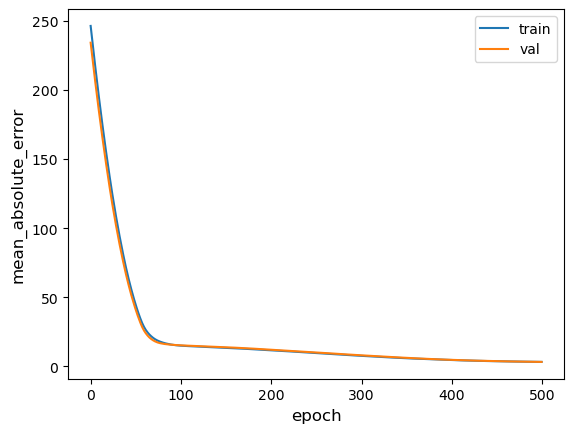

5/5 [==============================] - 0s 592us/step - loss: 15.0216 - mean_absolute_error: 3.0292
Test accuracy 3.0292367935180664
Test loss 15.021625518798828


In [46]:
metric = 'mean_absolute_error'
plt.figure()
plt.plot(history.history[metric])
plt.plot(history.history["val_" + metric])
#plt.title("model " + metric + "\n Dense 32 + dense 16 + batch normalization + dropout 0.3")
plt.ylabel(metric, fontsize="large")
plt.xlabel("epoch", fontsize="large")
plt.legend(["train", "val"], loc="best")
plt.show()
plt.close()

#model = keras.models.load_model("best_model.h5")

test_loss, test_acc = multi_dense_model.evaluate(x_test, y_test)

print("Test accuracy", test_acc)
print("Test loss", test_loss)

In [47]:
y_test_pred = multi_dense_model.predict(x_test)

In [48]:
np.mean(y_test)

0.21862490743242802

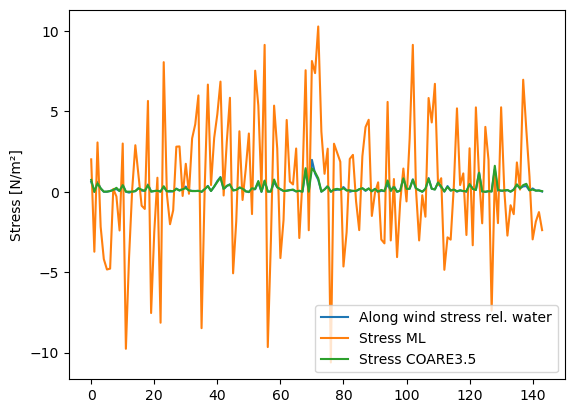

In [49]:
plt.plot(y_test.values, label='Along wind stress rel. water')
plt.plot(y_test_pred, label='Stress ML')
plt.plot(c_test.values, label='Stress COARE3.5')
plt.ylabel('Stress [N/m²]')
plt.legend()

In [50]:
rmse(y_test.values, y_test_pred)

4.034949773609295

In [51]:
rmse(y_test.values, c_test)

0.06549902869322344

In [52]:
np.corrcoef(y_test.values, y_test_pred[:, 0])

array([[1.        , 0.50673985],
       [0.50673985, 1.        ]])

In [53]:
np.corrcoef(y_test.values, c_test.values)

array([[1.        , 0.97774818],
       [0.97774818, 1.        ]])

# Other experiments

In [54]:
OUT_STEPS = 1
num_features = 1
batch_size =16
epochs=500

metric = 'mean_absolute_error'

In [55]:
try:
    del history
    del multi_dense_model
except:
    print('Variables do not exist')

In [56]:
multi_dense_model = tf.keras.Sequential([
    #tf.keras.layers.Dense(32, activation='relu'),
    #tf.keras.layers.BatchNormalization(),
    #tf.keras.layers.Dropout(rate=0.3),
    tf.keras.layers.Dense(16, activation='relu'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dropout(rate=0.1),
    tf.keras.layers.Dense(1)    
])

callbacks = [
    keras.callbacks.ModelCheckpoint(
        "best_model.h5", save_best_only=True, monitor="val_loss"
    ),
    keras.callbacks.ReduceLROnPlateau(
        monitor="val_loss", factor=0.5, patience=20, min_lr=0.0001
    ),
    keras.callbacks.EarlyStopping(monitor="val_loss", patience=50, verbose=1),
]

multi_dense_model.compile(
    optimizer=tf.optimizers.Adam(),
    loss=tf.losses.MeanSquaredError(),
    metrics=[tf.metrics.MeanAbsoluteError()],
)


history = multi_dense_model.fit(
    x_train,
    y_train,
    batch_size=batch_size,
    epochs=epochs,
    callbacks=callbacks,
    validation_split=0.3,
    verbose=1,
)

Epoch 1/500
25/25 [==============================] - 0s 5ms/step - loss: 0.8871 - mean_absolute_error: 0.7453 - val_loss: 7.4674 - val_mean_absolute_error: 2.5571
Epoch 2/500
25/25 [==============================] - 0s 2ms/step - loss: 0.5286 - mean_absolute_error: 0.5587 - val_loss: 0.4646 - val_mean_absolute_error: 0.5621
Epoch 3/500
25/25 [==============================] - 0s 2ms/step - loss: 0.3643 - mean_absolute_error: 0.4610 - val_loss: 0.3345 - val_mean_absolute_error: 0.4095
Epoch 4/500
25/25 [==============================] - 0s 2ms/step - loss: 0.2585 - mean_absolute_error: 0.3770 - val_loss: 0.3908 - val_mean_absolute_error: 0.5181
Epoch 5/500
25/25 [==============================] - 0s 2ms/step - loss: 0.2087 - mean_absolute_error: 0.3412 - val_loss: 0.3266 - val_mean_absolute_error: 0.4682
Epoch 6/500
25/25 [==============================] - 0s 2ms/step - loss: 0.2497 - mean_absolute_error: 0.3662 - val_loss: 0.3189 - val_mean_absolute_error: 0.4608
Epoch 7/500
25/25 [===

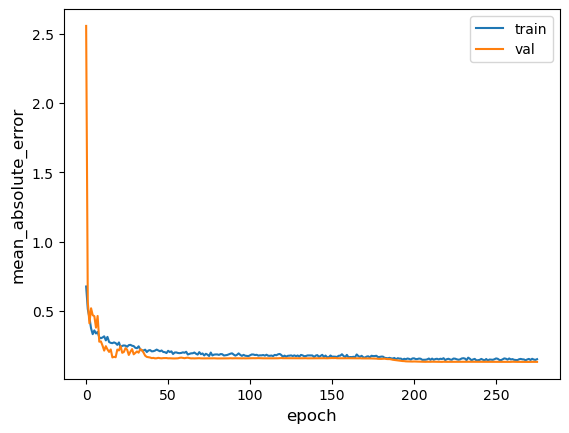

5/5 [==============================] - 0s 582us/step - loss: 0.0424 - mean_absolute_error: 0.1256
Test accuracy 0.12562894821166992
Test loss 0.042364466935396194


In [57]:
metric = 'mean_absolute_error'
plt.figure()
plt.plot(history.history[metric])
plt.plot(history.history["val_" + metric])
#plt.title("model " + metric + "\n Dense 32 + dense 16 + batch normalization + dropout 0.3")
plt.ylabel(metric, fontsize="large")
plt.xlabel("epoch", fontsize="large")
plt.legend(["train", "val"], loc="best")
plt.show()
plt.close()

#model = keras.models.load_model("best_model.h5")

test_loss, test_acc = multi_dense_model.evaluate(x_test, y_test)

print("Test accuracy", test_acc)
print("Test loss", test_loss)

In [58]:
y_test_pred = multi_dense_model.predict(x_test)

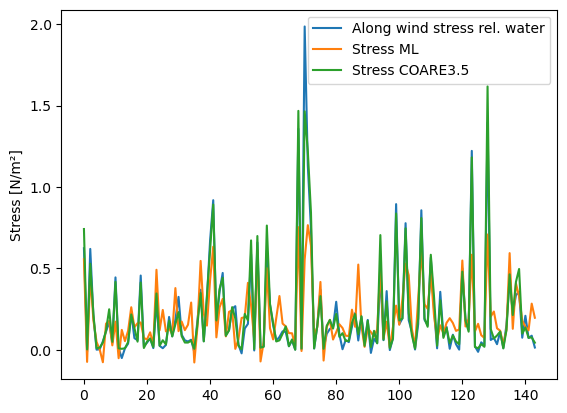

In [59]:
plt.plot(y_test.values, label='Along wind stress rel. water')
plt.plot(y_test_pred, label='Stress ML')
plt.plot(c_test.values, label='Stress COARE3.5')
plt.ylabel('Stress [N/m²]')
plt.legend()

In [60]:
rmse(y_test.values, y_test_pred)

0.35992593693148495

In [61]:
rmse(y_test.values, c_test.values)

0.06549902869322344

In [62]:
np.corrcoef(y_test.values, y_test_pred[:, 0])

array([[1.        , 0.77185186],
       [0.77185186, 1.        ]])

In [63]:
np.corrcoef(y_test.values, c_test.values)

array([[1.        , 0.97774818],
       [0.97774818, 1.        ]])

In [64]:
OUT_STEPS = 1
num_features = 1
batch_size =16
epochs=500

metric = 'mean_absolute_error'

In [65]:
try:
    del history
    del multi_dense_model
except:
    print('Variables do not exist')

In [66]:
multi_dense_model = tf.keras.Sequential([
    #tf.keras.layers.Dense(32, activation='relu'),
    #tf.keras.layers.BatchNormalization(),
    #tf.keras.layers.Dropout(rate=0.3),
    tf.keras.layers.Dense(16, activation='relu'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dropout(rate=0.1),
    tf.keras.layers.Dense(8, activation='relu'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dropout(rate=0.1),
    tf.keras.layers.Dense(1)    
])

callbacks = [
    keras.callbacks.ModelCheckpoint(
        "best_model.h5", save_best_only=True, monitor="val_loss"
    ),
    keras.callbacks.ReduceLROnPlateau(
        monitor="val_loss", factor=0.5, patience=20, min_lr=0.0001
    ),
    keras.callbacks.EarlyStopping(monitor="val_loss", patience=50, verbose=1),
]

multi_dense_model.compile(
    optimizer=tf.optimizers.Adam(),
    loss=tf.losses.MeanSquaredError(),
    metrics=[tf.metrics.MeanAbsoluteError()],
)


history = multi_dense_model.fit(
    x_train,
    y_train,
    batch_size=batch_size,
    epochs=epochs,
    callbacks=callbacks,
    validation_split=0.3,
    verbose=1,
)

Epoch 1/500
25/25 [==============================] - 1s 6ms/step - loss: 1.5471 - mean_absolute_error: 0.9882 - val_loss: 108.0538 - val_mean_absolute_error: 9.8388
Epoch 2/500
25/25 [==============================] - 0s 2ms/step - loss: 0.7251 - mean_absolute_error: 0.6507 - val_loss: 35.8072 - val_mean_absolute_error: 5.4701
Epoch 3/500
25/25 [==============================] - 0s 2ms/step - loss: 0.4953 - mean_absolute_error: 0.5380 - val_loss: 15.6097 - val_mean_absolute_error: 3.3567
Epoch 4/500
25/25 [==============================] - 0s 2ms/step - loss: 0.3755 - mean_absolute_error: 0.4709 - val_loss: 8.2821 - val_mean_absolute_error: 2.1511
Epoch 5/500
25/25 [==============================] - 0s 2ms/step - loss: 0.3766 - mean_absolute_error: 0.4963 - val_loss: 4.5042 - val_mean_absolute_error: 1.6904
Epoch 6/500
25/25 [==============================] - 0s 2ms/step - loss: 0.3100 - mean_absolute_error: 0.4103 - val_loss: 2.6434 - val_mean_absolute_error: 1.3700
Epoch 7/500
25/25 

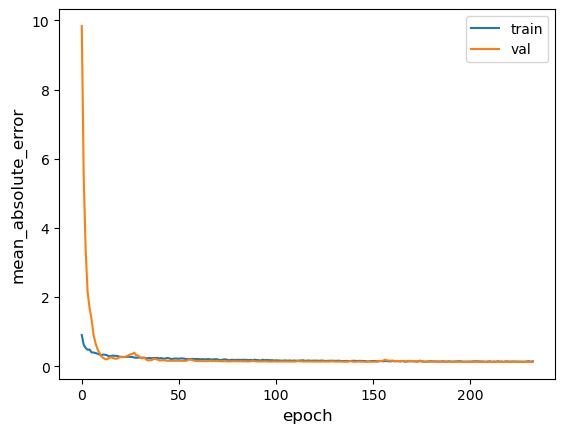

5/5 [==============================] - 0s 662us/step - loss: 0.0423 - mean_absolute_error: 0.1194
Test accuracy 0.11940504610538483
Test loss 0.04228128865361214


In [67]:
metric = 'mean_absolute_error'
plt.figure()
plt.plot(history.history[metric])
plt.plot(history.history["val_" + metric])
#plt.title("model " + metric + "\n Dense 32 + dense 16 + batch normalization + dropout 0.3")
plt.ylabel(metric, fontsize="large")
plt.xlabel("epoch", fontsize="large")
plt.legend(["train", "val"], loc="best")
plt.show()
plt.close()

#model = keras.models.load_model("best_model.h5")

test_loss, test_acc = multi_dense_model.evaluate(x_test, y_test)

print("Test accuracy", test_acc)
print("Test loss", test_loss)

In [68]:
y_test_pred = multi_dense_model.predict(x_test)

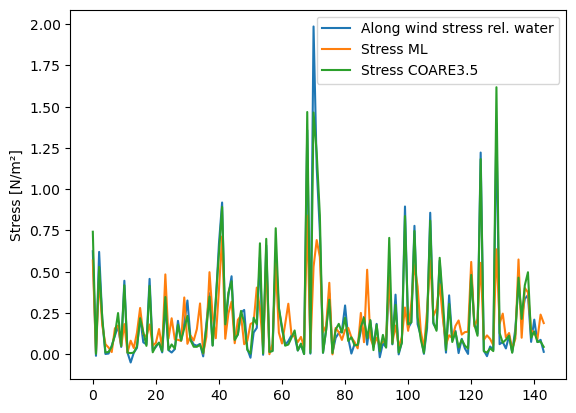

In [69]:
plt.plot(y_test.values, label='Along wind stress rel. water')
plt.plot(y_test_pred, label='Stress ML')
plt.plot(c_test.values, label='Stress COARE3.5')
plt.ylabel('Stress [N/m²]')
plt.legend()

In [70]:
rmse(y_test.values, y_test_pred)

0.35713083024581405

In [71]:
rmse(y_test.values, c_test.values)

0.06549902869322344

In [72]:
np.corrcoef(y_test.values, y_test_pred[:, 0])

array([[1.        , 0.78104006],
       [0.78104006, 1.        ]])

In [73]:
np.corrcoef(y_test.values, c_test.values)

array([[1.        , 0.97774818],
       [0.97774818, 1.        ]])

In [74]:
OUT_STEPS = 1
num_features = 1
batch_size =256
epochs=500

metric = 'mean_absolute_error'

In [75]:
try:
    del history
    del multi_dense_model
except:
    print('Variables do not exist')

In [76]:
multi_dense_model = tf.keras.Sequential([
    #tf.keras.layers.Dense(32, activation='relu'),
    #tf.keras.layers.BatchNormalization(),
    #tf.keras.layers.Dropout(rate=0.3),
    tf.keras.layers.Dense(256, activation='relu'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dropout(rate=0.1),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dropout(rate=0.1),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.BatchNormalization(),
    #tf.keras.layers.Dropout(rate=0.1),
    #tf.keras.layers.Dense(32, activation='relu'),
    #tf.keras.layers.BatchNormalization(),
    #tf.keras.layers.Dropout(rate=0.1),
    tf.keras.layers.Dense(1)    
])

callbacks = [
    keras.callbacks.ModelCheckpoint(
        "best_model.h5", save_best_only=True, monitor="val_loss"
    ),
    keras.callbacks.ReduceLROnPlateau(
        monitor="val_loss", factor=0.5, patience=20, min_lr=0.0001
    ),
    keras.callbacks.EarlyStopping(monitor="val_loss", patience=50, verbose=1),
]

multi_dense_model.compile(
    optimizer=tf.optimizers.Adam(),
    loss=tf.losses.MeanSquaredError(),
    metrics=[tf.metrics.MeanAbsoluteError()],
)


history = multi_dense_model.fit(
    x_train,
    y_train,
    batch_size=batch_size,
    epochs=epochs,
    callbacks=callbacks,
    validation_split=0.3,
    verbose=1,
)

Epoch 1/500
2/2 [==============================] - 1s 121ms/step - loss: 1.9348 - mean_absolute_error: 1.1089 - val_loss: 440.8125 - val_mean_absolute_error: 20.5029
Epoch 2/500
2/2 [==============================] - 0s 23ms/step - loss: 1.3300 - mean_absolute_error: 0.9444 - val_loss: 198.3320 - val_mean_absolute_error: 13.6876
Epoch 3/500
2/2 [==============================] - 0s 22ms/step - loss: 0.7849 - mean_absolute_error: 0.6797 - val_loss: 137.7222 - val_mean_absolute_error: 11.3267
Epoch 4/500
2/2 [==============================] - 0s 23ms/step - loss: 0.7154 - mean_absolute_error: 0.6653 - val_loss: 164.2355 - val_mean_absolute_error: 12.3697
Epoch 5/500
2/2 [==============================] - 0s 22ms/step - loss: 0.5368 - mean_absolute_error: 0.5747 - val_loss: 198.1472 - val_mean_absolute_error: 13.5382
Epoch 6/500
2/2 [==============================] - 0s 21ms/step - loss: 0.4457 - mean_absolute_error: 0.5198 - val_loss: 195.4985 - val_mean_absolute_error: 13.4235
Epoch 7/5

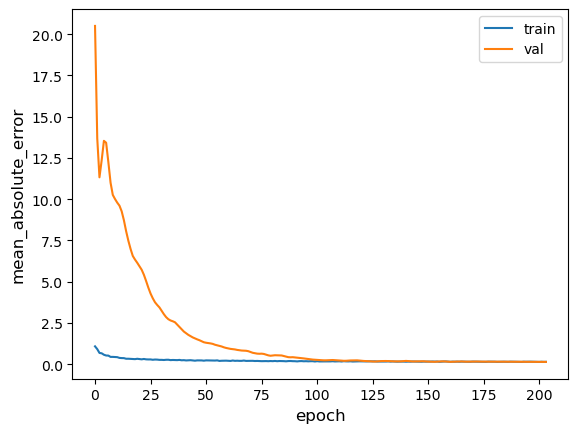

5/5 [==============================] - 0s 920us/step - loss: 0.0461 - mean_absolute_error: 0.1192
Test accuracy 0.11917188763618469
Test loss 0.046115435659885406


In [77]:
metric = 'mean_absolute_error'
plt.figure()
plt.plot(history.history[metric])
plt.plot(history.history["val_" + metric])
#plt.title("model " + metric + "\n Dense 32 + dense 16 + batch normalization + dropout 0.3")
plt.ylabel(metric, fontsize="large")
plt.xlabel("epoch", fontsize="large")
plt.legend(["train", "val"], loc="best")
plt.show()
plt.close()

#model = keras.models.load_model("best_model.h5")

test_loss, test_acc = multi_dense_model.evaluate(x_test, y_test)

print("Test accuracy", test_acc)
print("Test loss", test_loss)

In [78]:
y_test_pred = multi_dense_model.predict(x_test)

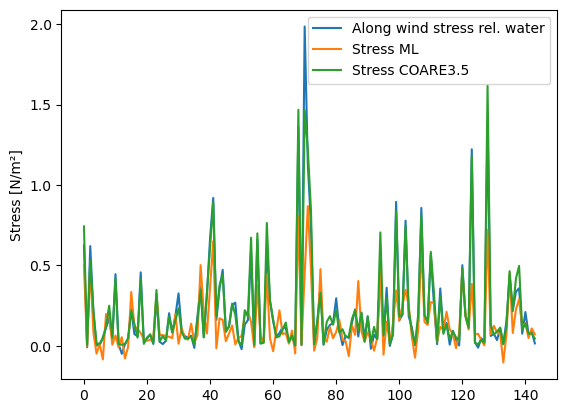

In [79]:
plt.plot(y_test.values, label='Along wind stress rel. water')
plt.plot(y_test_pred, label='Stress ML')
plt.plot(c_test.values, label='Stress COARE3.5')
plt.ylabel('Stress [N/m²]')
plt.legend()

In [80]:
rmse(y_test.values, y_test_pred)

0.3659390792660928

In [81]:
rmse(y_test.values, c_test.values)

0.06549902869322344

In [82]:
np.corrcoef(y_test.values, y_test_pred[:, 0])

array([[1.        , 0.79379307],
       [0.79379307, 1.        ]])

In [83]:
np.corrcoef(y_test.values, c_test.values)

array([[1.        , 0.97774818],
       [0.97774818, 1.        ]])

# __________________________________________________

# s0, s0_max, s0_min, s0_std, inc, az

In [104]:
predictor_variables = ['s0', 's0_max', 's0_min', 's0_std', 'inc', 'az']

In [105]:
x = df[predictor_variables]
x

s0     s0_max     s0_min    s0_std        inc          az
220 -11.348112  -9.048957 -13.505619  1.625872  33.555539  437.892670
169 -16.357272 -14.982781 -17.512438  0.948284  40.522289  439.776215
467  -8.784147  -7.503172 -10.759739  1.166080  33.548429  437.894196
151 -15.764841 -11.969157 -22.702945  2.302839  40.723102  280.224854
695 -11.010427  -7.621449 -14.643066  1.741130  40.718319  280.225769
..         ...        ...        ...       ...        ...         ...
664 -17.007820 -14.248742 -19.819621  2.193463  40.527548  440.174164
293 -16.336338 -11.070109 -23.010149  2.422662  37.364239  439.766144
235 -14.515991 -13.440401 -16.211117  0.865476  33.545377  437.893524
596  -6.664412  -5.874245  -7.551517  0.589291  25.548476  436.039337
607  -7.547244  -6.678483  -9.142586  0.925636  25.547907  436.038910

[704 rows x 6 columns]

In [106]:
y = -  df['UWr'] * df['rhoair']
y

220    0.434718
169    0.270790
467    0.492172
151    0.332047
695    0.518476
         ...   
664    0.074651
293    0.209381
235    0.073328
596    0.086927
607    0.014381
Length: 704, dtype: float64

NaNs: 

2018-12-04 11:10:59.993607         NaN

2018-12-16 23:11:59.981755         NaN

In [107]:
x_train = x[:split_idx]
x_test = x[split_idx:]

In [108]:
y_train = y[:split_idx]
y_test = y[split_idx:]

# ML setup

In [109]:
OUT_STEPS = 1
num_features = 1
batch_size =32
epochs=500

metric = 'mean_absolute_error'

In [110]:
try:
    del history
    del multi_dense_model
except:
    print('Variables do not exist')

# First experiment - Linear regression

In [111]:
multi_dense_model = tf.keras.Sequential([
    #tf.keras.layers.Dense(32, activation='relu'),
    #tf.keras.layers.BatchNormalization(),
    #tf.keras.layers.Dropout(rate=0.3),
    #tf.keras.layers.Dense(16, activation='relu'),
    #tf.keras.layers.BatchNormalization(),
    #tf.keras.layers.Dropout(rate=0.4),
    tf.keras.layers.Dense(1)    
])

callbacks = [
    keras.callbacks.ModelCheckpoint(
        "best_model.h5", save_best_only=True, monitor="val_loss"
    ),
    keras.callbacks.ReduceLROnPlateau(
        monitor="val_loss", factor=0.5, patience=20, min_lr=0.0001
    ),
    keras.callbacks.EarlyStopping(monitor="val_loss", patience=50, verbose=1),
]

multi_dense_model.compile(
    optimizer=tf.optimizers.Adam(),
    loss=tf.losses.MeanSquaredError(),
    metrics=[tf.metrics.MeanAbsoluteError()],
)


history = multi_dense_model.fit(
    x_train,
    y_train,
    batch_size=batch_size,
    epochs=epochs,
    callbacks=callbacks,
    validation_split=0.3,
    verbose=1,
)

Epoch 1/500
13/13 [==============================] - 0s 8ms/step - loss: 38722.2224 - mean_absolute_error: 191.2789 - val_loss: 33863.2070 - val_mean_absolute_error: 177.9954
Epoch 2/500
13/13 [==============================] - 0s 2ms/step - loss: 35074.4150 - mean_absolute_error: 181.6062 - val_loss: 31786.9023 - val_mean_absolute_error: 172.3075
Epoch 3/500
13/13 [==============================] - 0s 2ms/step - loss: 34397.5120 - mean_absolute_error: 180.1604 - val_loss: 29791.7793 - val_mean_absolute_error: 166.6627
Epoch 4/500
13/13 [==============================] - 0s 3ms/step - loss: 31960.4939 - mean_absolute_error: 173.4153 - val_loss: 27908.9043 - val_mean_absolute_error: 161.1557
Epoch 5/500
13/13 [==============================] - 0s 3ms/step - loss: 29390.5080 - mean_absolute_error: 165.9891 - val_loss: 26114.6992 - val_mean_absolute_error: 155.7305
Epoch 6/500
13/13 [==============================] - 0s 2ms/step - loss: 27150.0354 - mean_absolute_error: 159.4331 - val_los

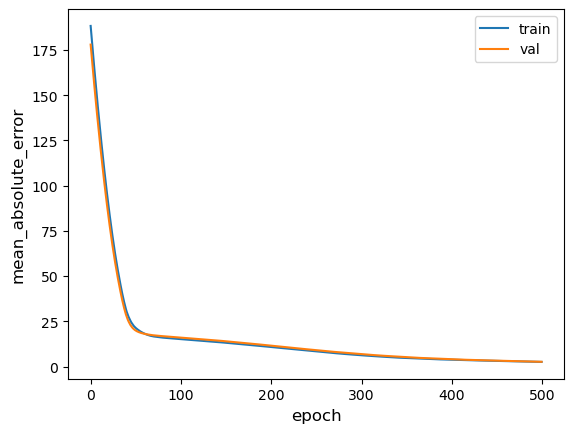

5/5 [==============================] - 0s 505us/step - loss: 11.1869 - mean_absolute_error: 2.6741
Test accuracy 2.67411208152771
Test loss 11.186882019042969


In [112]:
metric = 'mean_absolute_error'
plt.figure()
plt.plot(history.history[metric])
plt.plot(history.history["val_" + metric])
#plt.title("model " + metric + "\n Dense 32 + dense 16 + batch normalization + dropout 0.3")
plt.ylabel(metric, fontsize="large")
plt.xlabel("epoch", fontsize="large")
plt.legend(["train", "val"], loc="best")
plt.show()
plt.close()

#model = keras.models.load_model("best_model.h5")

test_loss, test_acc = multi_dense_model.evaluate(x_test, y_test)

print("Test accuracy", test_acc)
print("Test loss", test_loss)

In [113]:
y_test_pred = multi_dense_model.predict(x_test)

In [114]:
np.mean(y_test)

0.21862490743242802

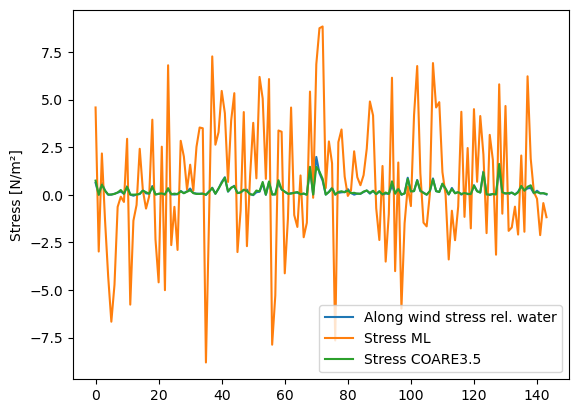

In [115]:
plt.plot(y_test.values, label='Along wind stress rel. water')
plt.plot(y_test_pred, label='Stress ML')
plt.plot(c_test.values, label='Stress COARE3.5')
plt.ylabel('Stress [N/m²]')
plt.legend()

In [116]:
rmse(y_test.values, y_test_pred)

3.5182491745724738

In [117]:
rmse(y_test.values, c_test)

0.06549902869322344

In [118]:
np.corrcoef(y_test.values, y_test_pred[:, 0])

array([[1.        , 0.55421621],
       [0.55421621, 1.        ]])

In [119]:
np.corrcoef(y_test.values, c_test.values)

array([[1.        , 0.97774818],
       [0.97774818, 1.        ]])

# Other experiments

In [120]:
OUT_STEPS = 1
num_features = 1
batch_size =16
epochs=500

metric = 'mean_absolute_error'

In [121]:
try:
    del history
    del multi_dense_model
except:
    print('Variables do not exist')

In [122]:
multi_dense_model = tf.keras.Sequential([
    #tf.keras.layers.Dense(32, activation='relu'),
    #tf.keras.layers.BatchNormalization(),
    #tf.keras.layers.Dropout(rate=0.3),
    tf.keras.layers.Dense(16, activation='relu'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dropout(rate=0.1),
    tf.keras.layers.Dense(1)    
])

callbacks = [
    keras.callbacks.ModelCheckpoint(
        "best_model.h5", save_best_only=True, monitor="val_loss"
    ),
    keras.callbacks.ReduceLROnPlateau(
        monitor="val_loss", factor=0.5, patience=20, min_lr=0.0001
    ),
    keras.callbacks.EarlyStopping(monitor="val_loss", patience=50, verbose=1),
]

multi_dense_model.compile(
    optimizer=tf.optimizers.Adam(),
    loss=tf.losses.MeanSquaredError(),
    metrics=[tf.metrics.MeanAbsoluteError()],
)


history = multi_dense_model.fit(
    x_train,
    y_train,
    batch_size=batch_size,
    epochs=epochs,
    callbacks=callbacks,
    validation_split=0.3,
    verbose=1,
)

Epoch 1/500
25/25 [==============================] - 0s 5ms/step - loss: 0.3116 - mean_absolute_error: 0.4512 - val_loss: 1.0963 - val_mean_absolute_error: 0.8935
Epoch 2/500
25/25 [==============================] - 0s 1ms/step - loss: 0.1908 - mean_absolute_error: 0.3350 - val_loss: 0.1033 - val_mean_absolute_error: 0.2361
Epoch 3/500
25/25 [==============================] - 0s 2ms/step - loss: 0.1664 - mean_absolute_error: 0.2827 - val_loss: 0.1025 - val_mean_absolute_error: 0.2477
Epoch 4/500
25/25 [==============================] - 0s 1ms/step - loss: 0.1359 - mean_absolute_error: 0.2682 - val_loss: 0.0913 - val_mean_absolute_error: 0.1836
Epoch 5/500
25/25 [==============================] - 0s 1ms/step - loss: 0.1586 - mean_absolute_error: 0.2762 - val_loss: 0.1156 - val_mean_absolute_error: 0.2127
Epoch 6/500
25/25 [==============================] - 0s 1ms/step - loss: 0.1433 - mean_absolute_error: 0.2769 - val_loss: 0.0948 - val_mean_absolute_error: 0.1819
Epoch 7/500
25/25 [===

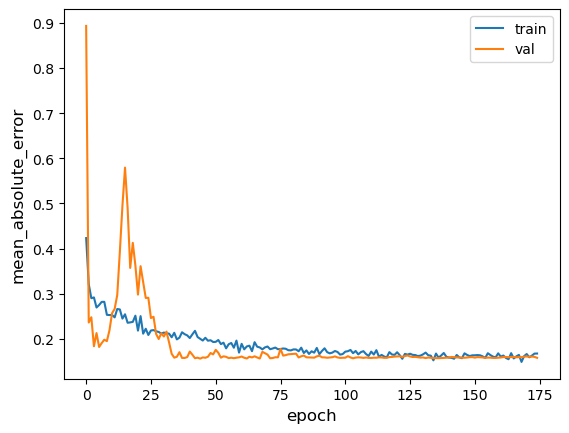

5/5 [==============================] - 0s 571us/step - loss: 0.0582 - mean_absolute_error: 0.1546
Test accuracy 0.1546223908662796
Test loss 0.05818043649196625


In [123]:
metric = 'mean_absolute_error'
plt.figure()
plt.plot(history.history[metric])
plt.plot(history.history["val_" + metric])
#plt.title("model " + metric + "\n Dense 32 + dense 16 + batch normalization + dropout 0.3")
plt.ylabel(metric, fontsize="large")
plt.xlabel("epoch", fontsize="large")
plt.legend(["train", "val"], loc="best")
plt.show()
plt.close()

#model = keras.models.load_model("best_model.h5")

test_loss, test_acc = multi_dense_model.evaluate(x_test, y_test)

print("Test accuracy", test_acc)
print("Test loss", test_loss)

In [124]:
y_test_pred = multi_dense_model.predict(x_test)

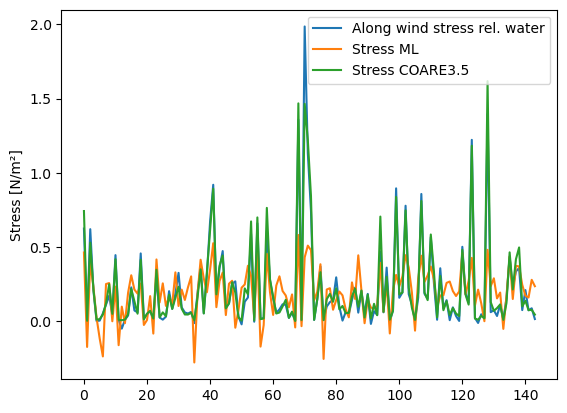

In [125]:
plt.plot(y_test.values, label='Along wind stress rel. water')
plt.plot(y_test_pred, label='Stress ML')
plt.plot(c_test.values, label='Stress COARE3.5')
plt.ylabel('Stress [N/m²]')
plt.legend()

In [126]:
rmse(y_test.values, y_test_pred)

0.3526459077275419

In [127]:
rmse(y_test.values, c_test.values)

0.06549902869322344

In [128]:
np.corrcoef(y_test.values, y_test_pred[:, 0])

array([[1.        , 0.64301966],
       [0.64301966, 1.        ]])

In [129]:
np.corrcoef(y_test.values, c_test.values)

array([[1.        , 0.97774818],
       [0.97774818, 1.        ]])

In [130]:
OUT_STEPS = 1
num_features = 1
batch_size =16
epochs=500

metric = 'mean_absolute_error'

In [131]:
try:
    del history
    del multi_dense_model
except:
    print('Variables do not exist')

In [132]:
multi_dense_model = tf.keras.Sequential([
    #tf.keras.layers.Dense(32, activation='relu'),
    #tf.keras.layers.BatchNormalization(),
    #tf.keras.layers.Dropout(rate=0.3),
    tf.keras.layers.Dense(16, activation='relu'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dropout(rate=0.1),
    tf.keras.layers.Dense(8, activation='relu'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dropout(rate=0.1),
    tf.keras.layers.Dense(1)    
])

callbacks = [
    keras.callbacks.ModelCheckpoint(
        "best_model.h5", save_best_only=True, monitor="val_loss"
    ),
    keras.callbacks.ReduceLROnPlateau(
        monitor="val_loss", factor=0.5, patience=20, min_lr=0.0001
    ),
    keras.callbacks.EarlyStopping(monitor="val_loss", patience=50, verbose=1),
]

multi_dense_model.compile(
    optimizer=tf.optimizers.Adam(),
    loss=tf.losses.MeanSquaredError(),
    metrics=[tf.metrics.MeanAbsoluteError()],
)


history = multi_dense_model.fit(
    x_train,
    y_train,
    batch_size=batch_size,
    epochs=epochs,
    callbacks=callbacks,
    validation_split=0.3,
    verbose=1,
)

Epoch 1/500
25/25 [==============================] - 1s 6ms/step - loss: 4.6831 - mean_absolute_error: 1.8037 - val_loss: 60.9360 - val_mean_absolute_error: 7.6179
Epoch 2/500
25/25 [==============================] - 0s 2ms/step - loss: 1.9405 - mean_absolute_error: 1.0340 - val_loss: 8.5316 - val_mean_absolute_error: 2.7790
Epoch 3/500
25/25 [==============================] - 0s 2ms/step - loss: 1.2494 - mean_absolute_error: 0.8237 - val_loss: 3.4194 - val_mean_absolute_error: 1.5900
Epoch 4/500
25/25 [==============================] - 0s 2ms/step - loss: 0.8705 - mean_absolute_error: 0.7036 - val_loss: 2.0333 - val_mean_absolute_error: 1.0507
Epoch 5/500
25/25 [==============================] - 0s 2ms/step - loss: 0.7270 - mean_absolute_error: 0.6182 - val_loss: 1.2817 - val_mean_absolute_error: 0.9507
Epoch 6/500
25/25 [==============================] - 0s 2ms/step - loss: 0.6089 - mean_absolute_error: 0.5756 - val_loss: 1.1127 - val_mean_absolute_error: 0.8896
Epoch 7/500
25/25 [==

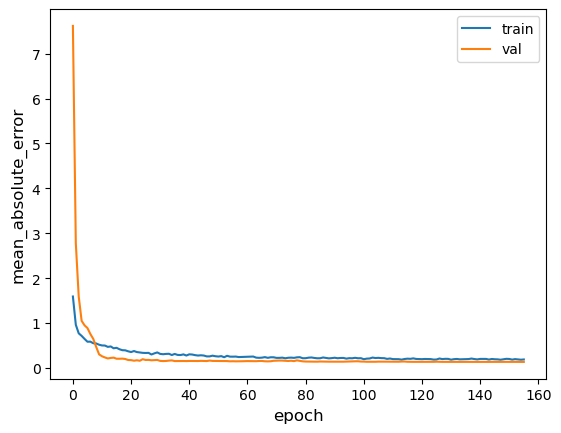

5/5 [==============================] - 0s 733us/step - loss: 0.0539 - mean_absolute_error: 0.1278
Test accuracy 0.1277768313884735
Test loss 0.053917255252599716


In [133]:
metric = 'mean_absolute_error'
plt.figure()
plt.plot(history.history[metric])
plt.plot(history.history["val_" + metric])
#plt.title("model " + metric + "\n Dense 32 + dense 16 + batch normalization + dropout 0.3")
plt.ylabel(metric, fontsize="large")
plt.xlabel("epoch", fontsize="large")
plt.legend(["train", "val"], loc="best")
plt.show()
plt.close()

#model = keras.models.load_model("best_model.h5")

test_loss, test_acc = multi_dense_model.evaluate(x_test, y_test)

print("Test accuracy", test_acc)
print("Test loss", test_loss)

In [134]:
y_test_pred = multi_dense_model.predict(x_test)

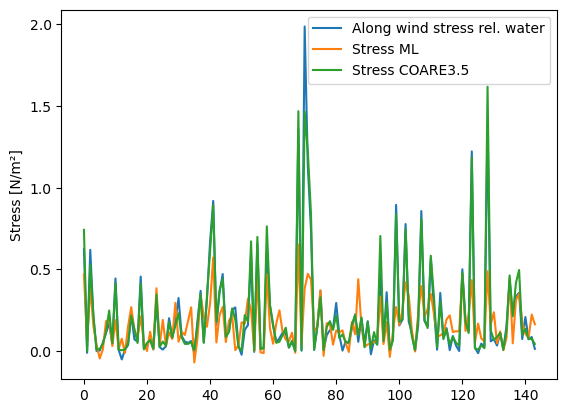

In [135]:
plt.plot(y_test.values, label='Along wind stress rel. water')
plt.plot(y_test_pred, label='Stress ML')
plt.plot(c_test.values, label='Stress COARE3.5')
plt.ylabel('Stress [N/m²]')
plt.legend()

In [136]:
rmse(y_test.values, y_test_pred)

0.3452135506875237

In [137]:
rmse(y_test.values, c_test.values)

0.06549902869322344

In [138]:
np.corrcoef(y_test.values, y_test_pred[:, 0])

array([[1.        , 0.73677108],
       [0.73677108, 1.        ]])

In [139]:
np.corrcoef(y_test.values, c_test.values)

array([[1.        , 0.97774818],
       [0.97774818, 1.        ]])

In [140]:
OUT_STEPS = 1
num_features = 1
batch_size =256
epochs=500

metric = 'mean_absolute_error'

In [141]:
try:
    del history
    del multi_dense_model
except:
    print('Variables do not exist')

In [142]:
multi_dense_model = tf.keras.Sequential([
    #tf.keras.layers.Dense(32, activation='relu'),
    #tf.keras.layers.BatchNormalization(),
    #tf.keras.layers.Dropout(rate=0.3),
    tf.keras.layers.Dense(256, activation='relu'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dropout(rate=0.1),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dropout(rate=0.1),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.BatchNormalization(),
    #tf.keras.layers.Dropout(rate=0.1),
    #tf.keras.layers.Dense(32, activation='relu'),
    #tf.keras.layers.BatchNormalization(),
    #tf.keras.layers.Dropout(rate=0.1),
    tf.keras.layers.Dense(1)    
])

callbacks = [
    keras.callbacks.ModelCheckpoint(
        "best_model.h5", save_best_only=True, monitor="val_loss"
    ),
    keras.callbacks.ReduceLROnPlateau(
        monitor="val_loss", factor=0.5, patience=20, min_lr=0.0001
    ),
    keras.callbacks.EarlyStopping(monitor="val_loss", patience=50, verbose=1),
]

multi_dense_model.compile(
    optimizer=tf.optimizers.Adam(),
    loss=tf.losses.MeanSquaredError(),
    metrics=[tf.metrics.MeanAbsoluteError()],
)


history = multi_dense_model.fit(
    x_train,
    y_train,
    batch_size=batch_size,
    epochs=epochs,
    callbacks=callbacks,
    validation_split=0.3,
    verbose=1,
)

Epoch 1/500
2/2 [==============================] - 1s 128ms/step - loss: 1.9644 - mean_absolute_error: 1.0810 - val_loss: 75.8463 - val_mean_absolute_error: 8.5580
Epoch 2/500
2/2 [==============================] - 0s 27ms/step - loss: 1.0966 - mean_absolute_error: 0.8229 - val_loss: 175.3629 - val_mean_absolute_error: 12.9697
Epoch 3/500
2/2 [==============================] - 0s 25ms/step - loss: 0.9106 - mean_absolute_error: 0.7255 - val_loss: 176.3249 - val_mean_absolute_error: 12.9505
Epoch 4/500
2/2 [==============================] - 0s 25ms/step - loss: 0.6053 - mean_absolute_error: 0.6013 - val_loss: 142.9794 - val_mean_absolute_error: 11.6088
Epoch 5/500
2/2 [==============================] - 0s 25ms/step - loss: 0.4843 - mean_absolute_error: 0.5459 - val_loss: 102.2018 - val_mean_absolute_error: 9.8037
Epoch 6/500
2/2 [==============================] - 0s 25ms/step - loss: 0.3936 - mean_absolute_error: 0.4936 - val_loss: 76.7286 - val_mean_absolute_error: 8.4641
Epoch 7/500
2/

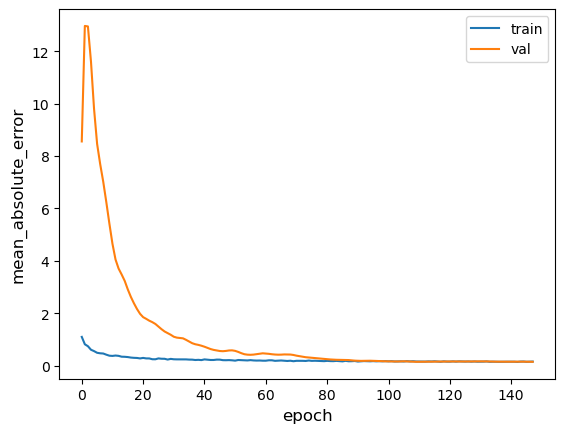

5/5 [==============================] - 0s 867us/step - loss: 0.0548 - mean_absolute_error: 0.1328
Test accuracy 0.13279186189174652
Test loss 0.05479494482278824


In [143]:
metric = 'mean_absolute_error'
plt.figure()
plt.plot(history.history[metric])
plt.plot(history.history["val_" + metric])
#plt.title("model " + metric + "\n Dense 32 + dense 16 + batch normalization + dropout 0.3")
plt.ylabel(metric, fontsize="large")
plt.xlabel("epoch", fontsize="large")
plt.legend(["train", "val"], loc="best")
plt.show()
plt.close()

#model = keras.models.load_model("best_model.h5")

test_loss, test_acc = multi_dense_model.evaluate(x_test, y_test)

print("Test accuracy", test_acc)
print("Test loss", test_loss)

In [144]:
y_test_pred = multi_dense_model.predict(x_test)

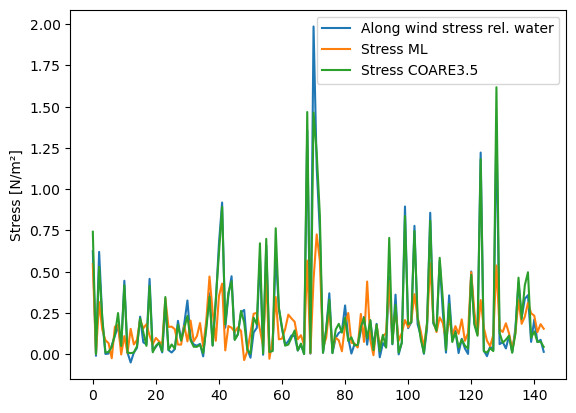

In [145]:
plt.plot(y_test.values, label='Along wind stress rel. water')
plt.plot(y_test_pred, label='Stress ML')
plt.plot(c_test.values, label='Stress COARE3.5')
plt.ylabel('Stress [N/m²]')
plt.legend()

In [146]:
rmse(y_test.values, y_test_pred)

0.3424382696973598

In [147]:
rmse(y_test.values, c_test.values)

0.06549902869322344

In [148]:
np.corrcoef(y_test.values, y_test_pred[:, 0])

array([[1.        , 0.73185964],
       [0.73185964, 1.        ]])

In [149]:
np.corrcoef(y_test.values, c_test.values)

array([[1.        , 0.97774818],
       [0.97774818, 1.        ]])